In [1]:
from PIL import Image

In [2]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential, load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import joblib
import cv2


In [3]:
mel_df= pd.read_csv('crop_mel_specs_df_6.csv')
gd_df = pd.read_csv('modigd_specs_df_6.csv')

In [4]:
len(mel_df), len(gd_df)

(13718, 13718)

In [5]:
mel_df['path'][10000], gd_df['path'][10000]

('data_cropped/72-97-01-86-70-85-77.png',
 'modi_gd_specs_train/72-97-01-86-70-85-77.png')

In [3]:
import cv2

In [4]:
img1 = cv2.imread('data_cropped/03-01-04-01-01-01-01.png')

img2 = cv2.imread('modi_gd_specs_train/03-01-04-01-01-01-01.png')


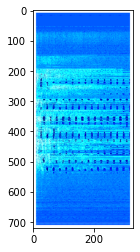

In [5]:
plt.imshow(img2)

In [6]:
img_2 = cv2.resize(img2, (600,400), interpolation = cv2.INTER_NEAREST)

In [7]:
im_v = cv2.vconcat([img1, img_2])
cv2.imshow('image', im_v)

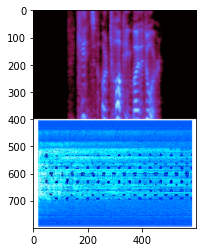

In [8]:
plt.figure()
plt.imshow(im_v)

In [9]:
im_v_r = cv2.resize(im_v, (224, 224), interpolation = cv2.INTER_NEAREST)

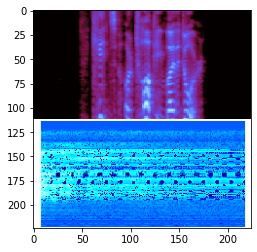

In [10]:
plt.figure()
plt.imshow(im_v_r)

In [11]:
im_v_r.shape

(224, 224, 3)

In [15]:
data = []
label =[]

for lab, img in enumerate(mel_df.path):
  try:
    image = load_img(img, target_size=(224, 224))
    # convert the image pixels to a numpy array 
    image = img_to_array(image) 
    # reshape data for the model
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    data.append(image)
    label.append(int(mel_df.label[lab])-1)
    print(lab, img)
  except:
    print("Error loading image", lab)
  

#Converting lists into numpy arrays
data = np.array(data)
label = np.array(label)

print(data.shape, label.shape)

0 data_cropped/03-01-01-01-01-01-01.png
1 data_cropped/03-01-01-01-01-01-02.png
2 data_cropped/03-01-01-01-01-01-03.png
3 data_cropped/03-01-01-01-01-01-04.png
4 data_cropped/03-01-01-01-01-01-05.png
5 data_cropped/03-01-01-01-01-01-06.png
6 data_cropped/03-01-01-01-01-01-07.png
7 data_cropped/03-01-01-01-01-01-08.png
8 data_cropped/03-01-01-01-01-01-09.png
9 data_cropped/03-01-01-01-01-01-10.png
10 data_cropped/03-01-01-01-01-01-11.png
11 data_cropped/03-01-01-01-01-01-12.png
12 data_cropped/03-01-01-01-01-01-13.png
13 data_cropped/03-01-01-01-01-01-14.png
14 data_cropped/03-01-01-01-01-01-15.png
15 data_cropped/03-01-01-01-01-01-16.png
16 data_cropped/03-01-01-01-01-01-17.png
17 data_cropped/03-01-01-01-01-01-18.png
18 data_cropped/03-01-01-01-01-01-19.png
19 data_cropped/03-01-01-01-01-01-20.png
20 data_cropped/03-01-01-01-01-01-21.png
21 data_cropped/03-01-01-01-01-01-22.png
22 data_cropped/03-01-01-01-01-01-23.png
23 data_cropped/03-01-01-01-01-01-24.png
24 data_cropped/03-01-01-0

198 data_cropped/03-01-02-02-01-01-07.png
199 data_cropped/03-01-02-02-01-01-08.png
200 data_cropped/03-01-02-02-01-01-09.png
201 data_cropped/03-01-02-02-01-01-10.png
202 data_cropped/03-01-02-02-01-01-11.png
203 data_cropped/03-01-02-02-01-01-12.png
204 data_cropped/03-01-02-02-01-01-13.png
205 data_cropped/03-01-02-02-01-01-14.png
206 data_cropped/03-01-02-02-01-01-15.png
207 data_cropped/03-01-02-02-01-01-16.png
208 data_cropped/03-01-02-02-01-01-17.png
209 data_cropped/03-01-02-02-01-01-18.png
210 data_cropped/03-01-02-02-01-01-19.png
211 data_cropped/03-01-02-02-01-01-20.png
212 data_cropped/03-01-02-02-01-01-21.png
213 data_cropped/03-01-02-02-01-01-22.png
214 data_cropped/03-01-02-02-01-01-23.png
215 data_cropped/03-01-02-02-01-01-24.png
216 data_cropped/03-01-02-02-01-02-01.png
217 data_cropped/03-01-02-02-01-02-02.png
218 data_cropped/03-01-02-02-01-02-03.png
219 data_cropped/03-01-02-02-01-02-04.png
220 data_cropped/03-01-02-02-01-02-05.png
221 data_cropped/03-01-02-02-01-02

409 data_cropped/03-01-03-02-01-02-02.png
410 data_cropped/03-01-03-02-01-02-03.png
411 data_cropped/03-01-03-02-01-02-04.png
412 data_cropped/03-01-03-02-01-02-05.png
413 data_cropped/03-01-03-02-01-02-06.png
414 data_cropped/03-01-03-02-01-02-07.png
415 data_cropped/03-01-03-02-01-02-08.png
416 data_cropped/03-01-03-02-01-02-09.png
417 data_cropped/03-01-03-02-01-02-10.png
418 data_cropped/03-01-03-02-01-02-11.png
419 data_cropped/03-01-03-02-01-02-12.png
420 data_cropped/03-01-03-02-01-02-13.png
421 data_cropped/03-01-03-02-01-02-14.png
422 data_cropped/03-01-03-02-01-02-15.png
423 data_cropped/03-01-03-02-01-02-16.png
424 data_cropped/03-01-03-02-01-02-17.png
425 data_cropped/03-01-03-02-01-02-18.png
426 data_cropped/03-01-03-02-01-02-19.png
427 data_cropped/03-01-03-02-01-02-20.png
428 data_cropped/03-01-03-02-01-02-21.png
429 data_cropped/03-01-03-02-01-02-22.png
430 data_cropped/03-01-03-02-01-02-23.png
431 data_cropped/03-01-03-02-01-02-24.png
432 data_cropped/03-01-03-02-02-01

609 data_cropped/03-01-04-02-01-02-10.png
610 data_cropped/03-01-04-02-01-02-11.png
611 data_cropped/03-01-04-02-01-02-12.png
612 data_cropped/03-01-04-02-01-02-13.png
613 data_cropped/03-01-04-02-01-02-14.png
614 data_cropped/03-01-04-02-01-02-15.png
615 data_cropped/03-01-04-02-01-02-16.png
616 data_cropped/03-01-04-02-01-02-17.png
617 data_cropped/03-01-04-02-01-02-18.png
618 data_cropped/03-01-04-02-01-02-19.png
619 data_cropped/03-01-04-02-01-02-20.png
620 data_cropped/03-01-04-02-01-02-21.png
621 data_cropped/03-01-04-02-01-02-22.png
622 data_cropped/03-01-04-02-01-02-23.png
623 data_cropped/03-01-04-02-01-02-24.png
624 data_cropped/03-01-04-02-02-01-01.png
625 data_cropped/03-01-04-02-02-01-02.png
626 data_cropped/03-01-04-02-02-01-03.png
627 data_cropped/03-01-04-02-02-01-04.png
628 data_cropped/03-01-04-02-02-01-05.png
629 data_cropped/03-01-04-02-02-01-06.png
630 data_cropped/03-01-04-02-02-01-07.png
631 data_cropped/03-01-04-02-02-01-08.png
632 data_cropped/03-01-04-02-02-01

810 data_cropped/03-01-05-02-01-02-19.png
811 data_cropped/03-01-05-02-01-02-20.png
812 data_cropped/03-01-05-02-01-02-21.png
813 data_cropped/03-01-05-02-01-02-22.png
814 data_cropped/03-01-05-02-01-02-23.png
815 data_cropped/03-01-05-02-01-02-24.png
816 data_cropped/03-01-05-02-02-01-01.png
817 data_cropped/03-01-05-02-02-01-02.png
818 data_cropped/03-01-05-02-02-01-03.png
819 data_cropped/03-01-05-02-02-01-04.png
820 data_cropped/03-01-05-02-02-01-05.png
821 data_cropped/03-01-05-02-02-01-06.png
822 data_cropped/03-01-05-02-02-01-07.png
823 data_cropped/03-01-05-02-02-01-08.png
824 data_cropped/03-01-05-02-02-01-09.png
825 data_cropped/03-01-05-02-02-01-10.png
826 data_cropped/03-01-05-02-02-01-11.png
827 data_cropped/03-01-05-02-02-01-12.png
828 data_cropped/03-01-05-02-02-01-13.png
829 data_cropped/03-01-05-02-02-01-14.png
830 data_cropped/03-01-05-02-02-01-15.png
831 data_cropped/03-01-05-02-02-01-16.png
832 data_cropped/03-01-05-02-02-01-17.png
833 data_cropped/03-01-05-02-02-01

1007 data_cropped/03-01-06-02-01-02-24.png
1008 data_cropped/03-01-06-02-02-01-01.png
1009 data_cropped/03-01-06-02-02-01-02.png
1010 data_cropped/03-01-06-02-02-01-03.png
1011 data_cropped/03-01-06-02-02-01-04.png
1012 data_cropped/03-01-06-02-02-01-05.png
1013 data_cropped/03-01-06-02-02-01-06.png
1014 data_cropped/03-01-06-02-02-01-07.png
1015 data_cropped/03-01-06-02-02-01-08.png
1016 data_cropped/03-01-06-02-02-01-09.png
1017 data_cropped/03-01-06-02-02-01-10.png
1018 data_cropped/03-01-06-02-02-01-11.png
1019 data_cropped/03-01-06-02-02-01-12.png
1020 data_cropped/03-01-06-02-02-01-13.png
1021 data_cropped/03-01-06-02-02-01-14.png
1022 data_cropped/03-01-06-02-02-01-15.png
1023 data_cropped/03-01-06-02-02-01-16.png
1024 data_cropped/03-01-06-02-02-01-17.png
1025 data_cropped/03-01-06-02-02-01-18.png
1026 data_cropped/03-01-06-02-02-01-19.png
1027 data_cropped/03-01-06-02-02-01-20.png
1028 data_cropped/03-01-06-02-02-01-21.png
1029 data_cropped/03-01-06-02-02-01-22.png
1030 data_c

1203 data_cropped/11-14-06-17-29-56-35.png
1204 data_cropped/11-14-06-25-69-18-85.png
1205 data_cropped/11-15-01-93-82-32-45.png
1206 data_cropped/11-15-03-21-72-77-22.png
1207 data_cropped/11-15-03-28-69-30-87.png
1208 data_cropped/11-16-01-78-66-25-86.png
1209 data_cropped/11-16-06-65-42-26-33.png
1210 data_cropped/11-17-01-46-85-10-32.png
1211 data_cropped/11-18-03-44-70-43-33.png
1212 data_cropped/11-18-04-47-69-96-83.png
1213 data_cropped/11-18-05-89-78-72-26.png
1214 data_cropped/11-19-03-13-64-98-80.png
1215 data_cropped/11-19-06-36-66-64-83.png
1216 data_cropped/11-21-03-53-59-95-13.png
1217 data_cropped/11-21-04-55-12-93-82.png
1218 data_cropped/11-21-06-82-57-81-12.png
1219 data_cropped/11-22-01-75-82-76-17.png
1220 data_cropped/11-22-05-92-78-80-27.png
1221 data_cropped/11-22-06-73-97-91-14.png
1222 data_cropped/11-23-04-79-85-91-35.png
1223 data_cropped/11-24-03-50-33-89-19.png
1224 data_cropped/11-24-05-78-56-29-23.png
1225 data_cropped/11-25-02-53-14-77-18.png
1226 data_c

1409 data_cropped/12-67-05-96-20-84-72.png
1410 data_cropped/12-68-03-98-54-85-90.png
1411 data_cropped/12-69-06-53-45-48-94.png
1412 data_cropped/12-70-01-25-79-14-38.png
1413 data_cropped/12-70-04-38-69-29-93.png
1414 data_cropped/12-71-01-13-68-35-28.png
1415 data_cropped/12-71-02-51-43-70-54.png
1416 data_cropped/12-71-03-80-83-38-11.png
1417 data_cropped/12-71-04-43-66-19-93.png
1418 data_cropped/12-71-05-39-73-74-32.png
1419 data_cropped/12-72-02-35-53-44-96.png
1420 data_cropped/12-72-02-90-92-35-24.png
1421 data_cropped/12-76-01-43-57-51-61.png
1422 data_cropped/12-76-03-33-39-55-45.png
1423 data_cropped/12-76-05-29-51-31-36.png
1424 data_cropped/12-77-01-33-80-21-66.png
1425 data_cropped/12-79-06-63-67-13-74.png
1426 data_cropped/12-80-04-36-52-87-86.png
1427 data_cropped/12-82-04-45-98-95-79.png
1428 data_cropped/12-84-04-97-14-88-81.png
1429 data_cropped/12-84-05-41-60-69-88.png
1430 data_cropped/12-85-04-26-20-92-94.png
1431 data_cropped/12-85-05-44-80-55-25.png
1432 data_c

1605 data_cropped/13-94-01-67-86-31-64.png
1606 data_cropped/13-96-03-41-87-85-52.png
1607 data_cropped/13-96-06-36-82-31-71.png
1608 data_cropped/13-97-03-72-76-62-69.png
1609 data_cropped/13-98-01-51-63-39-32.png
1610 data_cropped/13-98-06-82-25-43-41.png
1611 data_cropped/14-10-01-94-35-97-39.png
1612 data_cropped/14-10-04-90-83-16-95.png
1613 data_cropped/14-11-03-54-29-87-45.png
1614 data_cropped/14-11-04-35-53-80-46.png
1615 data_cropped/14-13-05-43-30-21-19.png
1616 data_cropped/14-13-05-73-49-39-19.png
1617 data_cropped/14-15-04-79-67-40-11.png
1618 data_cropped/14-15-05-86-55-19-71.png
1619 data_cropped/14-16-01-58-69-90-11.png
1620 data_cropped/14-16-04-32-22-30-53.png
1621 data_cropped/14-18-03-23-44-90-17.png
1622 data_cropped/14-18-04-38-43-65-11.png
1623 data_cropped/14-18-06-19-36-78-73.png
1624 data_cropped/14-19-01-38-21-64-75.png
1625 data_cropped/14-19-01-69-47-29-30.png
1626 data_cropped/14-19-02-81-41-56-73.png
1627 data_cropped/14-19-05-77-27-82-28.png
1628 data_c

1800 data_cropped/15-50-01-37-31-80-60.png
1801 data_cropped/15-50-03-77-40-25-65.png
1802 data_cropped/15-51-01-63-17-72-44.png
1803 data_cropped/15-51-02-85-73-53-26.png
1804 data_cropped/15-51-03-29-42-34-30.png
1805 data_cropped/15-51-04-17-31-48-27.png
1806 data_cropped/15-53-06-69-82-97-93.png
1807 data_cropped/15-54-02-61-43-81-45.png
1808 data_cropped/15-54-04-84-18-48-62.png
1809 data_cropped/15-55-03-31-14-17-18.png
1810 data_cropped/15-55-03-61-73-46-37.png
1811 data_cropped/15-55-04-69-21-34-91.png
1812 data_cropped/15-56-03-28-34-47-60.png
1813 data_cropped/15-56-03-38-10-64-72.png
1814 data_cropped/15-56-03-79-48-81-71.png
1815 data_cropped/15-56-05-19-30-18-68.png
1816 data_cropped/15-56-05-36-96-74-21.png
1817 data_cropped/15-57-03-31-93-92-77.png
1818 data_cropped/15-57-06-48-28-18-43.png
1819 data_cropped/15-58-01-33-94-46-79.png
1820 data_cropped/15-58-03-78-34-18-47.png
1821 data_cropped/15-58-05-54-76-50-61.png
1822 data_cropped/15-59-06-34-22-90-58.png
1823 data_c

1992 data_cropped/16-69-01-56-93-18-25.png
1993 data_cropped/16-69-01-97-62-31-54.png
1994 data_cropped/16-69-03-20-57-91-11.png
1995 data_cropped/16-69-04-10-78-81-14.png
1996 data_cropped/16-69-04-53-21-14-83.png
1997 data_cropped/16-69-04-60-31-30-46.png
1998 data_cropped/16-69-04-61-92-75-91.png
1999 data_cropped/16-69-06-15-61-88-22.png
2000 data_cropped/16-70-05-62-39-67-28.png
2001 data_cropped/16-70-05-72-43-71-92.png
2002 data_cropped/16-72-04-25-70-88-81.png
2003 data_cropped/16-72-06-77-95-96-98.png
2004 data_cropped/16-76-02-31-60-54-68.png
2005 data_cropped/16-76-03-75-97-80-73.png
2006 data_cropped/16-76-03-97-22-91-59.png
2007 data_cropped/16-76-06-22-46-56-57.png
2008 data_cropped/16-77-02-11-87-10-88.png
2009 data_cropped/16-77-04-81-56-64-29.png
2010 data_cropped/16-78-02-51-70-48-63.png
2011 data_cropped/16-79-02-11-46-54-47.png
2012 data_cropped/16-79-04-65-32-30-91.png
2013 data_cropped/16-79-04-68-12-55-30.png
2014 data_cropped/16-80-01-73-18-51-10.png
2015 data_c

2184 data_cropped/18-15-03-47-74-45-33.png
2185 data_cropped/18-16-01-47-25-94-55.png
2186 data_cropped/18-16-06-36-89-26-88.png
2187 data_cropped/18-17-02-96-58-28-83.png
2188 data_cropped/18-19-05-85-91-86-49.png
2189 data_cropped/18-20-02-57-11-86-30.png
2190 data_cropped/18-20-04-87-64-42-13.png
2191 data_cropped/18-21-05-82-93-63-69.png
2192 data_cropped/18-21-06-72-79-31-88.png
2193 data_cropped/18-22-01-76-67-54-70.png
2194 data_cropped/18-23-03-92-79-96-65.png
2195 data_cropped/18-23-04-61-67-63-24.png
2196 data_cropped/18-23-06-13-52-77-30.png
2197 data_cropped/18-24-01-66-73-46-20.png
2198 data_cropped/18-26-04-41-62-92-95.png
2199 data_cropped/18-27-06-75-15-51-66.png
2200 data_cropped/18-28-04-20-61-49-14.png
2201 data_cropped/18-30-05-84-31-78-58.png
2202 data_cropped/18-31-06-10-57-13-26.png
2203 data_cropped/18-32-01-50-19-53-10.png
2204 data_cropped/18-34-05-15-73-44-68.png
2205 data_cropped/18-35-02-27-86-67-74.png
2206 data_cropped/18-35-02-40-51-74-26.png
2207 data_c

2383 data_cropped/19-61-06-96-88-98-58.png
2384 data_cropped/19-62-04-50-65-46-29.png
2385 data_cropped/19-63-04-47-27-29-61.png
2386 data_cropped/19-64-01-82-33-38-40.png
2387 data_cropped/19-64-05-14-47-46-35.png
2388 data_cropped/19-64-05-31-85-67-17.png
2389 data_cropped/19-64-05-82-79-63-53.png
2390 data_cropped/19-64-06-88-37-62-93.png
2391 data_cropped/19-66-05-29-36-15-38.png
2392 data_cropped/19-66-06-48-31-76-18.png
2393 data_cropped/19-67-03-98-95-71-37.png
2394 data_cropped/19-68-03-67-63-43-90.png
2395 data_cropped/19-68-06-36-70-84-71.png
2396 data_cropped/19-69-03-85-57-56-11.png
2397 data_cropped/19-69-04-70-27-51-44.png
2398 data_cropped/19-71-03-40-36-14-49.png
2399 data_cropped/19-71-05-33-79-31-87.png
2400 data_cropped/19-73-04-60-56-72-70.png
2401 data_cropped/19-73-06-50-22-26-74.png
2402 data_cropped/19-73-06-80-31-60-96.png
2403 data_cropped/19-74-02-17-77-76-34.png
2404 data_cropped/19-74-02-54-84-89-91.png
2405 data_cropped/19-74-06-85-32-28-82.png
2406 data_c

2580 data_cropped/21-13-04-36-74-35-41.png
2581 data_cropped/21-15-06-98-90-63-65.png
2582 data_cropped/21-17-05-88-11-20-56.png
2583 data_cropped/21-17-06-92-95-72-11.png
2584 data_cropped/21-18-01-55-75-72-59.png
2585 data_cropped/21-18-02-24-94-29-36.png
2586 data_cropped/21-18-05-89-75-14-72.png
2587 data_cropped/21-19-01-65-27-81-84.png
2588 data_cropped/21-19-02-69-80-98-12.png
2589 data_cropped/21-19-06-85-38-32-15.png
2590 data_cropped/21-20-01-65-19-53-68.png
2591 data_cropped/21-20-02-42-57-31-48.png
2592 data_cropped/21-20-03-47-94-58-46.png
2593 data_cropped/21-20-03-98-37-56-84.png
2594 data_cropped/21-23-06-31-57-61-36.png
2595 data_cropped/21-24-05-17-67-73-95.png
2596 data_cropped/21-26-01-51-40-92-71.png
2597 data_cropped/21-26-04-14-92-65-35.png
2598 data_cropped/21-27-05-86-31-56-36.png
2599 data_cropped/21-27-06-35-57-40-37.png
2600 data_cropped/21-28-01-53-25-68-75.png
2601 data_cropped/21-28-03-15-47-41-59.png
2602 data_cropped/21-29-02-50-30-62-49.png
2603 data_c

2777 data_cropped/22-38-01-42-62-43-19.png
2778 data_cropped/22-38-06-60-96-44-35.png
2779 data_cropped/22-39-02-31-63-81-23.png
2780 data_cropped/22-39-04-76-73-26-16.png
2781 data_cropped/22-39-06-89-84-44-97.png
2782 data_cropped/22-40-03-16-36-78-37.png
2783 data_cropped/22-40-03-56-60-11-33.png
2784 data_cropped/22-40-03-97-39-15-26.png
2785 data_cropped/22-40-04-45-95-80-62.png
2786 data_cropped/22-42-01-79-95-76-87.png
2787 data_cropped/22-42-06-63-34-74-10.png
2788 data_cropped/22-43-03-68-30-78-76.png
2789 data_cropped/22-44-03-21-41-79-83.png
2790 data_cropped/22-44-04-65-43-12-11.png
2791 data_cropped/22-45-04-60-56-52-39.png
2792 data_cropped/22-46-02-52-96-34-29.png
2793 data_cropped/22-47-01-17-54-86-97.png
2794 data_cropped/22-47-02-38-10-17-28.png
2795 data_cropped/22-47-03-91-27-52-68.png
2796 data_cropped/22-47-05-29-64-97-52.png
2797 data_cropped/22-47-05-31-13-85-78.png
2798 data_cropped/22-48-02-40-60-38-33.png
2799 data_cropped/22-48-04-62-42-25-36.png
2800 data_c

2972 data_cropped/23-81-02-93-98-32-91.png
2973 data_cropped/23-82-01-70-61-15-22.png
2974 data_cropped/23-82-03-11-36-86-59.png
2975 data_cropped/23-83-04-81-89-91-55.png
2976 data_cropped/23-84-05-51-85-62-32.png
2977 data_cropped/23-85-01-71-53-34-57.png
2978 data_cropped/23-85-03-19-74-17-88.png
2979 data_cropped/23-87-06-47-58-39-56.png
2980 data_cropped/23-88-03-55-75-12-65.png
2981 data_cropped/23-89-02-92-47-69-25.png
2982 data_cropped/23-89-06-72-13-70-48.png
2983 data_cropped/23-90-02-37-92-39-72.png
2984 data_cropped/23-90-03-61-12-31-76.png
2985 data_cropped/23-90-06-61-81-35-71.png
2986 data_cropped/23-91-05-46-74-68-41.png
2987 data_cropped/23-93-01-29-18-27-39.png
2988 data_cropped/23-93-03-29-24-22-31.png
2989 data_cropped/23-94-02-55-53-66-49.png
2990 data_cropped/23-94-03-82-79-12-86.png
2991 data_cropped/23-94-06-32-28-13-50.png
2992 data_cropped/23-95-03-44-34-59-53.png
2993 data_cropped/23-95-06-42-30-63-75.png
2994 data_cropped/23-96-03-33-47-89-71.png
2995 data_c

3178 data_cropped/25-38-04-73-23-14-89.png
3179 data_cropped/25-38-05-66-45-15-64.png
3180 data_cropped/25-39-05-28-33-35-77.png
3181 data_cropped/25-39-05-48-41-73-19.png
3182 data_cropped/25-40-01-37-23-21-89.png
3183 data_cropped/25-40-04-22-61-71-27.png
3184 data_cropped/25-40-06-49-39-74-60.png
3185 data_cropped/25-40-06-64-16-50-38.png
3186 data_cropped/25-42-05-35-53-31-81.png
3187 data_cropped/25-43-05-49-77-51-31.png
3188 data_cropped/25-44-04-77-73-66-87.png
3189 data_cropped/25-44-06-43-86-24-85.png
3190 data_cropped/25-45-01-62-67-29-63.png
3191 data_cropped/25-45-06-80-96-62-34.png
3192 data_cropped/25-46-02-67-21-98-70.png
3193 data_cropped/25-47-04-40-41-66-37.png
3194 data_cropped/25-49-02-57-62-82-15.png
3195 data_cropped/25-49-03-80-38-22-45.png
3196 data_cropped/25-49-04-45-56-59-13.png
3197 data_cropped/25-50-04-43-82-48-22.png
3198 data_cropped/25-50-05-59-86-47-46.png
3199 data_cropped/25-50-05-92-41-55-66.png
3200 data_cropped/25-51-05-80-78-91-74.png
3201 data_c

3377 data_cropped/26-61-03-67-11-58-91.png
3378 data_cropped/26-62-02-41-35-45-92.png
3379 data_cropped/26-62-06-95-19-21-25.png
3380 data_cropped/26-64-02-43-61-68-34.png
3381 data_cropped/26-64-02-90-55-74-51.png
3382 data_cropped/26-64-05-19-73-15-91.png
3383 data_cropped/26-64-05-38-69-60-73.png
3384 data_cropped/26-65-03-47-50-95-83.png
3385 data_cropped/26-65-05-48-42-20-27.png
3386 data_cropped/26-66-03-15-17-33-67.png
3387 data_cropped/26-67-02-91-59-71-43.png
3388 data_cropped/26-67-04-28-43-14-15.png
3389 data_cropped/26-67-06-35-83-59-29.png
3390 data_cropped/26-69-02-40-15-98-38.png
3391 data_cropped/26-69-04-76-48-60-85.png
3392 data_cropped/26-70-03-59-22-74-68.png
3393 data_cropped/26-71-02-19-74-25-46.png
3394 data_cropped/26-72-06-28-85-71-73.png
3395 data_cropped/26-73-04-89-21-12-31.png
3396 data_cropped/26-74-02-86-90-18-33.png
3397 data_cropped/26-76-05-11-28-88-56.png
3398 data_cropped/26-77-06-66-30-85-35.png
3399 data_cropped/26-79-04-98-71-18-62.png
3400 data_c

3573 data_cropped/27-87-05-86-15-96-72.png
3574 data_cropped/27-88-03-20-65-78-48.png
3575 data_cropped/27-88-05-46-63-89-56.png
3576 data_cropped/27-88-05-93-62-66-97.png
3577 data_cropped/27-88-06-14-85-22-72.png
3578 data_cropped/27-90-01-35-60-73-94.png
3579 data_cropped/27-91-05-41-51-17-83.png
3580 data_cropped/27-92-01-78-70-65-28.png
3581 data_cropped/27-93-04-51-20-42-94.png
3582 data_cropped/27-94-03-67-69-49-15.png
3583 data_cropped/27-94-04-23-64-79-13.png
3584 data_cropped/27-94-04-56-91-88-82.png
3585 data_cropped/27-94-04-75-19-16-76.png
3586 data_cropped/27-95-02-46-77-80-44.png
3587 data_cropped/27-96-05-28-87-63-79.png
3588 data_cropped/27-97-02-35-13-72-70.png
3589 data_cropped/27-97-03-72-14-71-62.png
3590 data_cropped/27-98-01-58-17-73-97.png
3591 data_cropped/28-10-04-98-92-26-18.png
3592 data_cropped/28-10-05-27-81-36-22.png
3593 data_cropped/28-10-06-56-68-14-34.png
3594 data_cropped/28-11-01-35-59-24-25.png
3595 data_cropped/28-11-04-58-84-41-80.png
3596 data_c

3776 data_cropped/29-21-04-47-71-60-79.png
3777 data_cropped/29-21-05-76-44-31-80.png
3778 data_cropped/29-21-05-94-49-89-93.png
3779 data_cropped/29-22-01-90-39-49-32.png
3780 data_cropped/29-22-02-85-46-80-87.png
3781 data_cropped/29-22-05-67-28-32-45.png
3782 data_cropped/29-22-06-11-80-75-62.png
3783 data_cropped/29-23-03-51-91-53-10.png
3784 data_cropped/29-23-05-66-13-93-42.png
3785 data_cropped/29-25-04-65-37-43-71.png
3786 data_cropped/29-26-03-98-84-35-69.png
3787 data_cropped/29-26-05-40-49-76-19.png
3788 data_cropped/29-26-05-57-50-33-82.png
3789 data_cropped/29-27-01-18-37-78-34.png
3790 data_cropped/29-27-02-46-49-71-95.png
3791 data_cropped/29-30-01-39-77-55-18.png
3792 data_cropped/29-30-05-45-50-69-91.png
3793 data_cropped/29-31-01-11-49-61-28.png
3794 data_cropped/29-31-04-90-86-77-69.png
3795 data_cropped/29-32-04-62-31-80-28.png
3796 data_cropped/29-33-01-90-49-23-58.png
3797 data_cropped/29-33-06-67-47-14-89.png
3798 data_cropped/29-34-03-61-70-96-27.png
3799 data_c

3967 data_cropped/30-55-03-84-50-49-67.png
3968 data_cropped/30-55-04-92-71-40-56.png
3969 data_cropped/30-56-06-25-27-43-24.png
3970 data_cropped/30-57-06-18-11-40-98.png
3971 data_cropped/30-59-03-62-46-72-34.png
3972 data_cropped/30-60-04-47-61-96-69.png
3973 data_cropped/30-60-05-77-54-36-74.png
3974 data_cropped/30-61-05-15-60-39-53.png
3975 data_cropped/30-62-05-90-91-65-24.png
3976 data_cropped/30-63-03-10-13-83-25.png
3977 data_cropped/30-64-02-74-15-70-86.png
3978 data_cropped/30-65-01-71-48-75-33.png
3979 data_cropped/30-66-01-80-61-68-95.png
3980 data_cropped/30-66-03-19-32-24-88.png
3981 data_cropped/30-66-03-92-56-60-36.png
3982 data_cropped/30-66-05-70-63-72-54.png
3983 data_cropped/30-66-06-93-59-45-15.png
3984 data_cropped/30-67-01-38-31-86-63.png
3985 data_cropped/30-68-04-90-95-25-15.png
3986 data_cropped/30-70-03-14-18-65-19.png
3987 data_cropped/30-70-03-44-35-25-28.png
3988 data_cropped/30-70-04-31-19-26-38.png
3989 data_cropped/30-71-05-19-55-87-20.png
3990 data_c

4167 data_cropped/31-96-01-42-73-75-32.png
4168 data_cropped/31-96-02-82-53-81-19.png
4169 data_cropped/31-96-04-76-81-91-89.png
4170 data_cropped/31-98-02-72-15-59-24.png
4171 data_cropped/32-12-05-17-56-64-94.png
4172 data_cropped/32-13-06-43-36-62-50.png
4173 data_cropped/32-15-02-81-33-21-16.png
4174 data_cropped/32-15-03-63-39-77-61.png
4175 data_cropped/32-15-04-59-49-31-58.png
4176 data_cropped/32-15-06-30-38-25-12.png
4177 data_cropped/32-15-06-85-36-78-87.png
4178 data_cropped/32-16-01-87-21-63-11.png
4179 data_cropped/32-17-05-11-95-57-31.png
4180 data_cropped/32-18-02-45-22-67-76.png
4181 data_cropped/32-19-01-37-66-96-30.png
4182 data_cropped/32-19-02-30-12-35-67.png
4183 data_cropped/32-19-04-13-50-31-23.png
4184 data_cropped/32-19-05-75-62-12-35.png
4185 data_cropped/32-20-02-59-54-82-97.png
4186 data_cropped/32-21-04-17-19-38-74.png
4187 data_cropped/32-21-04-65-16-36-45.png
4188 data_cropped/32-21-06-71-91-70-34.png
4189 data_cropped/32-22-01-31-10-14-81.png
4190 data_c

4362 data_cropped/33-34-02-64-74-23-46.png
4363 data_cropped/33-34-05-80-74-86-10.png
4364 data_cropped/33-36-03-67-41-61-18.png
4365 data_cropped/33-36-04-24-51-30-43.png
4366 data_cropped/33-38-01-41-26-16-89.png
4367 data_cropped/33-38-04-48-10-70-52.png
4368 data_cropped/33-38-05-20-41-58-82.png
4369 data_cropped/33-38-05-27-79-64-15.png
4370 data_cropped/33-39-01-36-47-54-51.png
4371 data_cropped/33-39-03-83-10-90-89.png
4372 data_cropped/33-39-06-96-43-15-57.png
4373 data_cropped/33-40-01-98-83-19-31.png
4374 data_cropped/33-41-02-13-77-57-43.png
4375 data_cropped/33-41-03-95-40-56-32.png
4376 data_cropped/33-41-05-57-98-44-46.png
4377 data_cropped/33-42-01-13-89-53-85.png
4378 data_cropped/33-42-01-36-73-94-81.png
4379 data_cropped/33-45-03-70-42-56-76.png
4380 data_cropped/33-45-04-10-80-14-79.png
4381 data_cropped/33-46-01-41-93-59-48.png
4382 data_cropped/33-48-04-11-58-86-23.png
4383 data_cropped/33-48-04-55-37-73-58.png
4384 data_cropped/33-50-03-10-90-95-45.png
4385 data_c

4560 data_cropped/34-69-03-20-81-16-28.png
4561 data_cropped/34-69-06-98-92-59-48.png
4562 data_cropped/34-70-02-54-51-26-31.png
4563 data_cropped/34-70-05-19-23-16-58.png
4564 data_cropped/34-71-02-72-48-20-35.png
4565 data_cropped/34-71-04-82-18-61-85.png
4566 data_cropped/34-74-02-87-50-24-66.png
4567 data_cropped/34-74-06-62-83-54-32.png
4568 data_cropped/34-76-02-59-94-12-66.png
4569 data_cropped/34-76-06-71-72-48-66.png
4570 data_cropped/34-77-02-65-54-26-83.png
4571 data_cropped/34-77-06-10-33-98-81.png
4572 data_cropped/34-79-05-57-18-26-27.png
4573 data_cropped/34-79-06-50-91-11-36.png
4574 data_cropped/34-80-04-55-96-83-20.png
4575 data_cropped/34-80-05-63-83-97-79.png
4576 data_cropped/34-80-06-58-20-39-59.png
4577 data_cropped/34-80-06-78-84-22-12.png
4578 data_cropped/34-82-01-42-51-22-59.png
4579 data_cropped/34-82-02-21-91-51-43.png
4580 data_cropped/34-82-02-86-81-64-40.png
4581 data_cropped/34-82-04-73-11-30-56.png
4582 data_cropped/34-83-05-92-81-15-20.png
4583 data_c

4759 data_cropped/35-97-01-74-54-37-53.png
4760 data_cropped/35-97-02-76-43-24-93.png
4761 data_cropped/35-97-06-38-11-34-14.png
4762 data_cropped/35-98-06-89-23-18-55.png
4763 data_cropped/36-11-04-16-98-84-48.png
4764 data_cropped/36-12-01-21-48-16-29.png
4765 data_cropped/36-13-02-63-37-30-41.png
4766 data_cropped/36-13-04-11-57-75-74.png
4767 data_cropped/36-13-05-90-95-75-42.png
4768 data_cropped/36-14-02-23-79-92-42.png
4769 data_cropped/36-15-04-91-75-43-11.png
4770 data_cropped/36-16-03-37-92-34-41.png
4771 data_cropped/36-17-02-29-97-54-37.png
4772 data_cropped/36-20-04-69-98-85-72.png
4773 data_cropped/36-20-06-30-60-73-19.png
4774 data_cropped/36-22-04-35-54-95-79.png
4775 data_cropped/36-23-02-65-72-19-31.png
4776 data_cropped/36-23-04-92-84-10-67.png
4777 data_cropped/36-24-04-32-93-96-72.png
4778 data_cropped/36-25-02-40-16-33-41.png
4779 data_cropped/36-25-04-60-76-44-88.png
4780 data_cropped/36-27-01-68-30-81-54.png
4781 data_cropped/36-27-03-48-64-65-28.png
4782 data_c

4959 data_cropped/37-50-04-25-73-93-67.png
4960 data_cropped/37-50-04-44-75-60-45.png
4961 data_cropped/37-50-04-49-89-92-80.png
4962 data_cropped/37-52-04-42-11-88-96.png
4963 data_cropped/37-53-01-35-28-30-21.png
4964 data_cropped/37-53-03-23-16-26-55.png
4965 data_cropped/37-53-04-30-97-71-63.png
4966 data_cropped/37-53-04-72-30-11-51.png
4967 data_cropped/37-54-02-36-27-82-94.png
4968 data_cropped/37-54-06-19-74-77-73.png
4969 data_cropped/37-56-01-66-32-13-48.png
4970 data_cropped/37-56-04-34-49-10-88.png
4971 data_cropped/37-57-01-79-92-69-71.png
4972 data_cropped/37-57-02-25-70-56-76.png
4973 data_cropped/37-58-05-35-11-28-17.png
4974 data_cropped/37-58-06-26-60-29-43.png
4975 data_cropped/37-58-06-48-21-35-20.png
4976 data_cropped/37-59-04-14-95-72-73.png
4977 data_cropped/37-59-04-94-29-80-56.png
4978 data_cropped/37-59-06-26-18-52-81.png
4979 data_cropped/37-60-03-86-45-41-17.png
4980 data_cropped/37-61-03-28-23-64-47.png
4981 data_cropped/37-62-02-19-67-41-15.png
4982 data_c

5167 data_cropped/38-94-06-75-53-21-12.png
5168 data_cropped/38-95-04-70-39-28-74.png
5169 data_cropped/38-95-06-48-73-68-50.png
5170 data_cropped/38-97-06-14-79-26-51.png
5171 data_cropped/38-98-04-74-48-28-88.png
5172 data_cropped/38-98-05-66-25-50-81.png
5173 data_cropped/39-10-01-13-69-96-71.png
5174 data_cropped/39-10-03-47-44-20-25.png
5175 data_cropped/39-10-03-85-59-43-68.png
5176 data_cropped/39-11-06-26-43-94-54.png
5177 data_cropped/39-11-06-53-19-44-30.png
5178 data_cropped/39-12-01-15-36-69-56.png
5179 data_cropped/39-12-03-55-35-23-30.png
5180 data_cropped/39-12-05-60-73-24-96.png
5181 data_cropped/39-12-05-88-13-92-76.png
5182 data_cropped/39-13-04-66-12-24-54.png
5183 data_cropped/39-13-06-53-86-96-89.png
5184 data_cropped/39-13-06-72-71-44-21.png
5185 data_cropped/39-14-03-96-43-20-55.png
5186 data_cropped/39-14-04-56-15-84-53.png
5187 data_cropped/39-14-04-81-55-89-65.png
5188 data_cropped/39-14-04-93-89-91-98.png
5189 data_cropped/39-15-01-36-32-91-19.png
5190 data_c

5364 data_cropped/40-31-02-72-95-53-34.png
5365 data_cropped/40-31-02-76-14-23-95.png
5366 data_cropped/40-32-01-36-26-80-34.png
5367 data_cropped/40-33-02-30-74-60-98.png
5368 data_cropped/40-34-05-94-75-19-87.png
5369 data_cropped/40-35-06-42-11-98-41.png
5370 data_cropped/40-35-06-73-96-19-37.png
5371 data_cropped/40-36-03-78-21-84-86.png
5372 data_cropped/40-37-01-67-36-76-51.png
5373 data_cropped/40-37-05-86-43-29-79.png
5374 data_cropped/40-41-02-89-88-67-44.png
5375 data_cropped/40-42-01-56-74-55-85.png
5376 data_cropped/40-44-01-42-48-69-73.png
5377 data_cropped/40-44-01-90-59-11-77.png
5378 data_cropped/40-44-02-48-21-91-73.png
5379 data_cropped/40-45-01-22-63-35-52.png
5380 data_cropped/40-46-01-66-25-33-41.png
5381 data_cropped/40-46-02-19-86-65-93.png
5382 data_cropped/40-46-04-64-11-78-34.png
5383 data_cropped/40-49-01-79-52-71-55.png
5384 data_cropped/40-49-03-51-63-86-35.png
5385 data_cropped/40-49-04-63-10-34-22.png
5386 data_cropped/40-50-02-59-88-78-89.png
5387 data_c

5558 data_cropped/41-65-06-96-86-68-24.png
5559 data_cropped/41-66-01-34-54-59-14.png
5560 data_cropped/41-66-05-30-28-35-36.png
5561 data_cropped/41-68-01-53-50-49-51.png
5562 data_cropped/41-68-02-36-11-58-39.png
5563 data_cropped/41-68-05-78-53-35-67.png
5564 data_cropped/41-69-05-20-74-47-30.png
5565 data_cropped/41-69-05-79-95-65-14.png
5566 data_cropped/41-70-06-82-32-92-64.png
5567 data_cropped/41-71-01-35-34-67-81.png
5568 data_cropped/41-71-03-12-74-86-26.png
5569 data_cropped/41-71-04-32-15-47-88.png
5570 data_cropped/41-72-02-95-90-80-25.png
5571 data_cropped/41-72-06-73-55-46-32.png
5572 data_cropped/41-74-01-85-84-53-68.png
5573 data_cropped/41-75-05-91-16-58-13.png
5574 data_cropped/41-76-02-91-57-11-49.png
5575 data_cropped/41-76-03-89-39-25-50.png
5576 data_cropped/41-76-03-95-63-73-79.png
5577 data_cropped/41-76-05-46-27-79-77.png
5578 data_cropped/41-77-01-16-79-57-23.png
5579 data_cropped/41-77-03-47-93-69-15.png
5580 data_cropped/41-78-01-43-63-19-64.png
5581 data_c

5749 data_cropped/43-11-04-31-72-15-71.png
5750 data_cropped/43-13-02-26-82-27-46.png
5751 data_cropped/43-13-02-73-10-30-34.png
5752 data_cropped/43-14-01-57-82-71-37.png
5753 data_cropped/43-14-06-18-37-68-73.png
5754 data_cropped/43-15-06-94-59-72-18.png
5755 data_cropped/43-17-03-78-15-62-87.png
5756 data_cropped/43-17-05-33-27-55-12.png
5757 data_cropped/43-17-06-25-15-11-36.png
5758 data_cropped/43-18-05-68-97-24-38.png
5759 data_cropped/43-20-03-17-56-39-62.png
5760 data_cropped/43-20-05-92-93-98-19.png
5761 data_cropped/43-20-06-72-66-53-21.png
5762 data_cropped/43-21-04-85-31-39-34.png
5763 data_cropped/43-21-04-95-27-37-76.png
5764 data_cropped/43-21-05-53-40-88-35.png
5765 data_cropped/43-22-06-83-16-30-94.png
5766 data_cropped/43-24-01-32-23-72-35.png
5767 data_cropped/43-24-01-34-26-90-74.png
5768 data_cropped/43-24-03-49-73-92-32.png
5769 data_cropped/43-25-05-17-75-39-81.png
5770 data_cropped/43-25-06-50-46-30-62.png
5771 data_cropped/43-26-02-58-86-94-93.png
5772 data_c

5941 data_cropped/44-47-05-13-15-92-40.png
5942 data_cropped/44-49-01-29-26-83-48.png
5943 data_cropped/44-49-04-45-83-12-22.png
5944 data_cropped/44-50-01-69-34-30-20.png
5945 data_cropped/44-50-04-13-42-49-46.png
5946 data_cropped/44-50-06-87-85-23-36.png
5947 data_cropped/44-51-01-87-16-85-34.png
5948 data_cropped/44-51-05-61-23-92-25.png
5949 data_cropped/44-52-06-23-27-64-92.png
5950 data_cropped/44-54-01-95-87-38-19.png
5951 data_cropped/44-54-06-37-13-56-68.png
5952 data_cropped/44-55-01-59-97-66-61.png
5953 data_cropped/44-55-03-37-68-60-39.png
5954 data_cropped/44-56-02-52-62-74-21.png
5955 data_cropped/44-56-05-15-72-95-49.png
5956 data_cropped/44-57-01-55-13-35-48.png
5957 data_cropped/44-57-05-43-20-34-65.png
5958 data_cropped/44-57-05-73-11-74-70.png
5959 data_cropped/44-57-05-89-81-31-67.png
5960 data_cropped/44-58-03-16-15-80-25.png
5961 data_cropped/44-59-01-19-32-12-39.png
5962 data_cropped/44-59-03-80-74-88-70.png
5963 data_cropped/44-59-06-98-53-64-24.png
5964 data_c

6139 data_cropped/45-76-02-63-41-51-31.png
6140 data_cropped/45-76-05-98-59-91-14.png
6141 data_cropped/45-76-06-49-89-21-10.png
6142 data_cropped/45-77-06-42-30-53-43.png
6143 data_cropped/45-78-05-43-56-32-61.png
6144 data_cropped/45-78-05-87-93-56-12.png
6145 data_cropped/45-79-05-90-35-55-88.png
6146 data_cropped/45-80-04-91-13-73-81.png
6147 data_cropped/45-80-06-82-30-59-54.png
6148 data_cropped/45-81-04-59-31-18-10.png
6149 data_cropped/45-82-04-44-61-52-26.png
6150 data_cropped/45-82-05-80-53-29-50.png
6151 data_cropped/45-84-04-28-67-16-78.png
6152 data_cropped/45-85-06-82-78-69-73.png
6153 data_cropped/45-87-06-14-39-23-16.png
6154 data_cropped/45-87-06-90-30-89-49.png
6155 data_cropped/45-88-01-69-60-32-63.png
6156 data_cropped/45-88-03-77-22-60-46.png
6157 data_cropped/45-88-06-29-31-86-26.png
6158 data_cropped/45-90-03-82-35-95-55.png
6159 data_cropped/45-91-02-24-92-44-78.png
6160 data_cropped/45-91-04-22-81-40-79.png
6161 data_cropped/45-92-04-24-34-43-28.png
6162 data_c

6338 data_cropped/47-18-01-38-17-42-49.png
6339 data_cropped/47-18-05-28-36-98-85.png
6340 data_cropped/47-18-05-53-82-81-55.png
6341 data_cropped/47-18-06-46-41-29-11.png
6342 data_cropped/47-19-01-80-36-70-88.png
6343 data_cropped/47-19-04-43-14-54-98.png
6344 data_cropped/47-19-04-95-78-62-39.png
6345 data_cropped/47-20-02-19-95-13-63.png
6346 data_cropped/47-20-04-79-76-75-49.png
6347 data_cropped/47-20-06-70-29-49-68.png
6348 data_cropped/47-22-01-46-50-44-95.png
6349 data_cropped/47-23-04-83-93-45-43.png
6350 data_cropped/47-24-01-89-48-71-41.png
6351 data_cropped/47-24-02-30-70-66-79.png
6352 data_cropped/47-26-01-21-97-48-77.png
6353 data_cropped/47-26-03-76-75-28-50.png
6354 data_cropped/47-26-03-80-91-65-12.png
6355 data_cropped/47-26-05-70-62-91-10.png
6356 data_cropped/47-26-06-36-90-68-96.png
6357 data_cropped/47-26-06-69-79-87-67.png
6358 data_cropped/47-28-05-69-74-29-89.png
6359 data_cropped/47-29-04-16-91-38-13.png
6360 data_cropped/47-29-05-55-74-88-92.png
6361 data_c

6529 data_cropped/48-46-03-67-62-91-26.png
6530 data_cropped/48-47-02-27-80-98-95.png
6531 data_cropped/48-51-01-38-54-21-73.png
6532 data_cropped/48-51-05-43-35-31-36.png
6533 data_cropped/48-52-02-43-26-15-39.png
6534 data_cropped/48-52-06-71-98-81-84.png
6535 data_cropped/48-53-05-64-51-58-81.png
6536 data_cropped/48-53-06-25-82-28-90.png
6537 data_cropped/48-54-01-49-78-84-35.png
6538 data_cropped/48-55-01-46-50-85-71.png
6539 data_cropped/48-56-02-72-75-76-98.png
6540 data_cropped/48-56-03-50-38-26-92.png
6541 data_cropped/48-57-02-25-18-73-35.png
6542 data_cropped/48-57-02-56-60-52-63.png
6543 data_cropped/48-57-05-42-45-14-28.png
6544 data_cropped/48-58-03-71-28-55-49.png
6545 data_cropped/48-59-01-92-58-37-38.png
6546 data_cropped/48-59-02-56-36-67-40.png
6547 data_cropped/48-59-03-14-23-24-84.png
6548 data_cropped/48-60-02-34-65-54-90.png
6549 data_cropped/48-60-06-30-96-41-58.png
6550 data_cropped/48-61-01-69-21-18-30.png
6551 data_cropped/48-61-01-93-55-82-21.png
6552 data_c

6725 data_cropped/49-80-01-75-21-93-52.png
6726 data_cropped/49-80-03-40-41-78-92.png
6727 data_cropped/49-80-05-33-11-20-97.png
6728 data_cropped/49-80-05-55-47-27-26.png
6729 data_cropped/49-81-05-44-86-58-57.png
6730 data_cropped/49-83-03-24-34-13-94.png
6731 data_cropped/49-83-05-56-19-67-10.png
6732 data_cropped/49-84-02-77-69-20-61.png
6733 data_cropped/49-84-03-69-95-79-36.png
6734 data_cropped/49-84-04-98-90-31-42.png
6735 data_cropped/49-84-05-90-12-17-46.png
6736 data_cropped/49-84-06-71-78-13-18.png
6737 data_cropped/49-84-06-92-29-66-25.png
6738 data_cropped/49-85-06-63-21-13-98.png
6739 data_cropped/49-86-03-54-58-52-22.png
6740 data_cropped/49-86-06-37-36-27-24.png
6741 data_cropped/49-87-03-51-64-67-84.png
6742 data_cropped/49-87-06-62-98-94-59.png
6743 data_cropped/49-88-01-31-85-33-38.png
6744 data_cropped/49-88-03-54-66-71-23.png
6745 data_cropped/49-88-05-50-65-13-24.png
6746 data_cropped/49-88-06-69-11-83-13.png
6747 data_cropped/49-89-06-28-70-86-91.png
6748 data_c

6923 data_cropped/51-22-04-78-75-47-64.png
6924 data_cropped/51-24-01-85-23-79-72.png
6925 data_cropped/51-25-03-56-68-63-93.png
6926 data_cropped/51-25-04-12-15-43-29.png
6927 data_cropped/51-25-05-61-68-53-48.png
6928 data_cropped/51-26-03-47-65-93-53.png
6929 data_cropped/51-26-05-78-72-97-81.png
6930 data_cropped/51-27-03-63-74-18-36.png
6931 data_cropped/51-27-04-86-14-43-54.png
6932 data_cropped/51-27-06-70-54-86-17.png
6933 data_cropped/51-28-03-48-25-67-74.png
6934 data_cropped/51-28-05-35-92-19-48.png
6935 data_cropped/51-32-02-78-91-61-89.png
6936 data_cropped/51-33-01-11-28-37-58.png
6937 data_cropped/51-34-03-31-52-40-80.png
6938 data_cropped/51-35-01-15-90-95-17.png
6939 data_cropped/51-35-01-87-43-78-22.png
6940 data_cropped/51-35-04-57-72-67-14.png
6941 data_cropped/51-36-03-98-25-81-18.png
6942 data_cropped/51-36-05-28-87-76-20.png
6943 data_cropped/51-36-06-42-86-16-15.png
6944 data_cropped/51-36-06-46-68-52-27.png
6945 data_cropped/51-37-05-71-41-22-52.png
6946 data_c

7122 data_cropped/52-69-03-36-76-96-47.png
7123 data_cropped/52-72-04-36-71-50-97.png
7124 data_cropped/52-73-05-45-38-13-28.png
7125 data_cropped/52-73-06-93-82-40-32.png
7126 data_cropped/52-74-02-34-98-53-10.png
7127 data_cropped/52-74-03-98-32-16-85.png
7128 data_cropped/52-76-01-48-20-71-14.png
7129 data_cropped/52-76-02-60-92-28-25.png
7130 data_cropped/52-76-03-75-32-43-12.png
7131 data_cropped/52-76-04-37-10-15-63.png
7132 data_cropped/52-77-03-42-63-14-39.png
7133 data_cropped/52-77-03-76-97-85-73.png
7134 data_cropped/52-77-04-63-27-67-20.png
7135 data_cropped/52-78-02-31-60-42-88.png
7136 data_cropped/52-82-03-84-81-11-70.png
7137 data_cropped/52-82-05-13-25-87-88.png
7138 data_cropped/52-83-03-63-71-35-45.png
7139 data_cropped/52-83-03-73-60-10-15.png
7140 data_cropped/52-83-03-85-17-60-28.png
7141 data_cropped/52-83-04-54-45-30-72.png
7142 data_cropped/52-87-04-67-75-97-55.png
7143 data_cropped/52-88-01-37-43-39-16.png
7144 data_cropped/52-88-06-93-74-75-63.png
7145 data_c

7323 data_cropped/54-24-01-64-72-81-66.png
7324 data_cropped/54-25-02-18-95-70-30.png
7325 data_cropped/54-25-03-29-92-31-23.png
7326 data_cropped/54-25-04-42-12-61-69.png
7327 data_cropped/54-27-02-14-33-39-89.png
7328 data_cropped/54-27-02-92-64-94-86.png
7329 data_cropped/54-27-05-14-35-88-17.png
7330 data_cropped/54-28-02-92-87-32-70.png
7331 data_cropped/54-28-03-12-79-53-21.png
7332 data_cropped/54-29-01-75-96-60-68.png
7333 data_cropped/54-29-04-46-69-60-39.png
7334 data_cropped/54-29-06-45-70-26-30.png
7335 data_cropped/54-30-01-60-93-88-39.png
7336 data_cropped/54-31-02-23-85-10-87.png
7337 data_cropped/54-31-06-24-50-77-33.png
7338 data_cropped/54-31-06-71-97-73-87.png
7339 data_cropped/54-33-02-11-22-37-27.png
7340 data_cropped/54-33-02-58-36-16-57.png
7341 data_cropped/54-33-02-80-82-64-28.png
7342 data_cropped/54-33-02-88-50-12-40.png
7343 data_cropped/54-34-02-13-35-89-55.png
7344 data_cropped/54-34-02-63-23-58-42.png
7345 data_cropped/54-35-06-53-63-45-16.png
7346 data_c

7524 data_cropped/55-59-05-35-88-52-62.png
7525 data_cropped/55-60-01-25-79-98-96.png
7526 data_cropped/55-60-01-67-88-74-61.png
7527 data_cropped/55-60-03-16-32-40-73.png
7528 data_cropped/55-60-04-26-44-29-27.png
7529 data_cropped/55-61-01-90-58-40-89.png
7530 data_cropped/55-61-03-63-29-71-27.png
7531 data_cropped/55-61-05-44-70-35-54.png
7532 data_cropped/55-61-05-53-13-65-66.png
7533 data_cropped/55-62-05-90-71-70-22.png
7534 data_cropped/55-63-04-33-86-51-69.png
7535 data_cropped/55-64-01-93-90-36-92.png
7536 data_cropped/55-64-05-90-50-67-22.png
7537 data_cropped/55-65-01-16-36-34-42.png
7538 data_cropped/55-66-06-34-67-48-49.png
7539 data_cropped/55-67-01-53-82-83-11.png
7540 data_cropped/55-68-04-61-74-69-79.png
7541 data_cropped/55-70-02-67-37-34-62.png
7542 data_cropped/55-70-03-91-46-83-23.png
7543 data_cropped/55-72-01-37-63-19-57.png
7544 data_cropped/55-76-06-52-16-14-71.png
7545 data_cropped/55-77-05-78-63-98-87.png
7546 data_cropped/55-77-06-11-41-64-95.png
7547 data_c

7715 data_cropped/56-89-06-28-17-22-62.png
7716 data_cropped/56-93-05-46-65-34-61.png
7717 data_cropped/56-93-06-84-72-91-69.png
7718 data_cropped/56-94-02-11-64-39-25.png
7719 data_cropped/56-95-02-16-72-53-74.png
7720 data_cropped/56-95-04-78-49-12-27.png
7721 data_cropped/56-95-06-73-98-13-90.png
7722 data_cropped/56-96-02-89-82-10-47.png
7723 data_cropped/56-97-01-25-48-41-20.png
7724 data_cropped/56-98-06-88-65-61-66.png
7725 data_cropped/57-10-02-65-19-98-27.png
7726 data_cropped/57-10-04-90-42-41-81.png
7727 data_cropped/57-12-06-62-34-22-45.png
7728 data_cropped/57-13-04-10-96-38-39.png
7729 data_cropped/57-14-03-69-62-78-83.png
7730 data_cropped/57-14-04-72-23-77-81.png
7731 data_cropped/57-15-05-22-98-89-76.png
7732 data_cropped/57-16-03-54-63-69-12.png
7733 data_cropped/57-17-03-96-69-72-70.png
7734 data_cropped/57-17-05-59-92-42-64.png
7735 data_cropped/57-18-01-78-92-55-15.png
7736 data_cropped/57-18-05-23-30-60-98.png
7737 data_cropped/57-18-05-23-86-40-92.png
7738 data_c

7908 data_cropped/58-36-06-16-35-78-14.png
7909 data_cropped/58-37-01-82-96-51-35.png
7910 data_cropped/58-37-03-90-97-12-67.png
7911 data_cropped/58-37-06-12-11-36-82.png
7912 data_cropped/58-38-04-15-41-48-57.png
7913 data_cropped/58-38-04-34-32-39-20.png
7914 data_cropped/58-38-04-54-60-10-26.png
7915 data_cropped/58-38-04-54-93-66-64.png
7916 data_cropped/58-38-05-84-59-60-28.png
7917 data_cropped/58-39-05-38-70-17-97.png
7918 data_cropped/58-40-02-71-79-29-39.png
7919 data_cropped/58-40-04-65-33-96-69.png
7920 data_cropped/58-42-01-77-43-63-40.png
7921 data_cropped/58-42-02-95-48-49-34.png
7922 data_cropped/58-42-03-30-16-32-79.png
7923 data_cropped/58-42-05-46-13-27-51.png
7924 data_cropped/58-42-05-62-15-96-57.png
7925 data_cropped/58-44-03-48-51-20-36.png
7926 data_cropped/58-45-01-64-14-90-71.png
7927 data_cropped/58-46-01-69-59-86-33.png
7928 data_cropped/58-48-01-82-16-43-40.png
7929 data_cropped/58-49-01-18-84-54-70.png
7930 data_cropped/58-49-01-72-15-20-87.png
7931 data_c

8101 data_cropped/59-58-06-56-57-82-25.png
8102 data_cropped/59-60-05-20-92-54-10.png
8103 data_cropped/59-61-02-27-62-94-48.png
8104 data_cropped/59-61-05-38-18-51-65.png
8105 data_cropped/59-61-06-70-32-35-64.png
8106 data_cropped/59-62-04-83-21-73-46.png
8107 data_cropped/59-63-02-78-89-90-70.png
8108 data_cropped/59-63-05-18-82-87-69.png
8109 data_cropped/59-63-05-74-47-26-30.png
8110 data_cropped/59-64-04-49-17-61-93.png
8111 data_cropped/59-65-01-62-74-52-77.png
8112 data_cropped/59-68-03-77-72-15-75.png
8113 data_cropped/59-68-05-86-66-63-71.png
8114 data_cropped/59-69-03-71-55-15-29.png
8115 data_cropped/59-70-03-91-76-72-27.png
8116 data_cropped/59-70-05-96-93-82-67.png
8117 data_cropped/59-71-05-46-89-76-37.png
8118 data_cropped/59-74-04-73-58-97-63.png
8119 data_cropped/59-76-06-80-30-62-54.png
8120 data_cropped/59-77-06-14-86-43-58.png
8121 data_cropped/59-78-01-28-21-92-91.png
8122 data_cropped/59-78-06-57-18-54-25.png
8123 data_cropped/59-79-02-36-20-51-68.png
8124 data_c

8303 data_cropped/61-13-06-28-36-51-72.png
8304 data_cropped/61-14-03-41-84-59-54.png
8305 data_cropped/61-15-02-29-74-59-56.png
8306 data_cropped/61-16-01-46-58-59-87.png
8307 data_cropped/61-16-02-13-12-30-56.png
8308 data_cropped/61-16-06-54-40-38-76.png
8309 data_cropped/61-17-06-75-77-97-93.png
8310 data_cropped/61-18-04-87-98-40-53.png
8311 data_cropped/61-19-02-42-29-97-75.png
8312 data_cropped/61-20-01-22-35-91-74.png
8313 data_cropped/61-20-01-74-63-46-22.png
8314 data_cropped/61-20-03-64-93-50-52.png
8315 data_cropped/61-20-04-46-93-47-48.png
8316 data_cropped/61-21-05-79-51-74-43.png
8317 data_cropped/61-22-01-50-97-41-88.png
8318 data_cropped/61-23-04-89-10-17-87.png
8319 data_cropped/61-24-05-39-55-73-33.png
8320 data_cropped/61-25-01-75-30-69-19.png
8321 data_cropped/61-25-03-27-11-22-89.png
8322 data_cropped/61-25-06-45-38-15-26.png
8323 data_cropped/61-25-06-66-87-67-35.png
8324 data_cropped/61-26-01-13-85-82-73.png
8325 data_cropped/61-26-02-33-53-35-39.png
8326 data_c

8505 data_cropped/62-52-01-69-50-23-56.png
8506 data_cropped/62-52-01-74-54-48-84.png
8507 data_cropped/62-54-03-88-34-97-49.png
8508 data_cropped/62-56-02-11-37-76-95.png
8509 data_cropped/62-56-02-23-43-45-90.png
8510 data_cropped/62-56-04-65-91-43-90.png
8511 data_cropped/62-56-05-75-27-58-87.png
8512 data_cropped/62-57-02-81-24-84-13.png
8513 data_cropped/62-57-03-69-10-86-35.png
8514 data_cropped/62-57-04-95-80-77-51.png
8515 data_cropped/62-58-02-31-41-45-35.png
8516 data_cropped/62-58-04-15-97-38-50.png
8517 data_cropped/62-59-06-51-96-47-91.png
8518 data_cropped/62-60-02-45-36-14-58.png
8519 data_cropped/62-60-02-84-34-57-30.png
8520 data_cropped/62-60-04-27-42-30-51.png
8521 data_cropped/62-61-02-43-38-30-93.png
8522 data_cropped/62-61-04-69-95-40-97.png
8523 data_cropped/62-61-05-20-26-59-14.png
8524 data_cropped/62-63-02-72-18-59-48.png
8525 data_cropped/62-64-02-65-41-94-59.png
8526 data_cropped/62-64-03-87-29-26-43.png
8527 data_cropped/62-65-05-41-89-17-91.png
8528 data_c

8703 data_cropped/63-89-02-22-32-62-59.png
8704 data_cropped/63-89-02-61-56-25-20.png
8705 data_cropped/63-89-03-64-92-86-80.png
8706 data_cropped/63-89-05-96-24-73-69.png
8707 data_cropped/63-89-06-33-71-65-54.png
8708 data_cropped/63-89-06-67-48-37-85.png
8709 data_cropped/63-90-03-18-78-12-96.png
8710 data_cropped/63-90-05-22-39-12-40.png
8711 data_cropped/63-90-06-37-45-88-53.png
8712 data_cropped/63-92-01-25-31-27-12.png
8713 data_cropped/63-92-01-29-72-39-27.png
8714 data_cropped/63-92-04-20-35-40-60.png
8715 data_cropped/63-94-01-97-60-91-80.png
8716 data_cropped/63-94-02-33-72-36-52.png
8717 data_cropped/63-94-06-12-66-15-93.png
8718 data_cropped/63-95-01-81-62-61-18.png
8719 data_cropped/63-96-06-82-37-66-83.png
8720 data_cropped/63-97-01-81-72-13-76.png
8721 data_cropped/63-97-04-91-88-32-57.png
8722 data_cropped/63-98-03-12-38-64-69.png
8723 data_cropped/64-10-02-24-17-25-19.png
8724 data_cropped/64-10-03-83-93-35-48.png
8725 data_cropped/64-10-04-21-54-60-77.png
8726 data_c

8898 data_cropped/65-12-04-72-71-16-58.png
8899 data_cropped/65-14-01-81-11-85-46.png
8900 data_cropped/65-16-05-50-49-68-69.png
8901 data_cropped/65-17-02-22-94-60-88.png
8902 data_cropped/65-17-02-26-73-83-74.png
8903 data_cropped/65-17-03-49-19-98-93.png
8904 data_cropped/65-18-03-66-14-85-82.png
8905 data_cropped/65-19-03-37-63-47-52.png
8906 data_cropped/65-19-04-64-29-61-46.png
8907 data_cropped/65-19-05-53-40-36-46.png
8908 data_cropped/65-20-02-19-45-73-59.png
8909 data_cropped/65-21-02-40-28-55-11.png
8910 data_cropped/65-22-02-93-64-71-52.png
8911 data_cropped/65-23-03-15-87-92-19.png
8912 data_cropped/65-24-01-72-74-89-75.png
8913 data_cropped/65-26-01-76-35-80-86.png
8914 data_cropped/65-27-03-31-49-14-63.png
8915 data_cropped/65-28-01-77-56-40-98.png
8916 data_cropped/65-28-03-19-58-49-30.png
8917 data_cropped/65-29-03-17-50-40-84.png
8918 data_cropped/65-29-03-54-53-39-32.png
8919 data_cropped/65-30-04-56-88-25-98.png
8920 data_cropped/65-31-03-40-72-24-83.png
8921 data_c

9091 data_cropped/66-42-06-35-10-37-30.png
9092 data_cropped/66-42-06-95-67-55-73.png
9093 data_cropped/66-44-01-23-17-81-94.png
9094 data_cropped/66-44-01-67-19-72-61.png
9095 data_cropped/66-45-03-28-23-72-74.png
9096 data_cropped/66-45-05-55-92-79-23.png
9097 data_cropped/66-46-02-41-91-95-28.png
9098 data_cropped/66-46-05-77-34-27-75.png
9099 data_cropped/66-46-06-43-49-52-85.png
9100 data_cropped/66-46-06-96-14-51-19.png
9101 data_cropped/66-47-05-70-20-75-67.png
9102 data_cropped/66-48-06-31-51-28-17.png
9103 data_cropped/66-50-03-94-97-42-49.png
9104 data_cropped/66-50-06-93-58-38-71.png
9105 data_cropped/66-51-04-75-27-83-67.png
9106 data_cropped/66-53-04-37-92-17-57.png
9107 data_cropped/66-54-03-16-94-73-47.png
9108 data_cropped/66-55-03-47-59-35-96.png
9109 data_cropped/66-56-02-98-57-45-65.png
9110 data_cropped/66-56-04-64-33-27-97.png
9111 data_cropped/66-56-05-55-71-79-12.png
9112 data_cropped/66-57-05-33-35-52-91.png
9113 data_cropped/66-58-01-96-41-21-72.png
9114 data_c

9293 data_cropped/67-93-01-95-22-10-61.png
9294 data_cropped/67-93-03-85-79-32-57.png
9295 data_cropped/67-93-06-44-80-58-89.png
9296 data_cropped/67-95-01-50-69-56-39.png
9297 data_cropped/67-96-03-14-34-24-70.png
9298 data_cropped/67-96-06-69-56-45-35.png
9299 data_cropped/67-97-06-31-77-16-91.png
9300 data_cropped/67-98-02-89-53-10-51.png
9301 data_cropped/68-11-01-54-23-16-82.png
9302 data_cropped/68-12-03-51-21-76-82.png
9303 data_cropped/68-13-02-46-52-43-23.png
9304 data_cropped/68-13-04-96-43-45-10.png
9305 data_cropped/68-13-04-97-26-17-55.png
9306 data_cropped/68-13-05-46-42-47-27.png
9307 data_cropped/68-13-06-34-77-64-66.png
9308 data_cropped/68-14-03-60-15-57-83.png
9309 data_cropped/68-14-06-47-75-77-16.png
9310 data_cropped/68-15-06-86-24-18-60.png
9311 data_cropped/68-16-05-84-70-20-85.png
9312 data_cropped/68-16-06-69-91-29-50.png
9313 data_cropped/68-17-03-84-57-14-44.png
9314 data_cropped/68-17-06-23-56-25-93.png
9315 data_cropped/68-17-06-51-23-92-13.png
9316 data_c

9484 data_cropped/69-42-04-86-24-65-33.png
9485 data_cropped/69-42-06-37-67-45-33.png
9486 data_cropped/69-42-06-94-53-22-68.png
9487 data_cropped/69-43-01-46-35-13-18.png
9488 data_cropped/69-44-01-47-46-45-20.png
9489 data_cropped/69-45-02-48-67-50-43.png
9490 data_cropped/69-46-05-30-97-81-89.png
9491 data_cropped/69-46-06-72-76-22-94.png
9492 data_cropped/69-48-02-13-66-82-10.png
9493 data_cropped/69-49-01-60-35-70-88.png
9494 data_cropped/69-50-05-94-45-13-27.png
9495 data_cropped/69-52-05-44-34-18-32.png
9496 data_cropped/69-53-05-33-58-95-56.png
9497 data_cropped/69-54-06-85-60-91-45.png
9498 data_cropped/69-56-01-21-20-19-51.png
9499 data_cropped/69-56-03-55-67-61-29.png
9500 data_cropped/69-56-05-68-73-25-54.png
9501 data_cropped/69-57-06-73-87-66-20.png
9502 data_cropped/69-58-04-72-68-56-38.png
9503 data_cropped/69-60-01-55-73-38-64.png
9504 data_cropped/69-61-01-14-70-75-97.png
9505 data_cropped/69-61-01-47-71-73-83.png
9506 data_cropped/69-61-04-85-46-84-29.png
9507 data_c

9680 data_cropped/70-78-02-54-46-29-69.png
9681 data_cropped/70-79-01-94-57-66-67.png
9682 data_cropped/70-79-04-27-52-58-21.png
9683 data_cropped/70-81-01-90-51-66-35.png
9684 data_cropped/70-81-04-93-15-16-53.png
9685 data_cropped/70-82-02-67-41-62-65.png
9686 data_cropped/70-83-03-32-96-41-46.png
9687 data_cropped/70-83-06-93-90-17-44.png
9688 data_cropped/70-84-02-32-65-74-50.png
9689 data_cropped/70-85-02-48-16-66-94.png
9690 data_cropped/70-85-04-22-10-93-81.png
9691 data_cropped/70-86-02-11-94-97-92.png
9692 data_cropped/70-86-05-22-11-45-76.png
9693 data_cropped/70-87-05-41-63-21-25.png
9694 data_cropped/70-87-05-51-42-96-44.png
9695 data_cropped/70-87-05-73-11-27-16.png
9696 data_cropped/70-88-06-37-25-72-81.png
9697 data_cropped/70-89-01-72-28-35-71.png
9698 data_cropped/70-89-05-15-36-38-61.png
9699 data_cropped/70-91-06-82-89-28-36.png
9700 data_cropped/70-92-04-53-61-31-18.png
9701 data_cropped/70-92-05-36-10-65-32.png
9702 data_cropped/70-93-05-26-39-49-69.png
9703 data_c

9872 data_cropped/72-26-04-51-98-55-80.png
9873 data_cropped/72-29-02-33-17-89-86.png
9874 data_cropped/72-30-01-43-35-24-89.png
9875 data_cropped/72-30-01-91-75-43-49.png
9876 data_cropped/72-30-03-43-31-86-80.png
9877 data_cropped/72-30-03-64-40-44-61.png
9878 data_cropped/72-31-02-45-70-85-77.png
9879 data_cropped/72-31-03-65-96-81-87.png
9880 data_cropped/72-31-06-56-73-98-67.png
9881 data_cropped/72-31-06-95-33-40-91.png
9882 data_cropped/72-34-02-13-93-37-64.png
9883 data_cropped/72-34-04-33-10-68-47.png
9884 data_cropped/72-36-01-41-40-84-49.png
9885 data_cropped/72-36-03-38-27-94-86.png
9886 data_cropped/72-36-05-89-22-94-26.png
9887 data_cropped/72-38-01-26-22-92-12.png
9888 data_cropped/72-38-01-76-11-94-44.png
9889 data_cropped/72-38-04-45-87-55-53.png
9890 data_cropped/72-38-04-55-67-13-77.png
9891 data_cropped/72-38-04-80-29-22-43.png
9892 data_cropped/72-39-02-87-92-46-27.png
9893 data_cropped/72-40-04-95-39-15-28.png
9894 data_cropped/72-41-05-95-71-36-44.png
9895 data_c

10065 data_cropped/73-48-06-53-14-38-20.png
10066 data_cropped/73-49-03-17-98-53-87.png
10067 data_cropped/73-49-04-41-63-77-27.png
10068 data_cropped/73-49-05-69-32-23-74.png
10069 data_cropped/73-50-03-92-16-64-22.png
10070 data_cropped/73-50-06-44-30-86-63.png
10071 data_cropped/73-51-04-38-19-57-39.png
10072 data_cropped/73-52-02-72-27-44-37.png
10073 data_cropped/73-53-03-67-41-94-29.png
10074 data_cropped/73-53-05-95-42-13-86.png
10075 data_cropped/73-53-06-20-68-88-31.png
10076 data_cropped/73-55-03-59-35-92-10.png
10077 data_cropped/73-55-03-77-92-53-52.png
10078 data_cropped/73-56-03-74-33-94-39.png
10079 data_cropped/73-56-06-23-98-26-69.png
10080 data_cropped/73-57-01-15-24-35-39.png
10081 data_cropped/73-58-05-98-93-60-40.png
10082 data_cropped/73-59-01-39-91-30-28.png
10083 data_cropped/73-59-05-96-36-74-78.png
10084 data_cropped/73-60-03-34-28-25-48.png
10085 data_cropped/73-61-03-32-51-17-16.png
10086 data_cropped/73-61-04-55-53-28-96.png
10087 data_cropped/73-62-02-59-8

10264 data_cropped/74-82-01-73-24-58-76.png
10265 data_cropped/74-83-03-45-57-86-29.png
10266 data_cropped/74-84-01-85-90-14-87.png
10267 data_cropped/74-84-03-70-12-16-79.png
10268 data_cropped/74-84-05-70-18-30-11.png
10269 data_cropped/74-84-05-86-12-38-83.png
10270 data_cropped/74-85-06-81-91-72-31.png
10271 data_cropped/74-86-01-97-21-85-44.png
10272 data_cropped/74-86-02-19-68-78-77.png
10273 data_cropped/74-87-01-48-25-75-55.png
10274 data_cropped/74-87-02-59-65-82-78.png
10275 data_cropped/74-87-05-80-91-56-35.png
10276 data_cropped/74-89-02-75-65-81-72.png
10277 data_cropped/74-90-06-51-16-44-68.png
10278 data_cropped/74-91-05-38-44-55-34.png
10279 data_cropped/74-92-02-28-17-42-85.png
10280 data_cropped/74-93-02-54-85-45-80.png
10281 data_cropped/74-93-05-79-77-82-52.png
10282 data_cropped/74-95-01-15-30-21-70.png
10283 data_cropped/74-95-01-86-39-33-47.png
10284 data_cropped/74-96-01-57-78-83-37.png
10285 data_cropped/74-98-02-57-41-38-65.png
10286 data_cropped/74-98-03-73-7

10461 data_cropped/76-39-01-59-13-15-67.png
10462 data_cropped/76-40-01-80-87-71-17.png
10463 data_cropped/76-41-06-37-47-51-48.png
10464 data_cropped/76-42-01-90-24-84-46.png
10465 data_cropped/76-42-05-97-68-64-36.png
10466 data_cropped/76-43-01-16-19-68-34.png
10467 data_cropped/76-44-02-63-82-83-29.png
10468 data_cropped/76-45-01-13-48-34-78.png
10469 data_cropped/76-45-01-37-87-64-68.png
10470 data_cropped/76-45-06-82-80-60-42.png
10471 data_cropped/76-47-01-48-56-64-73.png
10472 data_cropped/76-47-01-52-23-22-32.png
10473 data_cropped/76-47-02-18-30-29-80.png
10474 data_cropped/76-47-03-18-48-69-43.png
10475 data_cropped/76-48-02-26-40-60-16.png
10476 data_cropped/76-48-03-71-95-19-98.png
10477 data_cropped/76-49-06-56-22-25-89.png
10478 data_cropped/76-49-06-56-64-98-29.png
10479 data_cropped/76-49-06-85-77-86-89.png
10480 data_cropped/76-50-03-97-33-28-25.png
10481 data_cropped/76-50-06-97-78-27-23.png
10482 data_cropped/76-51-02-91-18-26-90.png
10483 data_cropped/76-52-04-80-6

10655 data_cropped/77-65-06-19-62-97-18.png
10656 data_cropped/77-66-03-25-92-46-81.png
10657 data_cropped/77-67-01-29-19-90-64.png
10658 data_cropped/77-68-02-86-39-48-42.png
10659 data_cropped/77-68-03-47-87-62-34.png
10660 data_cropped/77-68-06-31-79-93-48.png
10661 data_cropped/77-69-06-48-78-91-62.png
10662 data_cropped/77-70-01-29-97-78-37.png
10663 data_cropped/77-70-06-57-49-19-43.png
10664 data_cropped/77-72-01-61-84-34-37.png
10665 data_cropped/77-72-06-36-59-40-20.png
10666 data_cropped/77-73-04-41-34-26-54.png
10667 data_cropped/77-74-04-54-85-14-48.png
10668 data_cropped/77-75-02-74-34-81-90.png
10669 data_cropped/77-75-02-81-56-17-52.png
10670 data_cropped/77-75-03-97-44-85-64.png
10671 data_cropped/77-75-04-40-80-67-37.png
10672 data_cropped/77-76-01-54-42-32-27.png
10673 data_cropped/77-78-04-87-61-95-55.png
10674 data_cropped/77-78-06-17-19-28-15.png
10675 data_cropped/77-79-03-29-73-51-81.png
10676 data_cropped/77-79-06-13-28-81-21.png
10677 data_cropped/77-80-02-31-8

10846 data_cropped/78-90-05-25-41-61-72.png
10847 data_cropped/78-91-01-19-57-56-33.png
10848 data_cropped/78-91-02-48-83-69-67.png
10849 data_cropped/78-91-06-61-46-69-77.png
10850 data_cropped/78-92-04-31-48-64-76.png
10851 data_cropped/78-92-06-24-96-83-80.png
10852 data_cropped/78-93-02-56-66-49-57.png
10853 data_cropped/78-93-03-58-68-57-44.png
10854 data_cropped/78-94-01-58-70-40-83.png
10855 data_cropped/78-94-02-22-92-67-42.png
10856 data_cropped/78-94-06-32-42-65-13.png
10857 data_cropped/78-95-02-73-13-67-51.png
10858 data_cropped/78-96-06-28-33-47-87.png
10859 data_cropped/78-98-03-39-59-29-63.png
10860 data_cropped/78-98-03-97-52-72-87.png
10861 data_cropped/78-98-05-82-11-19-37.png
10862 data_cropped/79-10-01-42-36-81-25.png
10863 data_cropped/79-10-02-72-24-89-81.png
10864 data_cropped/79-11-06-66-42-89-36.png
10865 data_cropped/79-13-03-11-90-23-97.png
10866 data_cropped/79-13-04-33-96-74-10.png
10867 data_cropped/79-15-04-85-92-26-49.png
10868 data_cropped/79-15-04-88-5

11038 data_cropped/80-27-03-87-77-89-60.png
11039 data_cropped/80-27-05-82-68-78-58.png
11040 data_cropped/80-27-06-98-93-97-17.png
11041 data_cropped/80-28-06-49-45-97-55.png
11042 data_cropped/80-28-06-51-73-82-18.png
11043 data_cropped/80-29-04-33-31-86-18.png
11044 data_cropped/80-30-01-45-16-67-49.png
11045 data_cropped/80-30-03-90-10-56-81.png
11046 data_cropped/80-30-06-18-35-20-55.png
11047 data_cropped/80-31-02-18-34-49-16.png
11048 data_cropped/80-32-06-94-47-87-39.png
11049 data_cropped/80-33-02-49-48-43-53.png
11050 data_cropped/80-34-01-52-47-44-82.png
11051 data_cropped/80-34-05-32-72-86-21.png
11052 data_cropped/80-34-05-57-79-14-28.png
11053 data_cropped/80-34-06-82-45-29-16.png
11054 data_cropped/80-35-03-14-53-71-49.png
11055 data_cropped/80-36-05-37-86-66-57.png
11056 data_cropped/80-36-05-78-38-98-89.png
11057 data_cropped/80-37-03-36-10-72-44.png
11058 data_cropped/80-37-05-55-56-83-52.png
11059 data_cropped/80-38-03-56-14-60-93.png
11060 data_cropped/80-39-03-28-9

11233 data_cropped/81-56-05-84-49-66-25.png
11234 data_cropped/81-57-04-53-35-73-12.png
11235 data_cropped/81-58-01-31-36-93-86.png
11236 data_cropped/81-59-02-25-50-12-35.png
11237 data_cropped/81-59-02-90-36-72-25.png
11238 data_cropped/81-60-05-16-24-72-21.png
11239 data_cropped/81-61-04-78-86-94-27.png
11240 data_cropped/81-62-01-77-98-34-11.png
11241 data_cropped/81-63-03-75-50-49-32.png
11242 data_cropped/81-63-06-29-76-46-82.png
11243 data_cropped/81-65-02-93-20-44-94.png
11244 data_cropped/81-65-03-54-71-30-97.png
11245 data_cropped/81-66-01-87-32-75-48.png
11246 data_cropped/81-66-04-64-88-21-35.png
11247 data_cropped/81-67-01-70-75-16-79.png
11248 data_cropped/81-68-06-10-56-94-92.png
11249 data_cropped/81-69-05-25-66-84-53.png
11250 data_cropped/81-70-03-87-71-38-29.png
11251 data_cropped/81-71-02-21-93-40-20.png
11252 data_cropped/81-71-02-35-62-11-59.png
11253 data_cropped/81-71-05-55-24-37-90.png
11254 data_cropped/81-72-03-49-73-66-25.png
11255 data_cropped/81-73-03-57-4

11430 data_cropped/82-97-04-40-19-78-56.png
11431 data_cropped/82-98-03-20-15-58-52.png
11432 data_cropped/83-10-01-56-52-96-72.png
11433 data_cropped/83-10-03-72-60-70-89.png
11434 data_cropped/83-10-06-15-25-97-35.png
11435 data_cropped/83-11-02-79-96-34-57.png
11436 data_cropped/83-12-03-37-64-55-68.png
11437 data_cropped/83-13-01-44-51-32-65.png
11438 data_cropped/83-13-02-37-32-16-46.png
11439 data_cropped/83-14-06-76-68-21-30.png
11440 data_cropped/83-15-02-55-45-41-14.png
11441 data_cropped/83-16-03-94-32-90-73.png
11442 data_cropped/83-16-06-79-94-29-26.png
11443 data_cropped/83-17-01-16-10-55-54.png
11444 data_cropped/83-17-03-11-73-14-97.png
11445 data_cropped/83-18-06-17-62-10-11.png
11446 data_cropped/83-19-03-73-67-12-13.png
11447 data_cropped/83-19-05-36-75-55-46.png
11448 data_cropped/83-20-04-96-82-97-16.png
11449 data_cropped/83-21-04-48-33-72-81.png
11450 data_cropped/83-23-01-72-44-28-31.png
11451 data_cropped/83-23-02-15-51-63-17.png
11452 data_cropped/83-23-03-27-9

11628 data_cropped/84-53-06-15-12-51-61.png
11629 data_cropped/84-54-05-50-73-79-49.png
11630 data_cropped/84-54-06-70-71-35-10.png
11631 data_cropped/84-55-03-79-32-89-50.png
11632 data_cropped/84-55-04-85-87-77-50.png
11633 data_cropped/84-55-05-28-78-71-72.png
11634 data_cropped/84-55-06-98-86-12-82.png
11635 data_cropped/84-56-02-47-54-30-98.png
11636 data_cropped/84-56-03-43-16-77-63.png
11637 data_cropped/84-56-03-52-40-62-37.png
11638 data_cropped/84-56-03-75-23-55-33.png
11639 data_cropped/84-56-06-37-48-64-47.png
11640 data_cropped/84-57-02-59-17-78-74.png
11641 data_cropped/84-57-04-98-14-54-75.png
11642 data_cropped/84-59-01-89-31-41-14.png
11643 data_cropped/84-59-02-46-21-41-74.png
11644 data_cropped/84-59-05-90-89-30-14.png
11645 data_cropped/84-60-04-50-33-29-57.png
11646 data_cropped/84-62-03-72-96-55-76.png
11647 data_cropped/84-62-04-24-25-78-10.png
11648 data_cropped/84-62-04-68-26-10-14.png
11649 data_cropped/84-63-01-69-60-25-88.png
11650 data_cropped/84-63-03-45-1

11824 data_cropped/85-75-03-84-54-50-55.png
11825 data_cropped/85-75-04-37-53-40-81.png
11826 data_cropped/85-75-04-45-34-26-47.png
11827 data_cropped/85-75-05-93-41-58-16.png
11828 data_cropped/85-76-01-40-58-31-96.png
11829 data_cropped/85-76-03-56-41-10-52.png
11830 data_cropped/85-76-06-54-41-30-19.png
11831 data_cropped/85-77-04-91-76-53-13.png
11832 data_cropped/85-78-02-16-73-19-44.png
11833 data_cropped/85-78-03-77-70-69-23.png
11834 data_cropped/85-78-04-40-90-75-69.png
11835 data_cropped/85-78-05-81-44-19-82.png
11836 data_cropped/85-79-02-48-90-98-39.png
11837 data_cropped/85-79-04-95-20-52-27.png
11838 data_cropped/85-79-06-20-25-36-73.png
11839 data_cropped/85-80-04-48-27-57-64.png
11840 data_cropped/85-81-04-77-29-66-20.png
11841 data_cropped/85-82-06-41-33-27-29.png
11842 data_cropped/85-83-04-45-61-81-31.png
11843 data_cropped/85-84-01-86-77-91-97.png
11844 data_cropped/85-84-03-55-30-22-15.png
11845 data_cropped/85-84-05-24-70-69-17.png
11846 data_cropped/85-86-02-89-1

12012 data_cropped/87-13-05-20-26-61-91.png
12013 data_cropped/87-13-05-46-84-38-79.png
12014 data_cropped/87-14-06-76-36-22-27.png
12015 data_cropped/87-15-02-92-56-30-71.png
12016 data_cropped/87-15-02-93-66-69-64.png
12017 data_cropped/87-15-05-94-23-60-83.png
12018 data_cropped/87-17-03-32-59-28-96.png
12019 data_cropped/87-17-04-71-51-32-46.png
12020 data_cropped/87-18-03-29-80-43-94.png
12021 data_cropped/87-18-06-55-47-23-41.png
12022 data_cropped/87-20-02-60-48-10-50.png
12023 data_cropped/87-20-05-14-58-23-27.png
12024 data_cropped/87-21-06-49-20-56-47.png
12025 data_cropped/87-22-06-35-77-67-20.png
12026 data_cropped/87-23-02-68-98-75-60.png
12027 data_cropped/87-23-03-13-51-37-21.png
12028 data_cropped/87-24-02-67-32-71-20.png
12029 data_cropped/87-24-05-62-97-93-84.png
12030 data_cropped/87-24-06-62-31-43-14.png
12031 data_cropped/87-24-06-73-13-18-70.png
12032 data_cropped/87-25-04-14-22-80-51.png
12033 data_cropped/87-26-01-88-64-66-45.png
12034 data_cropped/87-26-02-62-8

12210 data_cropped/88-38-04-86-79-32-90.png
12211 data_cropped/88-38-05-72-95-40-22.png
12212 data_cropped/88-39-04-97-64-91-89.png
12213 data_cropped/88-39-05-56-73-83-25.png
12214 data_cropped/88-39-06-29-23-38-48.png
12215 data_cropped/88-40-02-72-16-19-15.png
12216 data_cropped/88-40-03-58-81-96-25.png
12217 data_cropped/88-40-03-59-63-37-64.png
12218 data_cropped/88-40-03-98-76-38-53.png
12219 data_cropped/88-40-06-36-65-85-54.png
12220 data_cropped/88-41-02-28-51-37-93.png
12221 data_cropped/88-42-01-85-75-27-61.png
12222 data_cropped/88-42-04-21-89-93-49.png
12223 data_cropped/88-43-03-13-94-65-14.png
12224 data_cropped/88-43-06-42-12-93-58.png
12225 data_cropped/88-44-01-95-29-97-56.png
12226 data_cropped/88-44-04-21-23-84-35.png
12227 data_cropped/88-45-02-26-22-73-11.png
12228 data_cropped/88-45-02-74-84-39-51.png
12229 data_cropped/88-46-01-77-68-29-30.png
12230 data_cropped/88-46-03-72-50-65-31.png
12231 data_cropped/88-46-03-76-74-33-73.png
12232 data_cropped/88-46-03-92-7

12407 data_cropped/89-66-01-52-76-56-73.png
12408 data_cropped/89-67-05-38-43-26-76.png
12409 data_cropped/89-67-06-78-33-63-94.png
12410 data_cropped/89-68-05-66-20-64-16.png
12411 data_cropped/89-68-06-82-48-90-34.png
12412 data_cropped/89-69-04-44-68-34-93.png
12413 data_cropped/89-69-06-70-65-36-48.png
12414 data_cropped/89-70-01-20-63-30-87.png
12415 data_cropped/89-70-03-48-62-63-65.png
12416 data_cropped/89-70-04-95-75-44-77.png
12417 data_cropped/89-71-02-79-78-53-36.png
12418 data_cropped/89-71-05-37-33-20-13.png
12419 data_cropped/89-72-02-42-34-41-67.png
12420 data_cropped/89-72-02-71-17-20-91.png
12421 data_cropped/89-73-06-48-49-14-69.png
12422 data_cropped/89-74-03-18-36-44-14.png
12423 data_cropped/89-75-01-51-16-60-73.png
12424 data_cropped/89-75-03-37-88-74-85.png
12425 data_cropped/89-75-04-23-42-58-85.png
12426 data_cropped/89-76-01-18-37-23-33.png
12427 data_cropped/89-76-03-60-47-90-52.png
12428 data_cropped/89-77-01-30-35-78-16.png
12429 data_cropped/89-77-03-54-5

12603 data_cropped/90-95-04-22-33-51-10.png
12604 data_cropped/90-95-05-85-43-29-59.png
12605 data_cropped/90-97-02-56-10-49-13.png
12606 data_cropped/90-97-03-57-24-82-37.png
12607 data_cropped/90-97-05-96-86-68-26.png
12608 data_cropped/90-98-02-54-95-88-62.png
12609 data_cropped/90-98-02-60-27-18-16.png
12610 data_cropped/90-98-05-16-37-75-82.png
12611 data_cropped/90-98-06-40-71-37-78.png
12612 data_cropped/90-98-06-49-97-36-94.png
12613 data_cropped/90-98-06-92-31-46-62.png
12614 data_cropped/91-10-01-76-93-38-51.png
12615 data_cropped/91-10-03-70-55-14-35.png
12616 data_cropped/91-10-06-60-73-90-52.png
12617 data_cropped/91-11-05-69-12-62-52.png
12618 data_cropped/91-12-02-31-78-81-11.png
12619 data_cropped/91-13-02-90-42-71-60.png
12620 data_cropped/91-13-03-83-18-11-60.png
12621 data_cropped/91-13-06-98-30-78-20.png
12622 data_cropped/91-14-02-35-38-26-13.png
12623 data_cropped/91-14-03-89-70-37-33.png
12624 data_cropped/91-14-05-31-25-37-74.png
12625 data_cropped/91-15-03-43-8

12795 data_cropped/92-32-05-22-76-54-90.png
12796 data_cropped/92-34-04-79-18-96-16.png
12797 data_cropped/92-34-05-75-86-67-30.png
12798 data_cropped/92-35-06-29-80-39-20.png
12799 data_cropped/92-36-02-74-95-57-13.png
12800 data_cropped/92-38-05-14-36-49-34.png
12801 data_cropped/92-38-05-95-49-21-45.png
12802 data_cropped/92-39-05-30-60-88-62.png
12803 data_cropped/92-40-03-34-77-36-94.png
12804 data_cropped/92-40-04-51-55-52-28.png
12805 data_cropped/92-40-06-38-19-51-16.png
12806 data_cropped/92-40-06-54-24-21-48.png
12807 data_cropped/92-40-06-54-38-72-76.png
12808 data_cropped/92-41-05-90-43-69-19.png
12809 data_cropped/92-42-03-41-44-50-20.png
12810 data_cropped/92-43-02-42-85-48-78.png
12811 data_cropped/92-44-03-11-57-66-49.png
12812 data_cropped/92-45-03-14-44-96-98.png
12813 data_cropped/92-45-05-89-42-18-90.png
12814 data_cropped/92-46-03-18-66-42-13.png
12815 data_cropped/92-46-04-56-83-61-84.png
12816 data_cropped/92-46-06-42-31-26-73.png
12817 data_cropped/92-47-01-38-5

12989 data_cropped/93-70-06-24-83-27-39.png
12990 data_cropped/93-70-06-55-60-15-84.png
12991 data_cropped/93-70-06-61-81-68-47.png
12992 data_cropped/93-71-02-52-22-50-56.png
12993 data_cropped/93-72-05-39-77-85-96.png
12994 data_cropped/93-73-05-60-23-97-96.png
12995 data_cropped/93-74-06-14-96-56-47.png
12996 data_cropped/93-75-06-77-16-23-10.png
12997 data_cropped/93-76-04-97-80-68-86.png
12998 data_cropped/93-77-01-10-42-92-13.png
12999 data_cropped/93-77-02-17-27-87-31.png
13000 data_cropped/93-77-04-85-13-47-56.png
13001 data_cropped/93-77-06-35-61-86-47.png
13002 data_cropped/93-78-02-14-22-82-43.png
13003 data_cropped/93-78-03-49-95-74-94.png
13004 data_cropped/93-78-05-34-31-47-91.png
13005 data_cropped/93-80-02-25-50-83-26.png
13006 data_cropped/93-80-03-78-55-18-12.png
13007 data_cropped/93-80-05-72-70-16-48.png
13008 data_cropped/93-80-06-27-30-20-78.png
13009 data_cropped/93-82-02-24-28-90-48.png
13010 data_cropped/93-82-02-83-41-71-73.png
13011 data_cropped/93-82-03-59-2

13178 data_cropped/94-90-04-44-78-79-70.png
13179 data_cropped/94-90-04-88-55-84-81.png
13180 data_cropped/94-91-01-27-22-10-63.png
13181 data_cropped/94-93-05-13-24-56-48.png
13182 data_cropped/94-95-01-43-30-19-87.png
13183 data_cropped/94-95-05-16-77-72-24.png
13184 data_cropped/94-96-02-23-42-12-71.png
13185 data_cropped/94-96-04-64-57-35-19.png
13186 data_cropped/94-96-05-60-48-16-70.png
13187 data_cropped/94-97-05-12-83-21-77.png
13188 data_cropped/94-98-01-52-33-86-93.png
13189 data_cropped/94-98-03-66-82-20-35.png
13190 data_cropped/94-98-04-39-73-49-60.png
13191 data_cropped/95-10-03-98-21-39-12.png
13192 data_cropped/95-10-04-69-93-75-49.png
13193 data_cropped/95-11-01-77-97-83-12.png
13194 data_cropped/95-11-01-87-69-80-17.png
13195 data_cropped/95-12-01-21-43-79-40.png
13196 data_cropped/95-12-05-73-48-31-37.png
13197 data_cropped/95-14-05-51-29-18-19.png
13198 data_cropped/95-14-06-94-41-72-75.png
13199 data_cropped/95-15-02-46-73-63-98.png
13200 data_cropped/95-15-03-65-8

13374 data_cropped/96-35-06-24-74-41-32.png
13375 data_cropped/96-35-06-38-14-50-73.png
13376 data_cropped/96-36-03-88-62-93-12.png
13377 data_cropped/96-36-04-13-80-15-42.png
13378 data_cropped/96-38-05-89-49-87-28.png
13379 data_cropped/96-39-02-95-12-32-24.png
13380 data_cropped/96-42-02-73-63-16-27.png
13381 data_cropped/96-42-04-21-33-19-94.png
13382 data_cropped/96-42-05-33-21-38-56.png
13383 data_cropped/96-44-02-69-74-86-35.png
13384 data_cropped/96-44-03-33-69-62-57.png
13385 data_cropped/96-45-03-57-40-85-13.png
13386 data_cropped/96-46-05-16-45-64-15.png
13387 data_cropped/96-46-05-85-40-18-10.png
13388 data_cropped/96-47-03-45-51-26-10.png
13389 data_cropped/96-48-01-57-66-95-82.png
13390 data_cropped/96-50-01-27-61-60-71.png
13391 data_cropped/96-51-06-37-90-36-30.png
13392 data_cropped/96-51-06-62-15-49-34.png
13393 data_cropped/96-52-04-60-12-10-14.png
13394 data_cropped/96-54-01-33-91-56-18.png
13395 data_cropped/96-54-05-35-88-46-98.png
13396 data_cropped/96-55-05-18-6

13566 data_cropped/97-94-03-21-20-15-92.png
13567 data_cropped/97-94-03-54-85-33-87.png
13568 data_cropped/97-94-06-29-63-83-85.png
13569 data_cropped/97-95-02-93-66-72-59.png
13570 data_cropped/97-96-04-58-86-15-79.png
13571 data_cropped/97-96-04-89-66-77-26.png
13572 data_cropped/97-96-05-12-74-23-31.png
13573 data_cropped/97-96-05-54-27-41-81.png
13574 data_cropped/97-98-05-58-95-71-55.png
13575 data_cropped/97-98-06-36-41-15-39.png
13576 data_cropped/98-10-06-25-11-15-48.png
13577 data_cropped/98-10-06-97-27-21-31.png
13578 data_cropped/98-11-06-65-28-59-51.png
13579 data_cropped/98-13-01-18-62-71-37.png
13580 data_cropped/98-13-06-14-47-75-32.png
13581 data_cropped/98-13-06-35-57-42-20.png
13582 data_cropped/98-14-04-71-83-69-20.png
13583 data_cropped/98-15-02-59-66-32-16.png
13584 data_cropped/98-15-04-28-19-42-17.png
13585 data_cropped/98-15-06-88-74-16-76.png
13586 data_cropped/98-16-03-36-57-68-28.png
13587 data_cropped/98-16-05-87-89-26-80.png
13588 data_cropped/98-17-06-39-8

In [16]:
X_name = 'X_mel_par.joblib'
y_name = 'y_mel_par.joblib'
save_dir = 'mel_gd_joblibs'

savedX = joblib.dump(data, os.path.join(save_dir, X_name))
savedy = joblib.dump(label, os.path.join(save_dir, y_name))

In [19]:
label[1950:2000]

array([3, 1, 2, 1, 5, 5, 1, 1, 2, 3, 4, 5, 1, 4, 2, 3, 4, 5, 4, 0, 0, 3,
       4, 4, 5, 2, 3, 0, 2, 3, 0, 2, 3, 2, 2, 0, 3, 1, 2, 5, 1, 5, 0, 0,
       2, 3, 3, 3, 3, 5])

In [20]:
data = []
label =[]

for lab, img in enumerate(gd_df.path):
  try:
    image = load_img(img, target_size=(224, 224))
    # convert the image pixels to a numpy array 
    image = img_to_array(image) 
    # reshape data for the model
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    data.append(image)
    label.append(int(gd_df.label[lab])-1)
    print(lab, img)
  except:
    print("Error loading image", lab)
  

#Converting lists into numpy arrays
data = np.array(data)
label = np.array(label)

print(data.shape, label.shape)

0 modi_gd_specs_train/03-01-01-01-01-01-01.png
1 modi_gd_specs_train/03-01-01-01-01-01-02.png
2 modi_gd_specs_train/03-01-01-01-01-01-03.png
3 modi_gd_specs_train/03-01-01-01-01-01-04.png
4 modi_gd_specs_train/03-01-01-01-01-01-05.png
5 modi_gd_specs_train/03-01-01-01-01-01-06.png
6 modi_gd_specs_train/03-01-01-01-01-01-07.png
7 modi_gd_specs_train/03-01-01-01-01-01-08.png
8 modi_gd_specs_train/03-01-01-01-01-01-09.png
9 modi_gd_specs_train/03-01-01-01-01-01-10.png
10 modi_gd_specs_train/03-01-01-01-01-01-11.png
11 modi_gd_specs_train/03-01-01-01-01-01-12.png
12 modi_gd_specs_train/03-01-01-01-01-01-13.png
13 modi_gd_specs_train/03-01-01-01-01-01-14.png
14 modi_gd_specs_train/03-01-01-01-01-01-15.png
15 modi_gd_specs_train/03-01-01-01-01-01-16.png
16 modi_gd_specs_train/03-01-01-01-01-01-17.png
17 modi_gd_specs_train/03-01-01-01-01-01-18.png
18 modi_gd_specs_train/03-01-01-01-01-01-19.png
19 modi_gd_specs_train/03-01-01-01-01-01-20.png
20 modi_gd_specs_train/03-01-01-01-01-01-21.png
21

170 modi_gd_specs_train/03-01-02-01-02-02-03.png
171 modi_gd_specs_train/03-01-02-01-02-02-04.png
172 modi_gd_specs_train/03-01-02-01-02-02-05.png
173 modi_gd_specs_train/03-01-02-01-02-02-06.png
174 modi_gd_specs_train/03-01-02-01-02-02-07.png
175 modi_gd_specs_train/03-01-02-01-02-02-08.png
176 modi_gd_specs_train/03-01-02-01-02-02-09.png
177 modi_gd_specs_train/03-01-02-01-02-02-10.png
178 modi_gd_specs_train/03-01-02-01-02-02-11.png
179 modi_gd_specs_train/03-01-02-01-02-02-12.png
180 modi_gd_specs_train/03-01-02-01-02-02-13.png
181 modi_gd_specs_train/03-01-02-01-02-02-14.png
182 modi_gd_specs_train/03-01-02-01-02-02-15.png
183 modi_gd_specs_train/03-01-02-01-02-02-16.png
184 modi_gd_specs_train/03-01-02-01-02-02-17.png
185 modi_gd_specs_train/03-01-02-01-02-02-18.png
186 modi_gd_specs_train/03-01-02-01-02-02-19.png
187 modi_gd_specs_train/03-01-02-01-02-02-20.png
188 modi_gd_specs_train/03-01-02-01-02-02-21.png
189 modi_gd_specs_train/03-01-02-01-02-02-22.png
190 modi_gd_specs_tr

347 modi_gd_specs_train/03-01-03-01-02-01-12.png
348 modi_gd_specs_train/03-01-03-01-02-01-13.png
349 modi_gd_specs_train/03-01-03-01-02-01-14.png
350 modi_gd_specs_train/03-01-03-01-02-01-15.png
351 modi_gd_specs_train/03-01-03-01-02-01-16.png
352 modi_gd_specs_train/03-01-03-01-02-01-17.png
353 modi_gd_specs_train/03-01-03-01-02-01-18.png
354 modi_gd_specs_train/03-01-03-01-02-01-19.png
355 modi_gd_specs_train/03-01-03-01-02-01-20.png
356 modi_gd_specs_train/03-01-03-01-02-01-21.png
357 modi_gd_specs_train/03-01-03-01-02-01-22.png
358 modi_gd_specs_train/03-01-03-01-02-01-23.png
359 modi_gd_specs_train/03-01-03-01-02-01-24.png
360 modi_gd_specs_train/03-01-03-01-02-02-01.png
361 modi_gd_specs_train/03-01-03-01-02-02-02.png
362 modi_gd_specs_train/03-01-03-01-02-02-03.png
363 modi_gd_specs_train/03-01-03-01-02-02-04.png
364 modi_gd_specs_train/03-01-03-01-02-02-05.png
365 modi_gd_specs_train/03-01-03-01-02-02-06.png
366 modi_gd_specs_train/03-01-03-01-02-02-07.png
367 modi_gd_specs_tr

524 modi_gd_specs_train/03-01-04-01-01-02-21.png
525 modi_gd_specs_train/03-01-04-01-01-02-22.png
526 modi_gd_specs_train/03-01-04-01-01-02-23.png
527 modi_gd_specs_train/03-01-04-01-01-02-24.png
528 modi_gd_specs_train/03-01-04-01-02-01-01.png
529 modi_gd_specs_train/03-01-04-01-02-01-02.png
530 modi_gd_specs_train/03-01-04-01-02-01-03.png
531 modi_gd_specs_train/03-01-04-01-02-01-04.png
532 modi_gd_specs_train/03-01-04-01-02-01-05.png
533 modi_gd_specs_train/03-01-04-01-02-01-06.png
534 modi_gd_specs_train/03-01-04-01-02-01-07.png
535 modi_gd_specs_train/03-01-04-01-02-01-08.png
536 modi_gd_specs_train/03-01-04-01-02-01-09.png
537 modi_gd_specs_train/03-01-04-01-02-01-10.png
538 modi_gd_specs_train/03-01-04-01-02-01-11.png
539 modi_gd_specs_train/03-01-04-01-02-01-12.png
540 modi_gd_specs_train/03-01-04-01-02-01-13.png
541 modi_gd_specs_train/03-01-04-01-02-01-14.png
542 modi_gd_specs_train/03-01-04-01-02-01-15.png
543 modi_gd_specs_train/03-01-04-01-02-01-16.png
544 modi_gd_specs_tr

716 modi_gd_specs_train/03-01-05-01-01-02-21.png
717 modi_gd_specs_train/03-01-05-01-01-02-22.png
718 modi_gd_specs_train/03-01-05-01-01-02-23.png
719 modi_gd_specs_train/03-01-05-01-01-02-24.png
720 modi_gd_specs_train/03-01-05-01-02-01-01.png
721 modi_gd_specs_train/03-01-05-01-02-01-02.png
722 modi_gd_specs_train/03-01-05-01-02-01-03.png
723 modi_gd_specs_train/03-01-05-01-02-01-04.png
724 modi_gd_specs_train/03-01-05-01-02-01-05.png
725 modi_gd_specs_train/03-01-05-01-02-01-06.png
726 modi_gd_specs_train/03-01-05-01-02-01-07.png
727 modi_gd_specs_train/03-01-05-01-02-01-08.png
728 modi_gd_specs_train/03-01-05-01-02-01-09.png
729 modi_gd_specs_train/03-01-05-01-02-01-10.png
730 modi_gd_specs_train/03-01-05-01-02-01-11.png
731 modi_gd_specs_train/03-01-05-01-02-01-12.png
732 modi_gd_specs_train/03-01-05-01-02-01-13.png
733 modi_gd_specs_train/03-01-05-01-02-01-14.png
734 modi_gd_specs_train/03-01-05-01-02-01-15.png
735 modi_gd_specs_train/03-01-05-01-02-01-16.png
736 modi_gd_specs_tr

892 modi_gd_specs_train/03-01-06-01-01-02-05.png
893 modi_gd_specs_train/03-01-06-01-01-02-06.png
894 modi_gd_specs_train/03-01-06-01-01-02-07.png
895 modi_gd_specs_train/03-01-06-01-01-02-08.png
896 modi_gd_specs_train/03-01-06-01-01-02-09.png
897 modi_gd_specs_train/03-01-06-01-01-02-10.png
898 modi_gd_specs_train/03-01-06-01-01-02-11.png
899 modi_gd_specs_train/03-01-06-01-01-02-12.png
900 modi_gd_specs_train/03-01-06-01-01-02-13.png
901 modi_gd_specs_train/03-01-06-01-01-02-14.png
902 modi_gd_specs_train/03-01-06-01-01-02-15.png
903 modi_gd_specs_train/03-01-06-01-01-02-16.png
904 modi_gd_specs_train/03-01-06-01-01-02-17.png
905 modi_gd_specs_train/03-01-06-01-01-02-18.png
906 modi_gd_specs_train/03-01-06-01-01-02-19.png
907 modi_gd_specs_train/03-01-06-01-01-02-20.png
908 modi_gd_specs_train/03-01-06-01-01-02-21.png
909 modi_gd_specs_train/03-01-06-01-01-02-22.png
910 modi_gd_specs_train/03-01-06-01-01-02-23.png
911 modi_gd_specs_train/03-01-06-01-01-02-24.png
912 modi_gd_specs_tr

1073 modi_gd_specs_train/10-20-04-84-96-23-85.png
1074 modi_gd_specs_train/10-20-05-79-85-51-54.png
1075 modi_gd_specs_train/10-23-01-82-41-56-16.png
1076 modi_gd_specs_train/10-23-06-53-92-29-98.png
1077 modi_gd_specs_train/10-24-01-50-63-74-57.png
1078 modi_gd_specs_train/10-24-01-72-15-73-81.png
1079 modi_gd_specs_train/10-24-06-55-41-72-29.png
1080 modi_gd_specs_train/10-25-05-93-66-24-57.png
1081 modi_gd_specs_train/10-26-03-23-11-37-57.png
1082 modi_gd_specs_train/10-26-04-55-89-67-63.png
1083 modi_gd_specs_train/10-28-04-20-35-72-38.png
1084 modi_gd_specs_train/10-28-04-57-12-51-71.png
1085 modi_gd_specs_train/10-28-06-88-32-59-41.png
1086 modi_gd_specs_train/10-29-01-38-27-84-75.png
1087 modi_gd_specs_train/10-29-04-41-13-28-77.png
1088 modi_gd_specs_train/10-29-06-19-45-25-91.png
1089 modi_gd_specs_train/10-30-01-86-54-93-72.png
1090 modi_gd_specs_train/10-30-01-98-68-65-77.png
1091 modi_gd_specs_train/10-31-02-62-19-95-46.png
1092 modi_gd_specs_train/10-31-06-25-52-32-89.png


1254 modi_gd_specs_train/11-46-02-82-47-55-85.png
1255 modi_gd_specs_train/11-46-06-68-49-63-87.png
1256 modi_gd_specs_train/11-49-01-40-22-70-23.png
1257 modi_gd_specs_train/11-49-04-28-83-53-65.png
1258 modi_gd_specs_train/11-49-05-89-46-57-51.png
1259 modi_gd_specs_train/11-52-01-21-14-50-66.png
1260 modi_gd_specs_train/11-52-04-74-12-21-59.png
1261 modi_gd_specs_train/11-53-02-86-40-98-82.png
1262 modi_gd_specs_train/11-53-03-91-13-95-46.png
1263 modi_gd_specs_train/11-53-04-67-59-49-90.png
1264 modi_gd_specs_train/11-54-05-78-74-21-25.png
1265 modi_gd_specs_train/11-56-03-88-22-78-23.png
1266 modi_gd_specs_train/11-57-02-62-61-48-88.png
1267 modi_gd_specs_train/11-57-03-89-88-31-65.png
1268 modi_gd_specs_train/11-57-05-43-67-62-92.png
1269 modi_gd_specs_train/11-58-01-36-29-68-38.png
1270 modi_gd_specs_train/11-58-04-83-98-23-96.png
1271 modi_gd_specs_train/11-59-01-69-31-87-77.png
1272 modi_gd_specs_train/11-59-01-73-15-88-50.png
1273 modi_gd_specs_train/11-59-01-74-62-36-49.png


1433 modi_gd_specs_train/12-87-02-21-60-54-51.png
1434 modi_gd_specs_train/12-90-05-44-61-56-93.png
1435 modi_gd_specs_train/12-91-01-58-15-44-98.png
1436 modi_gd_specs_train/12-93-03-51-61-70-49.png
1437 modi_gd_specs_train/12-93-03-89-18-13-72.png
1438 modi_gd_specs_train/12-93-05-48-28-30-14.png
1439 modi_gd_specs_train/12-93-05-69-30-40-36.png
1440 modi_gd_specs_train/12-94-01-13-97-73-91.png
1441 modi_gd_specs_train/12-94-01-19-60-11-16.png
1442 modi_gd_specs_train/12-94-06-85-87-24-38.png
1443 modi_gd_specs_train/12-95-01-11-67-19-60.png
1444 modi_gd_specs_train/12-95-02-73-75-11-10.png
1445 modi_gd_specs_train/12-95-05-85-20-30-60.png
1446 modi_gd_specs_train/12-96-03-18-41-20-83.png
1447 modi_gd_specs_train/12-96-05-14-41-31-19.png
1448 modi_gd_specs_train/12-97-01-50-33-58-59.png
1449 modi_gd_specs_train/12-97-02-28-10-16-35.png
1450 modi_gd_specs_train/12-97-04-20-71-82-66.png
1451 modi_gd_specs_train/12-98-02-79-50-67-63.png
1452 modi_gd_specs_train/13-11-02-31-24-62-44.png


1604 modi_gd_specs_train/13-93-03-24-56-89-96.png
1605 modi_gd_specs_train/13-94-01-67-86-31-64.png
1606 modi_gd_specs_train/13-96-03-41-87-85-52.png
1607 modi_gd_specs_train/13-96-06-36-82-31-71.png
1608 modi_gd_specs_train/13-97-03-72-76-62-69.png
1609 modi_gd_specs_train/13-98-01-51-63-39-32.png
1610 modi_gd_specs_train/13-98-06-82-25-43-41.png
1611 modi_gd_specs_train/14-10-01-94-35-97-39.png
1612 modi_gd_specs_train/14-10-04-90-83-16-95.png
1613 modi_gd_specs_train/14-11-03-54-29-87-45.png
1614 modi_gd_specs_train/14-11-04-35-53-80-46.png
1615 modi_gd_specs_train/14-13-05-43-30-21-19.png
1616 modi_gd_specs_train/14-13-05-73-49-39-19.png
1617 modi_gd_specs_train/14-15-04-79-67-40-11.png
1618 modi_gd_specs_train/14-15-05-86-55-19-71.png
1619 modi_gd_specs_train/14-16-01-58-69-90-11.png
1620 modi_gd_specs_train/14-16-04-32-22-30-53.png
1621 modi_gd_specs_train/14-18-03-23-44-90-17.png
1622 modi_gd_specs_train/14-18-04-38-43-65-11.png
1623 modi_gd_specs_train/14-18-06-19-36-78-73.png


1779 modi_gd_specs_train/15-30-04-95-66-31-93.png
1780 modi_gd_specs_train/15-30-05-16-21-63-66.png
1781 modi_gd_specs_train/15-31-03-63-77-49-44.png
1782 modi_gd_specs_train/15-35-04-80-29-89-87.png
1783 modi_gd_specs_train/15-35-04-91-93-50-36.png
1784 modi_gd_specs_train/15-36-01-59-98-28-50.png
1785 modi_gd_specs_train/15-37-03-85-92-53-97.png
1786 modi_gd_specs_train/15-38-05-74-72-49-67.png
1787 modi_gd_specs_train/15-39-05-47-32-90-43.png
1788 modi_gd_specs_train/15-39-06-85-26-78-11.png
1789 modi_gd_specs_train/15-40-01-25-63-64-46.png
1790 modi_gd_specs_train/15-40-02-29-55-62-25.png
1791 modi_gd_specs_train/15-40-04-45-55-30-94.png
1792 modi_gd_specs_train/15-40-04-91-26-68-95.png
1793 modi_gd_specs_train/15-40-05-25-71-32-50.png
1794 modi_gd_specs_train/15-41-01-39-34-52-21.png
1795 modi_gd_specs_train/15-43-02-19-79-87-35.png
1796 modi_gd_specs_train/15-45-01-62-78-48-56.png
1797 modi_gd_specs_train/15-45-04-20-80-42-19.png
1798 modi_gd_specs_train/15-46-05-37-11-56-54.png


1951 modi_gd_specs_train/16-44-02-92-30-66-22.png
1952 modi_gd_specs_train/16-44-03-68-96-17-97.png
1953 modi_gd_specs_train/16-45-02-57-73-27-74.png
1954 modi_gd_specs_train/16-45-06-44-55-18-27.png
1955 modi_gd_specs_train/16-47-06-32-42-69-44.png
1956 modi_gd_specs_train/16-48-02-65-20-40-85.png
1957 modi_gd_specs_train/16-49-02-24-74-12-36.png
1958 modi_gd_specs_train/16-49-03-75-41-46-23.png
1959 modi_gd_specs_train/16-49-04-12-69-88-50.png
1960 modi_gd_specs_train/16-49-05-85-78-14-31.png
1961 modi_gd_specs_train/16-49-06-82-42-40-81.png
1962 modi_gd_specs_train/16-51-02-65-49-77-26.png
1963 modi_gd_specs_train/16-52-05-55-56-83-82.png
1964 modi_gd_specs_train/16-53-03-97-57-79-81.png
1965 modi_gd_specs_train/16-53-04-67-75-64-59.png
1966 modi_gd_specs_train/16-55-05-77-44-23-53.png
1967 modi_gd_specs_train/16-55-06-82-64-68-11.png
1968 modi_gd_specs_train/16-56-05-39-35-33-18.png
1969 modi_gd_specs_train/16-57-01-53-60-24-28.png
1970 modi_gd_specs_train/16-59-01-13-89-69-11.png


2115 modi_gd_specs_train/17-57-05-55-97-93-36.png
2116 modi_gd_specs_train/17-58-02-55-97-81-14.png
2117 modi_gd_specs_train/17-58-05-34-63-91-57.png
2118 modi_gd_specs_train/17-58-05-45-49-89-12.png
2119 modi_gd_specs_train/17-59-05-67-53-74-12.png
2120 modi_gd_specs_train/17-59-06-50-18-67-95.png
2121 modi_gd_specs_train/17-61-04-11-56-89-86.png
2122 modi_gd_specs_train/17-61-05-15-96-58-25.png
2123 modi_gd_specs_train/17-62-04-80-94-63-74.png
2124 modi_gd_specs_train/17-63-01-26-32-73-27.png
2125 modi_gd_specs_train/17-63-02-54-79-23-24.png
2126 modi_gd_specs_train/17-64-04-42-15-18-91.png
2127 modi_gd_specs_train/17-65-03-33-31-62-52.png
2128 modi_gd_specs_train/17-66-02-12-21-89-69.png
2129 modi_gd_specs_train/17-66-04-35-89-25-36.png
2130 modi_gd_specs_train/17-66-04-54-24-92-95.png
2131 modi_gd_specs_train/17-66-05-29-82-72-16.png
2132 modi_gd_specs_train/17-67-01-32-29-31-33.png
2133 modi_gd_specs_train/17-67-05-68-26-98-33.png
2134 modi_gd_specs_train/17-68-02-63-89-39-15.png


2285 modi_gd_specs_train/18-87-03-11-94-69-97.png
2286 modi_gd_specs_train/18-87-04-71-49-35-79.png
2287 modi_gd_specs_train/18-87-05-12-50-20-75.png
2288 modi_gd_specs_train/18-87-05-39-29-45-41.png
2289 modi_gd_specs_train/18-88-01-39-93-30-94.png
2290 modi_gd_specs_train/18-88-02-22-69-27-21.png
2291 modi_gd_specs_train/18-88-04-80-51-63-82.png
2292 modi_gd_specs_train/18-88-05-91-15-47-96.png
2293 modi_gd_specs_train/18-88-06-16-98-43-89.png
2294 modi_gd_specs_train/18-90-02-79-54-25-24.png
2295 modi_gd_specs_train/18-91-05-49-38-71-50.png
2296 modi_gd_specs_train/18-92-03-30-41-54-95.png
2297 modi_gd_specs_train/18-93-02-51-66-27-64.png
2298 modi_gd_specs_train/18-93-04-28-50-97-16.png
2299 modi_gd_specs_train/18-93-05-85-53-69-65.png
2300 modi_gd_specs_train/18-96-05-24-32-79-42.png
2301 modi_gd_specs_train/18-98-05-46-45-42-52.png
2302 modi_gd_specs_train/19-10-01-91-60-12-33.png
2303 modi_gd_specs_train/19-10-05-26-55-49-12.png
2304 modi_gd_specs_train/19-11-06-43-83-76-41.png


2451 modi_gd_specs_train/20-26-01-17-55-57-89.png
2452 modi_gd_specs_train/20-26-02-42-52-91-67.png
2453 modi_gd_specs_train/20-26-03-59-24-36-28.png
2454 modi_gd_specs_train/20-27-02-26-75-22-58.png
2455 modi_gd_specs_train/20-28-06-37-26-60-25.png
2456 modi_gd_specs_train/20-29-02-83-62-26-77.png
2457 modi_gd_specs_train/20-29-04-13-95-40-71.png
2458 modi_gd_specs_train/20-30-05-24-93-86-34.png
2459 modi_gd_specs_train/20-31-03-45-19-74-47.png
2460 modi_gd_specs_train/20-31-05-41-36-17-92.png
2461 modi_gd_specs_train/20-32-04-52-90-55-91.png
2462 modi_gd_specs_train/20-32-05-57-35-51-19.png
2463 modi_gd_specs_train/20-33-01-39-24-44-61.png
2464 modi_gd_specs_train/20-33-02-19-25-10-86.png
2465 modi_gd_specs_train/20-34-01-58-87-27-60.png
2466 modi_gd_specs_train/20-34-02-11-57-24-83.png
2467 modi_gd_specs_train/20-34-02-84-96-10-37.png
2468 modi_gd_specs_train/20-34-03-18-84-37-17.png
2469 modi_gd_specs_train/20-36-04-19-64-95-93.png
2470 modi_gd_specs_train/20-37-01-12-97-56-84.png


2616 modi_gd_specs_train/21-34-05-73-87-57-75.png
2617 modi_gd_specs_train/21-34-06-32-52-10-56.png
2618 modi_gd_specs_train/21-35-05-56-53-64-57.png
2619 modi_gd_specs_train/21-35-06-24-93-48-66.png
2620 modi_gd_specs_train/21-36-02-89-28-51-52.png
2621 modi_gd_specs_train/21-38-01-10-94-53-96.png
2622 modi_gd_specs_train/21-38-06-55-68-94-15.png
2623 modi_gd_specs_train/21-39-03-19-50-94-57.png
2624 modi_gd_specs_train/21-39-03-64-91-12-10.png
2625 modi_gd_specs_train/21-39-06-16-17-56-85.png
2626 modi_gd_specs_train/21-40-03-33-43-93-16.png
2627 modi_gd_specs_train/21-40-04-84-57-74-89.png
2628 modi_gd_specs_train/21-40-04-86-39-89-64.png
2629 modi_gd_specs_train/21-40-05-86-63-23-61.png
2630 modi_gd_specs_train/21-40-06-62-18-15-60.png
2631 modi_gd_specs_train/21-42-01-98-76-53-19.png
2632 modi_gd_specs_train/21-43-01-68-28-59-54.png
2633 modi_gd_specs_train/21-44-03-86-45-76-27.png
2634 modi_gd_specs_train/21-44-05-68-30-71-96.png
2635 modi_gd_specs_train/21-45-04-48-71-42-63.png


2795 modi_gd_specs_train/22-47-03-91-27-52-68.png
2796 modi_gd_specs_train/22-47-05-29-64-97-52.png
2797 modi_gd_specs_train/22-47-05-31-13-85-78.png
2798 modi_gd_specs_train/22-48-02-40-60-38-33.png
2799 modi_gd_specs_train/22-48-04-62-42-25-36.png
2800 modi_gd_specs_train/22-49-02-92-47-65-95.png
2801 modi_gd_specs_train/22-50-03-65-40-42-82.png
2802 modi_gd_specs_train/22-51-01-50-64-72-10.png
2803 modi_gd_specs_train/22-51-05-58-92-65-40.png
2804 modi_gd_specs_train/22-52-03-31-43-58-98.png
2805 modi_gd_specs_train/22-52-04-81-15-28-25.png
2806 modi_gd_specs_train/22-54-06-66-39-64-90.png
2807 modi_gd_specs_train/22-55-03-38-44-41-62.png
2808 modi_gd_specs_train/22-56-03-23-72-27-76.png
2809 modi_gd_specs_train/22-56-03-27-90-58-83.png
2810 modi_gd_specs_train/22-56-05-42-36-58-50.png
2811 modi_gd_specs_train/22-57-01-61-78-19-97.png
2812 modi_gd_specs_train/22-57-02-60-89-39-87.png
2813 modi_gd_specs_train/22-58-02-44-39-50-32.png
2814 modi_gd_specs_train/22-58-04-66-10-15-13.png


2965 modi_gd_specs_train/23-76-05-28-33-36-51.png
2966 modi_gd_specs_train/23-77-03-35-68-17-89.png
2967 modi_gd_specs_train/23-77-03-96-54-75-10.png
2968 modi_gd_specs_train/23-77-06-82-80-11-88.png
2969 modi_gd_specs_train/23-79-02-21-54-69-47.png
2970 modi_gd_specs_train/23-79-03-31-56-80-25.png
2971 modi_gd_specs_train/23-79-06-56-33-81-40.png
2972 modi_gd_specs_train/23-81-02-93-98-32-91.png
2973 modi_gd_specs_train/23-82-01-70-61-15-22.png
2974 modi_gd_specs_train/23-82-03-11-36-86-59.png
2975 modi_gd_specs_train/23-83-04-81-89-91-55.png
2976 modi_gd_specs_train/23-84-05-51-85-62-32.png
2977 modi_gd_specs_train/23-85-01-71-53-34-57.png
2978 modi_gd_specs_train/23-85-03-19-74-17-88.png
2979 modi_gd_specs_train/23-87-06-47-58-39-56.png
2980 modi_gd_specs_train/23-88-03-55-75-12-65.png
2981 modi_gd_specs_train/23-89-02-92-47-69-25.png
2982 modi_gd_specs_train/23-89-06-72-13-70-48.png
2983 modi_gd_specs_train/23-90-02-37-92-39-72.png
2984 modi_gd_specs_train/23-90-03-61-12-31-76.png


3133 modi_gd_specs_train/25-12-04-80-66-79-57.png
3134 modi_gd_specs_train/25-13-02-34-60-20-32.png
3135 modi_gd_specs_train/25-13-02-66-11-29-87.png
3136 modi_gd_specs_train/25-13-04-73-93-79-19.png
3137 modi_gd_specs_train/25-13-06-44-10-68-61.png
3138 modi_gd_specs_train/25-14-02-86-52-18-28.png
3139 modi_gd_specs_train/25-14-06-18-87-32-64.png
3140 modi_gd_specs_train/25-17-05-12-56-48-38.png
3141 modi_gd_specs_train/25-17-05-65-71-81-91.png
3142 modi_gd_specs_train/25-17-06-47-53-59-34.png
3143 modi_gd_specs_train/25-17-06-73-39-19-18.png
3144 modi_gd_specs_train/25-18-01-19-31-55-54.png
3145 modi_gd_specs_train/25-19-02-42-33-62-63.png
3146 modi_gd_specs_train/25-21-03-34-47-17-60.png
3147 modi_gd_specs_train/25-22-04-18-21-45-85.png
3148 modi_gd_specs_train/25-22-06-41-54-18-16.png
3149 modi_gd_specs_train/25-23-04-83-89-19-35.png
3150 modi_gd_specs_train/25-24-01-62-61-12-57.png
3151 modi_gd_specs_train/25-26-01-46-84-88-76.png
3152 modi_gd_specs_train/25-26-06-28-49-83-68.png


3306 modi_gd_specs_train/26-18-06-58-46-45-59.png
3307 modi_gd_specs_train/26-19-03-78-66-32-65.png
3308 modi_gd_specs_train/26-19-05-64-83-25-77.png
3309 modi_gd_specs_train/26-20-02-11-21-95-81.png
3310 modi_gd_specs_train/26-21-02-57-50-45-24.png
3311 modi_gd_specs_train/26-21-04-90-98-85-83.png
3312 modi_gd_specs_train/26-21-05-29-96-52-37.png
3313 modi_gd_specs_train/26-22-01-45-43-78-11.png
3314 modi_gd_specs_train/26-22-01-97-56-31-48.png
3315 modi_gd_specs_train/26-22-04-83-56-86-81.png
3316 modi_gd_specs_train/26-22-04-85-23-29-84.png
3317 modi_gd_specs_train/26-23-06-48-75-74-51.png
3318 modi_gd_specs_train/26-24-06-69-35-42-31.png
3319 modi_gd_specs_train/26-25-01-61-94-37-39.png
3320 modi_gd_specs_train/26-25-02-97-28-35-56.png
3321 modi_gd_specs_train/26-25-04-83-67-23-60.png
3322 modi_gd_specs_train/26-25-05-65-89-85-74.png
3323 modi_gd_specs_train/26-27-04-67-40-11-46.png
3324 modi_gd_specs_train/26-29-01-44-23-51-95.png
3325 modi_gd_specs_train/26-29-04-86-97-85-70.png


3484 modi_gd_specs_train/27-32-05-66-70-98-69.png
3485 modi_gd_specs_train/27-33-03-20-23-40-73.png
3486 modi_gd_specs_train/27-33-05-38-46-94-16.png
3487 modi_gd_specs_train/27-34-01-36-28-14-98.png
3488 modi_gd_specs_train/27-34-03-97-29-59-68.png
3489 modi_gd_specs_train/27-34-04-12-85-54-58.png
3490 modi_gd_specs_train/27-34-05-32-21-77-22.png
3491 modi_gd_specs_train/27-35-01-77-78-97-47.png
3492 modi_gd_specs_train/27-35-03-34-62-43-79.png
3493 modi_gd_specs_train/27-37-01-22-29-77-41.png
3494 modi_gd_specs_train/27-37-05-95-51-81-73.png
3495 modi_gd_specs_train/27-38-01-52-33-88-65.png
3496 modi_gd_specs_train/27-38-02-72-76-98-11.png
3497 modi_gd_specs_train/27-38-06-47-13-34-91.png
3498 modi_gd_specs_train/27-39-03-16-32-34-81.png
3499 modi_gd_specs_train/27-39-04-43-90-94-29.png
3500 modi_gd_specs_train/27-40-02-84-83-85-50.png
3501 modi_gd_specs_train/27-40-03-67-29-44-14.png
3502 modi_gd_specs_train/27-41-04-14-95-15-71.png
3503 modi_gd_specs_train/27-41-06-89-94-47-88.png


3660 modi_gd_specs_train/28-49-03-53-47-58-41.png
3661 modi_gd_specs_train/28-49-03-93-60-81-13.png
3662 modi_gd_specs_train/28-50-04-59-45-77-90.png
3663 modi_gd_specs_train/28-50-04-79-36-43-83.png
3664 modi_gd_specs_train/28-50-04-97-21-98-92.png
3665 modi_gd_specs_train/28-50-06-83-18-16-23.png
3666 modi_gd_specs_train/28-51-03-22-67-29-35.png
3667 modi_gd_specs_train/28-51-06-86-37-27-80.png
3668 modi_gd_specs_train/28-52-01-80-11-50-89.png
3669 modi_gd_specs_train/28-52-02-82-70-67-85.png
3670 modi_gd_specs_train/28-53-04-77-82-72-80.png
3671 modi_gd_specs_train/28-53-04-94-32-96-31.png
3672 modi_gd_specs_train/28-53-05-89-75-33-68.png
3673 modi_gd_specs_train/28-54-04-62-36-69-21.png
3674 modi_gd_specs_train/28-54-04-95-38-20-16.png
3675 modi_gd_specs_train/28-54-05-14-58-42-45.png
3676 modi_gd_specs_train/28-55-02-20-83-51-69.png
3677 modi_gd_specs_train/28-55-05-59-60-84-13.png
3678 modi_gd_specs_train/28-56-05-69-18-59-46.png
3679 modi_gd_specs_train/28-57-03-50-90-37-91.png


3824 modi_gd_specs_train/29-50-02-84-15-43-39.png
3825 modi_gd_specs_train/29-50-02-96-93-43-34.png
3826 modi_gd_specs_train/29-51-01-54-66-43-58.png
3827 modi_gd_specs_train/29-51-02-75-42-74-65.png
3828 modi_gd_specs_train/29-51-03-68-47-11-21.png
3829 modi_gd_specs_train/29-51-04-53-83-75-97.png
3830 modi_gd_specs_train/29-51-06-52-45-59-32.png
3831 modi_gd_specs_train/29-52-05-93-68-44-22.png
3832 modi_gd_specs_train/29-52-06-56-79-45-33.png
3833 modi_gd_specs_train/29-53-02-51-56-87-79.png
3834 modi_gd_specs_train/29-55-04-42-98-28-77.png
3835 modi_gd_specs_train/29-56-03-47-31-57-27.png
3836 modi_gd_specs_train/29-56-05-20-34-73-82.png
3837 modi_gd_specs_train/29-57-02-38-34-37-42.png
3838 modi_gd_specs_train/29-59-01-66-42-53-61.png
3839 modi_gd_specs_train/29-59-01-70-93-60-42.png
3840 modi_gd_specs_train/29-59-02-21-92-53-70.png
3841 modi_gd_specs_train/29-59-05-14-19-30-41.png
3842 modi_gd_specs_train/29-60-01-70-55-22-79.png
3843 modi_gd_specs_train/29-60-06-34-79-76-19.png


4007 modi_gd_specs_train/30-81-05-85-60-49-51.png
4008 modi_gd_specs_train/30-82-02-88-38-63-71.png
4009 modi_gd_specs_train/30-84-05-92-23-68-18.png
4010 modi_gd_specs_train/30-84-06-68-44-17-39.png
4011 modi_gd_specs_train/30-85-05-60-63-91-96.png
4012 modi_gd_specs_train/30-85-05-65-50-84-54.png
4013 modi_gd_specs_train/30-85-05-93-51-90-50.png
4014 modi_gd_specs_train/30-85-06-51-82-26-61.png
4015 modi_gd_specs_train/30-85-06-87-51-13-74.png
4016 modi_gd_specs_train/30-86-01-54-53-10-37.png
4017 modi_gd_specs_train/30-86-05-73-70-14-23.png
4018 modi_gd_specs_train/30-89-02-48-79-53-75.png
4019 modi_gd_specs_train/30-89-03-67-51-80-59.png
4020 modi_gd_specs_train/30-90-03-81-39-12-65.png
4021 modi_gd_specs_train/30-90-05-32-97-74-65.png
4022 modi_gd_specs_train/30-91-01-71-11-47-19.png
4023 modi_gd_specs_train/30-93-04-42-95-58-97.png
4024 modi_gd_specs_train/30-93-06-12-63-54-52.png
4025 modi_gd_specs_train/30-94-03-43-54-49-32.png
4026 modi_gd_specs_train/30-94-04-36-97-41-33.png


4179 modi_gd_specs_train/32-17-05-11-95-57-31.png
4180 modi_gd_specs_train/32-18-02-45-22-67-76.png
4181 modi_gd_specs_train/32-19-01-37-66-96-30.png
4182 modi_gd_specs_train/32-19-02-30-12-35-67.png
4183 modi_gd_specs_train/32-19-04-13-50-31-23.png
4184 modi_gd_specs_train/32-19-05-75-62-12-35.png
4185 modi_gd_specs_train/32-20-02-59-54-82-97.png
4186 modi_gd_specs_train/32-21-04-17-19-38-74.png
4187 modi_gd_specs_train/32-21-04-65-16-36-45.png
4188 modi_gd_specs_train/32-21-06-71-91-70-34.png
4189 modi_gd_specs_train/32-22-01-31-10-14-81.png
4190 modi_gd_specs_train/32-22-04-41-34-94-16.png
4191 modi_gd_specs_train/32-22-05-26-67-10-34.png
4192 modi_gd_specs_train/32-23-03-20-58-94-74.png
4193 modi_gd_specs_train/32-24-02-53-77-17-11.png
4194 modi_gd_specs_train/32-26-01-48-24-17-46.png
4195 modi_gd_specs_train/32-26-02-80-11-76-39.png
4196 modi_gd_specs_train/32-26-03-33-79-86-84.png
4197 modi_gd_specs_train/32-26-03-59-19-80-74.png
4198 modi_gd_specs_train/32-26-03-95-77-15-87.png


4357 modi_gd_specs_train/33-28-03-57-25-16-53.png
4358 modi_gd_specs_train/33-28-05-59-89-93-63.png
4359 modi_gd_specs_train/33-31-01-67-13-51-27.png
4360 modi_gd_specs_train/33-32-01-77-95-28-65.png
4361 modi_gd_specs_train/33-32-02-10-62-81-22.png
4362 modi_gd_specs_train/33-34-02-64-74-23-46.png
4363 modi_gd_specs_train/33-34-05-80-74-86-10.png
4364 modi_gd_specs_train/33-36-03-67-41-61-18.png
4365 modi_gd_specs_train/33-36-04-24-51-30-43.png
4366 modi_gd_specs_train/33-38-01-41-26-16-89.png
4367 modi_gd_specs_train/33-38-04-48-10-70-52.png
4368 modi_gd_specs_train/33-38-05-20-41-58-82.png
4369 modi_gd_specs_train/33-38-05-27-79-64-15.png
4370 modi_gd_specs_train/33-39-01-36-47-54-51.png
4371 modi_gd_specs_train/33-39-03-83-10-90-89.png
4372 modi_gd_specs_train/33-39-06-96-43-15-57.png
4373 modi_gd_specs_train/33-40-01-98-83-19-31.png
4374 modi_gd_specs_train/33-41-02-13-77-57-43.png
4375 modi_gd_specs_train/33-41-03-95-40-56-32.png
4376 modi_gd_specs_train/33-41-05-57-98-44-46.png


4523 modi_gd_specs_train/34-46-06-84-31-52-13.png
4524 modi_gd_specs_train/34-48-02-36-12-64-14.png
4525 modi_gd_specs_train/34-48-02-37-79-70-14.png
4526 modi_gd_specs_train/34-50-02-52-62-45-87.png
4527 modi_gd_specs_train/34-50-03-13-41-15-98.png
4528 modi_gd_specs_train/34-50-03-16-25-27-14.png
4529 modi_gd_specs_train/34-51-01-61-23-27-47.png
4530 modi_gd_specs_train/34-51-02-29-52-63-79.png
4531 modi_gd_specs_train/34-51-05-23-35-43-22.png
4532 modi_gd_specs_train/34-52-06-57-74-88-55.png
4533 modi_gd_specs_train/34-53-02-29-65-82-57.png
4534 modi_gd_specs_train/34-53-04-18-64-22-72.png
4535 modi_gd_specs_train/34-54-01-95-33-18-16.png
4536 modi_gd_specs_train/34-54-04-50-78-20-76.png
4537 modi_gd_specs_train/34-54-04-51-40-14-66.png
4538 modi_gd_specs_train/34-54-06-96-97-68-30.png
4539 modi_gd_specs_train/34-55-02-39-45-35-85.png
4540 modi_gd_specs_train/34-57-02-93-40-16-63.png
4541 modi_gd_specs_train/34-58-03-82-47-41-69.png
4542 modi_gd_specs_train/34-58-04-93-63-11-52.png


4696 modi_gd_specs_train/35-60-06-73-68-82-16.png
4697 modi_gd_specs_train/35-61-02-86-11-97-13.png
4698 modi_gd_specs_train/35-61-05-27-31-18-26.png
4699 modi_gd_specs_train/35-61-05-80-78-91-52.png
4700 modi_gd_specs_train/35-63-06-79-10-37-48.png
4701 modi_gd_specs_train/35-65-04-69-38-11-12.png
4702 modi_gd_specs_train/35-66-02-64-94-83-54.png
4703 modi_gd_specs_train/35-66-03-80-93-74-51.png
4704 modi_gd_specs_train/35-67-01-60-20-79-44.png
4705 modi_gd_specs_train/35-67-02-78-42-66-56.png
4706 modi_gd_specs_train/35-68-01-95-25-50-75.png
4707 modi_gd_specs_train/35-68-06-54-70-21-56.png
4708 modi_gd_specs_train/35-68-06-74-58-88-73.png
4709 modi_gd_specs_train/35-68-06-93-87-43-40.png
4710 modi_gd_specs_train/35-70-06-68-41-42-52.png
4711 modi_gd_specs_train/35-71-01-59-20-80-36.png
4712 modi_gd_specs_train/35-72-06-13-80-85-75.png
4713 modi_gd_specs_train/35-75-05-68-54-59-40.png
4714 modi_gd_specs_train/35-76-04-89-19-64-40.png
4715 modi_gd_specs_train/35-77-01-97-82-41-64.png


4876 modi_gd_specs_train/36-89-06-16-58-17-78.png
4877 modi_gd_specs_train/36-89-06-17-72-57-62.png
4878 modi_gd_specs_train/36-90-03-66-55-98-27.png
4879 modi_gd_specs_train/36-91-01-61-60-56-88.png
4880 modi_gd_specs_train/36-91-03-24-90-65-74.png
4881 modi_gd_specs_train/36-91-05-18-86-90-95.png
4882 modi_gd_specs_train/36-91-06-67-81-40-41.png
4883 modi_gd_specs_train/36-92-04-35-45-11-18.png
4884 modi_gd_specs_train/36-92-04-37-74-55-69.png
4885 modi_gd_specs_train/36-92-05-20-67-11-55.png
4886 modi_gd_specs_train/36-93-01-34-98-92-82.png
4887 modi_gd_specs_train/36-93-05-69-32-78-12.png
4888 modi_gd_specs_train/36-93-06-29-46-40-74.png
4889 modi_gd_specs_train/36-95-01-94-52-62-14.png
4890 modi_gd_specs_train/36-96-03-24-79-52-53.png
4891 modi_gd_specs_train/36-96-04-93-28-64-88.png
4892 modi_gd_specs_train/36-97-04-33-87-98-71.png
4893 modi_gd_specs_train/36-98-01-22-76-75-31.png
4894 modi_gd_specs_train/36-98-01-27-50-70-19.png
4895 modi_gd_specs_train/36-98-03-24-44-27-16.png


5062 modi_gd_specs_train/38-22-02-50-70-87-44.png
5063 modi_gd_specs_train/38-23-05-24-10-85-62.png
5064 modi_gd_specs_train/38-23-05-33-79-81-92.png
5065 modi_gd_specs_train/38-24-06-93-83-68-40.png
5066 modi_gd_specs_train/38-26-06-12-52-48-74.png
5067 modi_gd_specs_train/38-27-04-34-56-35-59.png
5068 modi_gd_specs_train/38-27-04-78-31-16-90.png
5069 modi_gd_specs_train/38-27-04-86-48-37-19.png
5070 modi_gd_specs_train/38-28-03-13-93-18-32.png
5071 modi_gd_specs_train/38-30-02-31-69-16-12.png
5072 modi_gd_specs_train/38-31-03-13-82-41-58.png
5073 modi_gd_specs_train/38-31-03-79-70-32-26.png
5074 modi_gd_specs_train/38-32-04-29-80-59-44.png
5075 modi_gd_specs_train/38-32-04-76-24-29-93.png
5076 modi_gd_specs_train/38-32-04-90-22-65-68.png
5077 modi_gd_specs_train/38-32-04-94-97-92-31.png
5078 modi_gd_specs_train/38-32-06-42-63-97-22.png
5079 modi_gd_specs_train/38-33-02-31-76-78-26.png
5080 modi_gd_specs_train/38-34-03-96-53-32-67.png
5081 modi_gd_specs_train/38-34-06-11-80-55-17.png


5240 modi_gd_specs_train/39-49-04-76-36-55-51.png
5241 modi_gd_specs_train/39-49-06-52-89-63-30.png
5242 modi_gd_specs_train/39-50-01-59-22-88-15.png
5243 modi_gd_specs_train/39-50-04-32-90-76-73.png
5244 modi_gd_specs_train/39-50-05-65-34-41-27.png
5245 modi_gd_specs_train/39-51-02-72-36-25-58.png
5246 modi_gd_specs_train/39-51-05-44-88-60-30.png
5247 modi_gd_specs_train/39-52-01-89-25-41-75.png
5248 modi_gd_specs_train/39-52-04-58-10-86-95.png
5249 modi_gd_specs_train/39-52-05-20-64-38-27.png
5250 modi_gd_specs_train/39-53-01-63-33-54-71.png
5251 modi_gd_specs_train/39-53-02-72-90-33-89.png
5252 modi_gd_specs_train/39-54-02-82-83-13-48.png
5253 modi_gd_specs_train/39-54-05-45-42-93-13.png
5254 modi_gd_specs_train/39-54-06-51-59-55-27.png
5255 modi_gd_specs_train/39-56-01-73-78-69-28.png
5256 modi_gd_specs_train/39-57-05-91-54-46-49.png
5257 modi_gd_specs_train/39-58-02-13-63-61-72.png
5258 modi_gd_specs_train/39-58-06-77-42-51-29.png
5259 modi_gd_specs_train/39-59-06-60-24-44-42.png


5407 modi_gd_specs_train/40-60-05-72-66-67-85.png
5408 modi_gd_specs_train/40-62-01-25-75-67-93.png
5409 modi_gd_specs_train/40-62-04-13-14-33-15.png
5410 modi_gd_specs_train/40-62-05-36-61-42-75.png
5411 modi_gd_specs_train/40-62-06-63-46-74-94.png
5412 modi_gd_specs_train/40-63-03-49-58-67-68.png
5413 modi_gd_specs_train/40-64-01-78-86-97-34.png
5414 modi_gd_specs_train/40-64-02-25-92-46-19.png
5415 modi_gd_specs_train/40-64-03-17-56-48-95.png
5416 modi_gd_specs_train/40-64-04-89-81-14-57.png
5417 modi_gd_specs_train/40-64-05-51-11-31-34.png
5418 modi_gd_specs_train/40-65-01-79-47-57-41.png
5419 modi_gd_specs_train/40-65-04-24-16-73-27.png
5420 modi_gd_specs_train/40-65-04-77-11-49-72.png
5421 modi_gd_specs_train/40-66-04-56-31-11-43.png
5422 modi_gd_specs_train/40-67-01-22-63-33-20.png
5423 modi_gd_specs_train/40-67-01-30-73-91-14.png
5424 modi_gd_specs_train/40-67-04-17-61-27-98.png
5425 modi_gd_specs_train/40-67-06-64-82-69-44.png
5426 modi_gd_specs_train/40-69-02-32-58-96-37.png


5578 modi_gd_specs_train/41-77-01-16-79-57-23.png
5579 modi_gd_specs_train/41-77-03-47-93-69-15.png
5580 modi_gd_specs_train/41-78-01-43-63-19-64.png
5581 modi_gd_specs_train/41-79-05-71-44-70-30.png
5582 modi_gd_specs_train/41-81-02-77-27-21-60.png
5583 modi_gd_specs_train/41-81-04-52-86-83-96.png
5584 modi_gd_specs_train/41-84-01-88-32-40-66.png
5585 modi_gd_specs_train/41-86-06-70-29-85-47.png
5586 modi_gd_specs_train/41-87-01-43-61-90-75.png
5587 modi_gd_specs_train/41-88-05-51-39-29-73.png
5588 modi_gd_specs_train/41-89-02-20-88-10-67.png
5589 modi_gd_specs_train/41-89-03-86-28-11-49.png
5590 modi_gd_specs_train/41-90-05-24-60-20-30.png
5591 modi_gd_specs_train/41-90-06-47-62-46-39.png
5592 modi_gd_specs_train/41-91-02-58-23-54-14.png
5593 modi_gd_specs_train/41-92-02-58-82-53-48.png
5594 modi_gd_specs_train/41-92-03-72-48-40-53.png
5595 modi_gd_specs_train/41-95-04-42-75-51-76.png
5596 modi_gd_specs_train/41-95-04-85-34-65-89.png
5597 modi_gd_specs_train/41-96-02-27-28-68-61.png


5749 modi_gd_specs_train/43-11-04-31-72-15-71.png
5750 modi_gd_specs_train/43-13-02-26-82-27-46.png
5751 modi_gd_specs_train/43-13-02-73-10-30-34.png
5752 modi_gd_specs_train/43-14-01-57-82-71-37.png
5753 modi_gd_specs_train/43-14-06-18-37-68-73.png
5754 modi_gd_specs_train/43-15-06-94-59-72-18.png
5755 modi_gd_specs_train/43-17-03-78-15-62-87.png
5756 modi_gd_specs_train/43-17-05-33-27-55-12.png
5757 modi_gd_specs_train/43-17-06-25-15-11-36.png
5758 modi_gd_specs_train/43-18-05-68-97-24-38.png
5759 modi_gd_specs_train/43-20-03-17-56-39-62.png
5760 modi_gd_specs_train/43-20-05-92-93-98-19.png
5761 modi_gd_specs_train/43-20-06-72-66-53-21.png
5762 modi_gd_specs_train/43-21-04-85-31-39-34.png
5763 modi_gd_specs_train/43-21-04-95-27-37-76.png
5764 modi_gd_specs_train/43-21-05-53-40-88-35.png
5765 modi_gd_specs_train/43-22-06-83-16-30-94.png
5766 modi_gd_specs_train/43-24-01-32-23-72-35.png
5767 modi_gd_specs_train/43-24-01-34-26-90-74.png
5768 modi_gd_specs_train/43-24-03-49-73-92-32.png


5918 modi_gd_specs_train/44-33-03-80-96-58-92.png
5919 modi_gd_specs_train/44-35-01-53-75-64-25.png
5920 modi_gd_specs_train/44-36-01-71-40-20-74.png
5921 modi_gd_specs_train/44-36-02-78-26-98-84.png
5922 modi_gd_specs_train/44-36-03-86-67-63-95.png
5923 modi_gd_specs_train/44-36-05-85-18-92-15.png
5924 modi_gd_specs_train/44-36-06-54-63-22-33.png
5925 modi_gd_specs_train/44-37-03-88-79-59-98.png
5926 modi_gd_specs_train/44-39-03-74-22-24-97.png
5927 modi_gd_specs_train/44-39-04-11-31-73-96.png
5928 modi_gd_specs_train/44-39-05-73-88-15-59.png
5929 modi_gd_specs_train/44-42-01-81-95-86-65.png
5930 modi_gd_specs_train/44-42-02-89-18-27-98.png
5931 modi_gd_specs_train/44-42-05-73-21-34-11.png
5932 modi_gd_specs_train/44-42-06-36-35-97-96.png
5933 modi_gd_specs_train/44-43-03-57-83-29-67.png
5934 modi_gd_specs_train/44-43-04-97-35-87-58.png
5935 modi_gd_specs_train/44-45-02-53-59-35-36.png
5936 modi_gd_specs_train/44-45-04-11-85-34-95.png
5937 modi_gd_specs_train/44-46-02-85-45-91-63.png


6082 modi_gd_specs_train/45-38-04-54-57-11-74.png
6083 modi_gd_specs_train/45-38-04-92-84-34-89.png
6084 modi_gd_specs_train/45-38-05-28-44-75-15.png
6085 modi_gd_specs_train/45-39-01-81-58-62-27.png
6086 modi_gd_specs_train/45-39-05-27-98-43-56.png
6087 modi_gd_specs_train/45-40-03-60-85-96-63.png
6088 modi_gd_specs_train/45-42-04-68-76-57-18.png
6089 modi_gd_specs_train/45-43-03-34-20-64-17.png
6090 modi_gd_specs_train/45-44-01-10-32-70-83.png
6091 modi_gd_specs_train/45-44-03-91-74-57-55.png
6092 modi_gd_specs_train/45-44-04-88-80-78-18.png
6093 modi_gd_specs_train/45-47-05-19-92-23-48.png
6094 modi_gd_specs_train/45-48-04-31-50-88-95.png
6095 modi_gd_specs_train/45-49-01-27-13-30-74.png
6096 modi_gd_specs_train/45-49-04-81-13-59-21.png
6097 modi_gd_specs_train/45-50-05-15-26-72-29.png
6098 modi_gd_specs_train/45-50-06-16-48-76-98.png
6099 modi_gd_specs_train/45-51-05-20-98-79-96.png
6100 modi_gd_specs_train/45-51-05-27-26-43-77.png
6101 modi_gd_specs_train/45-51-05-53-75-24-71.png


6251 modi_gd_specs_train/46-52-04-15-79-12-40.png
6252 modi_gd_specs_train/46-52-04-87-40-51-23.png
6253 modi_gd_specs_train/46-55-02-39-49-91-18.png
6254 modi_gd_specs_train/46-56-05-26-36-82-71.png
6255 modi_gd_specs_train/46-57-02-73-76-12-25.png
6256 modi_gd_specs_train/46-57-05-88-40-18-78.png
6257 modi_gd_specs_train/46-57-06-17-30-26-29.png
6258 modi_gd_specs_train/46-58-04-76-97-40-25.png
6259 modi_gd_specs_train/46-58-05-91-25-42-39.png
6260 modi_gd_specs_train/46-59-02-85-79-53-22.png
6261 modi_gd_specs_train/46-59-03-63-29-42-48.png
6262 modi_gd_specs_train/46-60-06-33-13-39-58.png
6263 modi_gd_specs_train/46-63-02-97-28-78-65.png
6264 modi_gd_specs_train/46-63-03-91-25-30-75.png
6265 modi_gd_specs_train/46-63-05-69-68-20-86.png
6266 modi_gd_specs_train/46-63-06-40-83-52-34.png
6267 modi_gd_specs_train/46-64-01-19-58-70-98.png
6268 modi_gd_specs_train/46-64-01-30-43-11-59.png
6269 modi_gd_specs_train/46-65-01-50-39-43-70.png
6270 modi_gd_specs_train/46-65-05-37-59-50-77.png


6416 modi_gd_specs_train/47-62-01-35-64-30-61.png
6417 modi_gd_specs_train/47-62-02-49-55-54-10.png
6418 modi_gd_specs_train/47-62-04-81-93-23-65.png
6419 modi_gd_specs_train/47-63-03-92-43-70-26.png
6420 modi_gd_specs_train/47-63-06-84-44-81-42.png
6421 modi_gd_specs_train/47-65-06-69-49-67-81.png
6422 modi_gd_specs_train/47-66-05-82-41-58-78.png
6423 modi_gd_specs_train/47-67-02-40-22-76-17.png
6424 modi_gd_specs_train/47-67-03-37-65-64-96.png
6425 modi_gd_specs_train/47-68-06-90-64-70-26.png
6426 modi_gd_specs_train/47-69-02-68-52-37-63.png
6427 modi_gd_specs_train/47-69-03-95-76-51-24.png
6428 modi_gd_specs_train/47-69-06-46-78-22-97.png
6429 modi_gd_specs_train/47-70-02-62-10-51-37.png
6430 modi_gd_specs_train/47-70-04-35-40-16-10.png
6431 modi_gd_specs_train/47-71-01-87-12-62-42.png
6432 modi_gd_specs_train/47-71-02-38-36-87-98.png
6433 modi_gd_specs_train/47-71-03-57-85-68-46.png
6434 modi_gd_specs_train/47-72-06-79-96-28-40.png
6435 modi_gd_specs_train/47-72-06-89-71-15-25.png


6582 modi_gd_specs_train/48-79-06-71-37-70-31.png
6583 modi_gd_specs_train/48-80-05-50-97-16-10.png
6584 modi_gd_specs_train/48-80-06-77-40-63-32.png
6585 modi_gd_specs_train/48-81-01-43-55-11-31.png
6586 modi_gd_specs_train/48-81-04-60-90-29-55.png
6587 modi_gd_specs_train/48-82-02-22-15-67-40.png
6588 modi_gd_specs_train/48-82-04-61-64-93-80.png
6589 modi_gd_specs_train/48-83-04-52-63-93-71.png
6590 modi_gd_specs_train/48-83-04-89-94-10-44.png
6591 modi_gd_specs_train/48-83-06-50-69-27-46.png
6592 modi_gd_specs_train/48-87-03-12-86-55-93.png
6593 modi_gd_specs_train/48-87-06-58-45-12-29.png
6594 modi_gd_specs_train/48-89-04-60-22-57-59.png
6595 modi_gd_specs_train/48-89-06-52-60-54-56.png
6596 modi_gd_specs_train/48-90-02-11-61-63-93.png
6597 modi_gd_specs_train/48-92-02-71-56-15-53.png
6598 modi_gd_specs_train/48-92-02-86-39-46-15.png
6599 modi_gd_specs_train/48-92-05-96-53-44-82.png
6600 modi_gd_specs_train/48-94-01-24-41-40-36.png
6601 modi_gd_specs_train/48-94-02-31-57-26-18.png


6750 modi_gd_specs_train/49-91-05-90-53-28-56.png
6751 modi_gd_specs_train/49-92-03-47-60-13-52.png
6752 modi_gd_specs_train/49-92-04-16-82-40-69.png
6753 modi_gd_specs_train/49-92-06-70-66-41-87.png
6754 modi_gd_specs_train/49-94-02-91-27-55-40.png
6755 modi_gd_specs_train/49-94-05-92-47-23-80.png
6756 modi_gd_specs_train/49-94-06-14-75-69-15.png
6757 modi_gd_specs_train/49-95-02-42-83-24-76.png
6758 modi_gd_specs_train/49-95-02-93-30-96-40.png
6759 modi_gd_specs_train/49-95-03-12-68-14-67.png
6760 modi_gd_specs_train/49-95-03-70-55-81-80.png
6761 modi_gd_specs_train/49-95-04-25-72-20-38.png
6762 modi_gd_specs_train/49-95-05-62-65-31-73.png
6763 modi_gd_specs_train/49-95-06-43-34-24-50.png
6764 modi_gd_specs_train/49-96-01-38-87-45-39.png
6765 modi_gd_specs_train/49-96-01-66-90-95-29.png
6766 modi_gd_specs_train/49-96-01-80-38-82-72.png
6767 modi_gd_specs_train/49-97-04-12-11-41-63.png
6768 modi_gd_specs_train/49-97-04-95-53-32-62.png
6769 modi_gd_specs_train/49-98-01-47-91-44-62.png


6916 modi_gd_specs_train/51-18-05-13-84-10-62.png
6917 modi_gd_specs_train/51-19-05-37-90-26-21.png
6918 modi_gd_specs_train/51-21-01-47-62-67-71.png
6919 modi_gd_specs_train/51-21-01-67-61-31-33.png
6920 modi_gd_specs_train/51-21-05-40-24-27-80.png
6921 modi_gd_specs_train/51-22-02-23-73-52-17.png
6922 modi_gd_specs_train/51-22-02-43-44-16-31.png
6923 modi_gd_specs_train/51-22-04-78-75-47-64.png
6924 modi_gd_specs_train/51-24-01-85-23-79-72.png
6925 modi_gd_specs_train/51-25-03-56-68-63-93.png
6926 modi_gd_specs_train/51-25-04-12-15-43-29.png
6927 modi_gd_specs_train/51-25-05-61-68-53-48.png
6928 modi_gd_specs_train/51-26-03-47-65-93-53.png
6929 modi_gd_specs_train/51-26-05-78-72-97-81.png
6930 modi_gd_specs_train/51-27-03-63-74-18-36.png
6931 modi_gd_specs_train/51-27-04-86-14-43-54.png
6932 modi_gd_specs_train/51-27-06-70-54-86-17.png
6933 modi_gd_specs_train/51-28-03-48-25-67-74.png
6934 modi_gd_specs_train/51-28-05-35-92-19-48.png
6935 modi_gd_specs_train/51-32-02-78-91-61-89.png


7099 modi_gd_specs_train/52-57-04-68-36-74-12.png
7100 modi_gd_specs_train/52-57-04-74-71-84-27.png
7101 modi_gd_specs_train/52-58-04-57-23-27-73.png
7102 modi_gd_specs_train/52-59-03-95-67-24-20.png
7103 modi_gd_specs_train/52-59-04-50-97-67-88.png
7104 modi_gd_specs_train/52-60-03-29-96-87-18.png
7105 modi_gd_specs_train/52-60-06-22-48-45-72.png
7106 modi_gd_specs_train/52-61-02-82-84-55-93.png
7107 modi_gd_specs_train/52-61-03-36-23-60-49.png
7108 modi_gd_specs_train/52-61-04-88-66-41-53.png
7109 modi_gd_specs_train/52-62-01-65-60-69-56.png
7110 modi_gd_specs_train/52-62-04-38-26-51-81.png
7111 modi_gd_specs_train/52-62-05-38-28-25-69.png
7112 modi_gd_specs_train/52-63-06-79-81-95-19.png
7113 modi_gd_specs_train/52-64-01-78-11-62-10.png
7114 modi_gd_specs_train/52-64-04-92-17-48-10.png
7115 modi_gd_specs_train/52-65-03-59-35-62-63.png
7116 modi_gd_specs_train/52-65-05-47-27-71-87.png
7117 modi_gd_specs_train/52-65-06-12-13-61-10.png
7118 modi_gd_specs_train/52-65-06-70-23-66-94.png


7263 modi_gd_specs_train/53-74-01-36-39-12-70.png
7264 modi_gd_specs_train/53-74-04-23-11-96-88.png
7265 modi_gd_specs_train/53-75-03-31-45-50-25.png
7266 modi_gd_specs_train/53-76-01-25-49-68-98.png
7267 modi_gd_specs_train/53-78-01-26-70-89-56.png
7268 modi_gd_specs_train/53-78-02-11-16-60-41.png
7269 modi_gd_specs_train/53-78-06-95-31-21-54.png
7270 modi_gd_specs_train/53-80-04-14-51-32-19.png
7271 modi_gd_specs_train/53-81-02-87-19-42-46.png
7272 modi_gd_specs_train/53-82-05-71-47-12-88.png
7273 modi_gd_specs_train/53-84-02-95-75-16-82.png
7274 modi_gd_specs_train/53-85-02-93-66-64-15.png
7275 modi_gd_specs_train/53-85-04-57-22-43-23.png
7276 modi_gd_specs_train/53-85-06-48-41-45-73.png
7277 modi_gd_specs_train/53-86-01-25-21-36-78.png
7278 modi_gd_specs_train/53-86-02-68-46-10-36.png
7279 modi_gd_specs_train/53-86-03-60-26-25-54.png
7280 modi_gd_specs_train/53-87-02-20-45-21-94.png
7281 modi_gd_specs_train/53-88-01-70-20-51-76.png
7282 modi_gd_specs_train/53-88-03-96-56-70-86.png


7444 modi_gd_specs_train/55-12-02-85-28-51-59.png
7445 modi_gd_specs_train/55-12-04-21-76-32-67.png
7446 modi_gd_specs_train/55-13-04-62-22-47-73.png
7447 modi_gd_specs_train/55-13-06-57-81-98-34.png
7448 modi_gd_specs_train/55-14-02-93-50-84-49.png
7449 modi_gd_specs_train/55-14-03-41-46-90-69.png
7450 modi_gd_specs_train/55-14-03-49-96-56-62.png
7451 modi_gd_specs_train/55-15-04-24-80-61-98.png
7452 modi_gd_specs_train/55-15-05-36-76-51-84.png
7453 modi_gd_specs_train/55-15-06-49-45-36-56.png
7454 modi_gd_specs_train/55-16-01-73-94-95-75.png
7455 modi_gd_specs_train/55-16-01-77-40-70-98.png
7456 modi_gd_specs_train/55-16-03-69-60-19-47.png
7457 modi_gd_specs_train/55-17-02-36-56-70-93.png
7458 modi_gd_specs_train/55-17-02-44-82-39-70.png
7459 modi_gd_specs_train/55-18-01-33-61-78-53.png
7460 modi_gd_specs_train/55-18-02-83-41-93-48.png
7461 modi_gd_specs_train/55-19-02-87-13-49-29.png
7462 modi_gd_specs_train/55-20-04-95-82-29-76.png
7463 modi_gd_specs_train/55-20-06-15-50-68-62.png


7613 modi_gd_specs_train/56-30-03-55-11-18-80.png
7614 modi_gd_specs_train/56-30-04-39-71-75-50.png
7615 modi_gd_specs_train/56-31-01-46-62-20-49.png
7616 modi_gd_specs_train/56-31-06-48-38-25-75.png
7617 modi_gd_specs_train/56-32-01-76-93-60-53.png
7618 modi_gd_specs_train/56-32-04-35-94-49-92.png
7619 modi_gd_specs_train/56-33-04-24-12-14-64.png
7620 modi_gd_specs_train/56-33-04-49-23-54-90.png
7621 modi_gd_specs_train/56-33-05-25-39-64-82.png
7622 modi_gd_specs_train/56-33-06-36-69-60-70.png
7623 modi_gd_specs_train/56-34-03-64-16-29-61.png
7624 modi_gd_specs_train/56-34-04-97-68-76-42.png
7625 modi_gd_specs_train/56-34-06-52-35-82-41.png
7626 modi_gd_specs_train/56-35-02-94-28-15-38.png
7627 modi_gd_specs_train/56-35-02-97-98-91-20.png
7628 modi_gd_specs_train/56-35-03-22-65-61-52.png
7629 modi_gd_specs_train/56-37-02-27-63-46-61.png
7630 modi_gd_specs_train/56-37-06-15-91-88-52.png
7631 modi_gd_specs_train/56-38-05-25-19-64-77.png
7632 modi_gd_specs_train/56-38-06-40-73-61-39.png


7796 modi_gd_specs_train/57-56-01-11-15-90-84.png
7797 modi_gd_specs_train/57-56-03-67-87-31-18.png
7798 modi_gd_specs_train/57-59-03-51-85-54-52.png
7799 modi_gd_specs_train/57-59-03-73-93-67-55.png
7800 modi_gd_specs_train/57-60-01-92-82-17-33.png
7801 modi_gd_specs_train/57-60-02-90-19-34-78.png
7802 modi_gd_specs_train/57-60-05-47-55-90-95.png
7803 modi_gd_specs_train/57-61-02-62-58-42-18.png
7804 modi_gd_specs_train/57-61-02-96-32-59-81.png
7805 modi_gd_specs_train/57-61-06-10-70-33-87.png
7806 modi_gd_specs_train/57-63-02-31-73-36-61.png
7807 modi_gd_specs_train/57-64-01-88-83-12-85.png
7808 modi_gd_specs_train/57-64-01-98-81-92-21.png
7809 modi_gd_specs_train/57-65-02-79-46-31-75.png
7810 modi_gd_specs_train/57-65-05-31-29-80-98.png
7811 modi_gd_specs_train/57-66-01-60-28-75-92.png
7812 modi_gd_specs_train/57-66-02-81-59-55-17.png
7813 modi_gd_specs_train/57-66-05-22-74-19-51.png
7814 modi_gd_specs_train/57-66-05-81-79-44-70.png
7815 modi_gd_specs_train/57-67-04-73-40-15-37.png


7961 modi_gd_specs_train/58-68-03-28-95-21-44.png
7962 modi_gd_specs_train/58-68-05-34-29-73-48.png
7963 modi_gd_specs_train/58-69-04-70-65-85-41.png
7964 modi_gd_specs_train/58-69-06-83-27-84-95.png
7965 modi_gd_specs_train/58-70-02-19-68-34-98.png
7966 modi_gd_specs_train/58-71-04-59-35-92-34.png
7967 modi_gd_specs_train/58-71-05-43-56-80-76.png
7968 modi_gd_specs_train/58-71-05-46-27-84-53.png
7969 modi_gd_specs_train/58-72-05-71-46-73-79.png
7970 modi_gd_specs_train/58-72-05-85-38-16-26.png
7971 modi_gd_specs_train/58-72-06-29-69-82-89.png
7972 modi_gd_specs_train/58-73-03-22-49-67-75.png
7973 modi_gd_specs_train/58-73-05-93-66-30-40.png
7974 modi_gd_specs_train/58-75-05-33-57-64-84.png
7975 modi_gd_specs_train/58-75-05-73-67-33-94.png
7976 modi_gd_specs_train/58-75-05-88-23-30-29.png
7977 modi_gd_specs_train/58-76-01-37-72-42-94.png
7978 modi_gd_specs_train/58-76-01-42-73-59-67.png
7979 modi_gd_specs_train/58-77-02-53-80-52-17.png
7980 modi_gd_specs_train/58-78-02-83-62-29-47.png


8135 modi_gd_specs_train/59-87-06-80-68-10-38.png
8136 modi_gd_specs_train/59-88-06-17-20-10-83.png
8137 modi_gd_specs_train/59-89-01-36-30-11-38.png
8138 modi_gd_specs_train/59-89-04-17-30-81-70.png
8139 modi_gd_specs_train/59-90-03-67-13-32-70.png
8140 modi_gd_specs_train/59-90-05-81-11-50-76.png
8141 modi_gd_specs_train/59-92-03-62-97-31-73.png
8142 modi_gd_specs_train/59-92-04-28-87-13-23.png
8143 modi_gd_specs_train/59-92-04-41-87-85-38.png
8144 modi_gd_specs_train/59-92-06-45-93-71-19.png
8145 modi_gd_specs_train/59-95-03-15-30-31-45.png
8146 modi_gd_specs_train/59-96-03-57-60-35-67.png
8147 modi_gd_specs_train/59-96-05-19-26-21-54.png
8148 modi_gd_specs_train/59-97-01-34-65-10-51.png
8149 modi_gd_specs_train/59-97-04-18-61-96-15.png
8150 modi_gd_specs_train/59-97-05-92-26-98-69.png
8151 modi_gd_specs_train/59-98-02-80-52-85-43.png
8152 modi_gd_specs_train/60-10-03-55-96-84-61.png
8153 modi_gd_specs_train/60-11-02-13-75-81-28.png
8154 modi_gd_specs_train/60-11-02-59-20-38-13.png


8321 modi_gd_specs_train/61-25-03-27-11-22-89.png
8322 modi_gd_specs_train/61-25-06-45-38-15-26.png
8323 modi_gd_specs_train/61-25-06-66-87-67-35.png
8324 modi_gd_specs_train/61-26-01-13-85-82-73.png
8325 modi_gd_specs_train/61-26-02-33-53-35-39.png
8326 modi_gd_specs_train/61-26-04-12-10-50-31.png
8327 modi_gd_specs_train/61-26-06-91-50-82-52.png
8328 modi_gd_specs_train/61-27-05-42-86-21-69.png
8329 modi_gd_specs_train/61-27-06-10-70-42-65.png
8330 modi_gd_specs_train/61-27-06-87-50-25-43.png
8331 modi_gd_specs_train/61-29-05-37-81-28-42.png
8332 modi_gd_specs_train/61-29-05-63-55-42-62.png
8333 modi_gd_specs_train/61-31-05-24-26-83-71.png
8334 modi_gd_specs_train/61-31-05-46-41-51-69.png
8335 modi_gd_specs_train/61-31-06-53-47-51-96.png
8336 modi_gd_specs_train/61-32-03-68-27-50-30.png
8337 modi_gd_specs_train/61-33-01-71-50-83-38.png
8338 modi_gd_specs_train/61-33-04-81-28-40-74.png
8339 modi_gd_specs_train/61-33-05-34-40-82-71.png
8340 modi_gd_specs_train/61-33-06-22-72-14-39.png


8492 modi_gd_specs_train/62-37-05-79-39-45-74.png
8493 modi_gd_specs_train/62-38-01-84-23-59-19.png
8494 modi_gd_specs_train/62-38-05-70-83-21-37.png
8495 modi_gd_specs_train/62-39-03-22-26-89-24.png
8496 modi_gd_specs_train/62-43-01-58-81-54-60.png
8497 modi_gd_specs_train/62-44-05-41-21-53-88.png
8498 modi_gd_specs_train/62-45-04-48-85-74-56.png
8499 modi_gd_specs_train/62-47-02-44-17-96-26.png
8500 modi_gd_specs_train/62-47-06-51-94-50-18.png
8501 modi_gd_specs_train/62-47-06-81-26-24-33.png
8502 modi_gd_specs_train/62-50-06-57-87-43-98.png
8503 modi_gd_specs_train/62-51-01-11-92-54-26.png
8504 modi_gd_specs_train/62-52-01-12-16-79-77.png
8505 modi_gd_specs_train/62-52-01-69-50-23-56.png
8506 modi_gd_specs_train/62-52-01-74-54-48-84.png
8507 modi_gd_specs_train/62-54-03-88-34-97-49.png
8508 modi_gd_specs_train/62-56-02-11-37-76-95.png
8509 modi_gd_specs_train/62-56-02-23-43-45-90.png
8510 modi_gd_specs_train/62-56-04-65-91-43-90.png
8511 modi_gd_specs_train/62-56-05-75-27-58-87.png


8671 modi_gd_specs_train/63-68-03-77-53-57-74.png
8672 modi_gd_specs_train/63-69-03-94-78-45-28.png
8673 modi_gd_specs_train/63-70-02-64-43-81-20.png
8674 modi_gd_specs_train/63-71-03-29-19-96-11.png
8675 modi_gd_specs_train/63-75-06-35-97-10-40.png
8676 modi_gd_specs_train/63-76-01-28-66-78-37.png
8677 modi_gd_specs_train/63-76-04-40-48-62-34.png
8678 modi_gd_specs_train/63-76-04-71-69-98-19.png
8679 modi_gd_specs_train/63-77-04-54-62-13-58.png
8680 modi_gd_specs_train/63-78-02-33-76-49-80.png
8681 modi_gd_specs_train/63-78-03-31-23-59-48.png
8682 modi_gd_specs_train/63-78-03-38-94-47-44.png
8683 modi_gd_specs_train/63-78-05-87-67-77-90.png
8684 modi_gd_specs_train/63-79-01-98-22-15-72.png
8685 modi_gd_specs_train/63-80-03-64-39-91-72.png
8686 modi_gd_specs_train/63-80-05-24-67-79-93.png
8687 modi_gd_specs_train/63-81-02-85-17-45-10.png
8688 modi_gd_specs_train/63-81-05-22-42-35-25.png
8689 modi_gd_specs_train/63-82-04-65-32-21-35.png
8690 modi_gd_specs_train/63-82-06-22-52-38-37.png


8841 modi_gd_specs_train/64-76-01-40-81-71-37.png
8842 modi_gd_specs_train/64-76-05-72-96-13-73.png
8843 modi_gd_specs_train/64-77-01-56-10-88-35.png
8844 modi_gd_specs_train/64-77-01-65-56-36-53.png
8845 modi_gd_specs_train/64-77-03-12-94-82-88.png
8846 modi_gd_specs_train/64-78-01-51-10-55-95.png
8847 modi_gd_specs_train/64-78-03-77-61-86-46.png
8848 modi_gd_specs_train/64-78-05-92-33-88-61.png
8849 modi_gd_specs_train/64-79-03-46-24-94-47.png
8850 modi_gd_specs_train/64-80-05-14-53-72-20.png
8851 modi_gd_specs_train/64-80-05-59-71-81-68.png
8852 modi_gd_specs_train/64-80-06-54-42-53-93.png
8853 modi_gd_specs_train/64-81-01-12-74-44-14.png
8854 modi_gd_specs_train/64-81-06-37-12-30-25.png
8855 modi_gd_specs_train/64-82-02-59-72-76-66.png
8856 modi_gd_specs_train/64-82-03-76-34-17-61.png
8857 modi_gd_specs_train/64-83-01-22-18-15-88.png
8858 modi_gd_specs_train/64-83-04-17-51-53-24.png
8859 modi_gd_specs_train/64-83-05-40-38-31-26.png
8860 modi_gd_specs_train/64-84-01-97-39-16-68.png


9019 modi_gd_specs_train/65-88-03-69-15-56-58.png
9020 modi_gd_specs_train/65-89-05-27-36-88-76.png
9021 modi_gd_specs_train/65-90-04-32-15-56-18.png
9022 modi_gd_specs_train/65-91-02-67-63-96-55.png
9023 modi_gd_specs_train/65-92-02-59-10-58-56.png
9024 modi_gd_specs_train/65-92-02-88-58-77-12.png
9025 modi_gd_specs_train/65-93-01-84-52-85-95.png
9026 modi_gd_specs_train/65-93-04-29-78-27-10.png
9027 modi_gd_specs_train/65-94-02-62-47-25-68.png
9028 modi_gd_specs_train/65-94-04-38-39-22-69.png
9029 modi_gd_specs_train/65-94-06-78-43-70-67.png
9030 modi_gd_specs_train/65-95-01-12-91-23-93.png
9031 modi_gd_specs_train/65-95-05-93-55-83-90.png
9032 modi_gd_specs_train/65-96-03-49-91-64-30.png
9033 modi_gd_specs_train/65-96-03-51-63-37-16.png
9034 modi_gd_specs_train/65-96-03-95-29-98-33.png
9035 modi_gd_specs_train/65-97-02-53-59-95-35.png
9036 modi_gd_specs_train/65-97-05-92-71-11-14.png
9037 modi_gd_specs_train/65-97-06-43-59-70-10.png
9038 modi_gd_specs_train/65-98-04-85-80-27-60.png


9188 modi_gd_specs_train/67-18-05-81-11-43-27.png
9189 modi_gd_specs_train/67-21-04-43-13-48-62.png
9190 modi_gd_specs_train/67-22-02-33-21-73-15.png
9191 modi_gd_specs_train/67-22-06-47-96-11-44.png
9192 modi_gd_specs_train/67-23-06-98-12-72-22.png
9193 modi_gd_specs_train/67-24-05-32-74-50-15.png
9194 modi_gd_specs_train/67-24-05-69-58-15-93.png
9195 modi_gd_specs_train/67-26-01-97-15-94-22.png
9196 modi_gd_specs_train/67-26-02-47-41-14-36.png
9197 modi_gd_specs_train/67-27-01-80-96-78-37.png
9198 modi_gd_specs_train/67-27-04-47-54-73-63.png
9199 modi_gd_specs_train/67-28-03-57-92-12-25.png
9200 modi_gd_specs_train/67-29-04-50-75-57-79.png
9201 modi_gd_specs_train/67-30-03-48-98-78-24.png
9202 modi_gd_specs_train/67-30-05-61-54-46-60.png
9203 modi_gd_specs_train/67-33-02-68-47-40-71.png
9204 modi_gd_specs_train/67-33-05-46-28-45-98.png
9205 modi_gd_specs_train/67-33-05-68-60-97-24.png
9206 modi_gd_specs_train/67-34-01-13-60-23-95.png
9207 modi_gd_specs_train/67-34-06-49-74-10-91.png


9364 modi_gd_specs_train/68-45-02-80-97-49-23.png
9365 modi_gd_specs_train/68-45-05-79-67-31-61.png
9366 modi_gd_specs_train/68-45-06-67-28-14-10.png
9367 modi_gd_specs_train/68-47-06-56-80-95-94.png
9368 modi_gd_specs_train/68-49-01-98-16-48-91.png
9369 modi_gd_specs_train/68-49-04-45-46-18-19.png
9370 modi_gd_specs_train/68-49-05-56-79-54-38.png
9371 modi_gd_specs_train/68-49-06-52-88-78-23.png
9372 modi_gd_specs_train/68-50-05-88-13-58-64.png
9373 modi_gd_specs_train/68-51-02-66-19-65-13.png
9374 modi_gd_specs_train/68-54-01-92-66-79-41.png
9375 modi_gd_specs_train/68-54-04-28-66-59-13.png
9376 modi_gd_specs_train/68-54-04-71-39-61-59.png
9377 modi_gd_specs_train/68-55-06-18-76-12-61.png
9378 modi_gd_specs_train/68-56-01-21-70-37-83.png
9379 modi_gd_specs_train/68-56-03-45-63-83-40.png
9380 modi_gd_specs_train/68-57-01-82-76-20-18.png
9381 modi_gd_specs_train/68-57-02-90-38-39-34.png
9382 modi_gd_specs_train/68-57-04-81-66-30-42.png
9383 modi_gd_specs_train/68-58-02-11-43-62-96.png


9546 modi_gd_specs_train/69-85-01-66-24-78-16.png
9547 modi_gd_specs_train/69-85-04-29-25-61-56.png
9548 modi_gd_specs_train/69-86-02-54-29-33-52.png
9549 modi_gd_specs_train/69-86-04-23-21-29-38.png
9550 modi_gd_specs_train/69-87-02-93-78-39-40.png
9551 modi_gd_specs_train/69-87-02-97-27-11-38.png
9552 modi_gd_specs_train/69-87-04-51-30-58-53.png
9553 modi_gd_specs_train/69-89-01-27-83-81-76.png
9554 modi_gd_specs_train/69-89-03-50-23-56-70.png
9555 modi_gd_specs_train/69-89-04-57-92-27-75.png
9556 modi_gd_specs_train/69-89-04-59-17-97-23.png
9557 modi_gd_specs_train/69-89-04-87-49-51-94.png
9558 modi_gd_specs_train/69-89-05-57-68-87-96.png
9559 modi_gd_specs_train/69-93-02-40-67-49-14.png
9560 modi_gd_specs_train/69-93-04-63-13-64-24.png
9561 modi_gd_specs_train/69-93-04-75-67-45-80.png
9562 modi_gd_specs_train/69-94-04-26-89-73-42.png
9563 modi_gd_specs_train/69-96-03-75-60-42-68.png
9564 modi_gd_specs_train/69-96-03-89-84-59-19.png
9565 modi_gd_specs_train/69-96-06-68-39-65-81.png


9717 modi_gd_specs_train/71-17-05-39-40-83-54.png
9718 modi_gd_specs_train/71-17-06-19-22-53-89.png
9719 modi_gd_specs_train/71-17-06-25-65-62-23.png
9720 modi_gd_specs_train/71-19-01-53-11-78-72.png
9721 modi_gd_specs_train/71-19-01-82-79-61-50.png
9722 modi_gd_specs_train/71-19-01-97-96-13-69.png
9723 modi_gd_specs_train/71-20-01-22-77-13-47.png
9724 modi_gd_specs_train/71-20-01-87-78-48-22.png
9725 modi_gd_specs_train/71-20-02-19-13-39-24.png
9726 modi_gd_specs_train/71-20-03-27-46-37-45.png
9727 modi_gd_specs_train/71-20-04-51-79-81-14.png
9728 modi_gd_specs_train/71-20-05-18-80-61-98.png
9729 modi_gd_specs_train/71-21-01-47-85-67-78.png
9730 modi_gd_specs_train/71-21-01-72-45-23-68.png
9731 modi_gd_specs_train/71-22-02-33-27-49-15.png
9732 modi_gd_specs_train/71-22-03-41-33-90-32.png
9733 modi_gd_specs_train/71-22-06-74-50-30-94.png
9734 modi_gd_specs_train/71-22-06-88-80-63-61.png
9735 modi_gd_specs_train/71-24-02-29-82-38-88.png
9736 modi_gd_specs_train/71-25-05-17-84-92-80.png


9894 modi_gd_specs_train/72-41-05-95-71-36-44.png
9895 modi_gd_specs_train/72-41-06-50-97-74-75.png
9896 modi_gd_specs_train/72-42-06-31-88-39-81.png
9897 modi_gd_specs_train/72-44-06-80-65-60-36.png
9898 modi_gd_specs_train/72-45-01-95-32-35-33.png
9899 modi_gd_specs_train/72-45-05-34-55-56-46.png
9900 modi_gd_specs_train/72-45-05-98-22-71-41.png
9901 modi_gd_specs_train/72-46-05-13-62-44-35.png
9902 modi_gd_specs_train/72-46-05-52-88-48-36.png
9903 modi_gd_specs_train/72-47-02-61-29-82-19.png
9904 modi_gd_specs_train/72-47-03-64-26-39-74.png
9905 modi_gd_specs_train/72-49-04-74-38-62-57.png
9906 modi_gd_specs_train/72-49-06-73-81-55-69.png
9907 modi_gd_specs_train/72-50-02-29-94-16-55.png
9908 modi_gd_specs_train/72-50-03-13-74-45-29.png
9909 modi_gd_specs_train/72-50-04-76-69-63-31.png
9910 modi_gd_specs_train/72-50-06-16-87-71-58.png
9911 modi_gd_specs_train/72-52-04-89-53-82-90.png
9912 modi_gd_specs_train/72-53-03-17-45-61-78.png
9913 modi_gd_specs_train/72-53-03-25-71-61-32.png


10057 modi_gd_specs_train/73-44-03-68-75-30-40.png
10058 modi_gd_specs_train/73-44-04-51-60-34-29.png
10059 modi_gd_specs_train/73-44-05-32-89-70-68.png
10060 modi_gd_specs_train/73-44-05-96-83-61-29.png
10061 modi_gd_specs_train/73-45-02-62-33-25-44.png
10062 modi_gd_specs_train/73-46-01-40-74-27-57.png
10063 modi_gd_specs_train/73-46-06-21-41-28-42.png
10064 modi_gd_specs_train/73-47-06-59-89-55-38.png
10065 modi_gd_specs_train/73-48-06-53-14-38-20.png
10066 modi_gd_specs_train/73-49-03-17-98-53-87.png
10067 modi_gd_specs_train/73-49-04-41-63-77-27.png
10068 modi_gd_specs_train/73-49-05-69-32-23-74.png
10069 modi_gd_specs_train/73-50-03-92-16-64-22.png
10070 modi_gd_specs_train/73-50-06-44-30-86-63.png
10071 modi_gd_specs_train/73-51-04-38-19-57-39.png
10072 modi_gd_specs_train/73-52-02-72-27-44-37.png
10073 modi_gd_specs_train/73-53-03-67-41-94-29.png
10074 modi_gd_specs_train/73-53-05-95-42-13-86.png
10075 modi_gd_specs_train/73-53-06-20-68-88-31.png
10076 modi_gd_specs_train/73-55

10224 modi_gd_specs_train/74-52-01-45-11-51-20.png
10225 modi_gd_specs_train/74-52-03-44-32-77-12.png
10226 modi_gd_specs_train/74-52-04-43-48-89-60.png
10227 modi_gd_specs_train/74-54-04-31-51-88-20.png
10228 modi_gd_specs_train/74-55-02-82-92-45-47.png
10229 modi_gd_specs_train/74-55-05-87-22-53-39.png
10230 modi_gd_specs_train/74-55-06-47-39-88-37.png
10231 modi_gd_specs_train/74-56-01-25-55-36-27.png
10232 modi_gd_specs_train/74-56-06-91-63-92-41.png
10233 modi_gd_specs_train/74-57-01-27-34-67-47.png
10234 modi_gd_specs_train/74-59-02-33-24-39-64.png
10235 modi_gd_specs_train/74-59-03-40-89-76-25.png
10236 modi_gd_specs_train/74-60-01-59-55-38-64.png
10237 modi_gd_specs_train/74-60-05-73-51-90-33.png
10238 modi_gd_specs_train/74-61-01-95-41-39-14.png
10239 modi_gd_specs_train/74-61-02-26-44-63-20.png
10240 modi_gd_specs_train/74-61-02-46-18-30-21.png
10241 modi_gd_specs_train/74-63-02-15-49-39-55.png
10242 modi_gd_specs_train/74-63-03-70-24-78-27.png
10243 modi_gd_specs_train/74-63

10395 modi_gd_specs_train/75-87-03-74-13-54-76.png
10396 modi_gd_specs_train/75-88-01-63-15-55-67.png
10397 modi_gd_specs_train/75-88-04-55-97-38-90.png
10398 modi_gd_specs_train/75-88-06-76-32-24-59.png
10399 modi_gd_specs_train/75-89-01-74-25-21-49.png
10400 modi_gd_specs_train/75-89-02-28-56-43-41.png
10401 modi_gd_specs_train/75-89-06-40-52-61-95.png
10402 modi_gd_specs_train/75-91-04-59-40-19-44.png
10403 modi_gd_specs_train/75-91-05-96-90-12-67.png
10404 modi_gd_specs_train/75-92-03-33-71-15-14.png
10405 modi_gd_specs_train/75-92-05-14-70-30-38.png
10406 modi_gd_specs_train/75-93-04-89-50-22-20.png
10407 modi_gd_specs_train/75-94-02-64-76-36-73.png
10408 modi_gd_specs_train/75-94-03-98-80-95-36.png
10409 modi_gd_specs_train/75-94-04-18-91-79-49.png
10410 modi_gd_specs_train/75-94-04-54-21-96-76.png
10411 modi_gd_specs_train/75-95-03-89-20-86-17.png
10412 modi_gd_specs_train/75-96-03-72-39-40-76.png
10413 modi_gd_specs_train/75-96-04-69-16-60-11.png
10414 modi_gd_specs_train/75-97

10559 modi_gd_specs_train/77-11-05-70-26-44-96.png
10560 modi_gd_specs_train/77-11-06-22-70-14-31.png
10561 modi_gd_specs_train/77-12-02-15-37-43-21.png
10562 modi_gd_specs_train/77-12-06-72-34-84-69.png
10563 modi_gd_specs_train/77-13-01-63-56-65-38.png
10564 modi_gd_specs_train/77-13-06-24-32-61-35.png
10565 modi_gd_specs_train/77-14-01-70-95-53-91.png
10566 modi_gd_specs_train/77-14-04-69-70-56-27.png
10567 modi_gd_specs_train/77-16-01-83-41-27-87.png
10568 modi_gd_specs_train/77-17-01-86-85-39-71.png
10569 modi_gd_specs_train/77-18-01-75-10-64-49.png
10570 modi_gd_specs_train/77-18-04-56-74-66-10.png
10571 modi_gd_specs_train/77-18-04-62-41-46-63.png
10572 modi_gd_specs_train/77-19-01-83-48-24-45.png
10573 modi_gd_specs_train/77-19-02-24-14-54-60.png
10574 modi_gd_specs_train/77-20-02-46-67-61-24.png
10575 modi_gd_specs_train/77-20-02-95-75-60-11.png
10576 modi_gd_specs_train/77-20-03-53-21-17-51.png
10577 modi_gd_specs_train/77-21-01-67-22-50-19.png
10578 modi_gd_specs_train/77-21

10727 modi_gd_specs_train/78-24-01-59-33-58-68.png
10728 modi_gd_specs_train/78-24-06-54-47-81-83.png
10729 modi_gd_specs_train/78-25-01-41-86-22-65.png
10730 modi_gd_specs_train/78-25-03-23-33-24-69.png
10731 modi_gd_specs_train/78-25-06-90-77-53-62.png
10732 modi_gd_specs_train/78-26-01-58-95-52-32.png
10733 modi_gd_specs_train/78-26-01-80-35-83-41.png
10734 modi_gd_specs_train/78-26-02-61-69-28-43.png
10735 modi_gd_specs_train/78-26-02-64-84-44-12.png
10736 modi_gd_specs_train/78-26-03-60-92-41-47.png
10737 modi_gd_specs_train/78-27-03-64-50-89-70.png
10738 modi_gd_specs_train/78-27-03-97-12-15-74.png
10739 modi_gd_specs_train/78-28-03-43-89-40-52.png
10740 modi_gd_specs_train/78-29-01-42-97-85-22.png
10741 modi_gd_specs_train/78-29-03-61-43-65-71.png
10742 modi_gd_specs_train/78-29-04-63-28-86-13.png
10743 modi_gd_specs_train/78-29-04-90-28-38-17.png
10744 modi_gd_specs_train/78-31-04-75-80-61-25.png
10745 modi_gd_specs_train/78-32-01-86-19-36-48.png
10746 modi_gd_specs_train/78-32

10901 modi_gd_specs_train/79-38-02-56-53-83-10.png
10902 modi_gd_specs_train/79-39-03-46-56-37-25.png
10903 modi_gd_specs_train/79-40-01-47-36-59-42.png
10904 modi_gd_specs_train/79-40-02-94-29-42-88.png
10905 modi_gd_specs_train/79-41-03-31-80-16-12.png
10906 modi_gd_specs_train/79-41-03-58-96-65-21.png
10907 modi_gd_specs_train/79-41-05-13-71-29-18.png
10908 modi_gd_specs_train/79-41-05-20-43-67-90.png
10909 modi_gd_specs_train/79-42-01-30-10-93-22.png
10910 modi_gd_specs_train/79-42-02-64-87-19-94.png
10911 modi_gd_specs_train/79-42-03-15-58-68-22.png
10912 modi_gd_specs_train/79-42-03-70-75-15-62.png
10913 modi_gd_specs_train/79-42-06-54-91-80-61.png
10914 modi_gd_specs_train/79-43-03-92-70-88-14.png
10915 modi_gd_specs_train/79-43-05-94-87-33-58.png
10916 modi_gd_specs_train/79-43-06-73-50-38-65.png
10917 modi_gd_specs_train/79-44-02-57-45-65-76.png
10918 modi_gd_specs_train/79-44-06-62-57-71-33.png
10919 modi_gd_specs_train/79-45-04-72-65-95-32.png
10920 modi_gd_specs_train/79-45

11075 modi_gd_specs_train/80-48-04-50-54-61-58.png
11076 modi_gd_specs_train/80-49-05-29-47-12-97.png
11077 modi_gd_specs_train/80-49-05-81-50-51-39.png
11078 modi_gd_specs_train/80-50-04-33-11-87-96.png
11079 modi_gd_specs_train/80-51-04-14-69-97-33.png
11080 modi_gd_specs_train/80-51-06-78-44-45-26.png
11081 modi_gd_specs_train/80-52-01-54-13-33-63.png
11082 modi_gd_specs_train/80-52-03-26-91-29-14.png
11083 modi_gd_specs_train/80-52-05-77-50-66-10.png
11084 modi_gd_specs_train/80-52-06-26-21-13-66.png
11085 modi_gd_specs_train/80-53-03-16-91-73-83.png
11086 modi_gd_specs_train/80-53-03-88-10-97-93.png
11087 modi_gd_specs_train/80-53-06-45-63-67-84.png
11088 modi_gd_specs_train/80-54-01-35-12-70-53.png
11089 modi_gd_specs_train/80-54-02-23-66-61-83.png
11090 modi_gd_specs_train/80-55-05-65-24-60-93.png
11091 modi_gd_specs_train/80-55-06-16-48-61-46.png
11092 modi_gd_specs_train/80-56-04-29-12-84-11.png
11093 modi_gd_specs_train/80-57-05-64-91-55-12.png
11094 modi_gd_specs_train/80-57

11242 modi_gd_specs_train/81-63-06-29-76-46-82.png
11243 modi_gd_specs_train/81-65-02-93-20-44-94.png
11244 modi_gd_specs_train/81-65-03-54-71-30-97.png
11245 modi_gd_specs_train/81-66-01-87-32-75-48.png
11246 modi_gd_specs_train/81-66-04-64-88-21-35.png
11247 modi_gd_specs_train/81-67-01-70-75-16-79.png
11248 modi_gd_specs_train/81-68-06-10-56-94-92.png
11249 modi_gd_specs_train/81-69-05-25-66-84-53.png
11250 modi_gd_specs_train/81-70-03-87-71-38-29.png
11251 modi_gd_specs_train/81-71-02-21-93-40-20.png
11252 modi_gd_specs_train/81-71-02-35-62-11-59.png
11253 modi_gd_specs_train/81-71-05-55-24-37-90.png
11254 modi_gd_specs_train/81-72-03-49-73-66-25.png
11255 modi_gd_specs_train/81-73-03-57-47-39-94.png
11256 modi_gd_specs_train/81-73-03-59-57-93-69.png
11257 modi_gd_specs_train/81-73-05-54-87-26-20.png
11258 modi_gd_specs_train/81-73-06-29-34-95-22.png
11259 modi_gd_specs_train/81-74-02-85-86-47-19.png
11260 modi_gd_specs_train/81-74-05-91-25-24-76.png
11261 modi_gd_specs_train/81-75

11416 modi_gd_specs_train/82-89-01-80-39-60-68.png
11417 modi_gd_specs_train/82-89-04-21-58-27-35.png
11418 modi_gd_specs_train/82-90-02-26-60-33-50.png
11419 modi_gd_specs_train/82-90-05-77-67-78-58.png
11420 modi_gd_specs_train/82-90-06-74-93-92-39.png
11421 modi_gd_specs_train/82-90-06-84-47-14-22.png
11422 modi_gd_specs_train/82-92-04-50-37-17-89.png
11423 modi_gd_specs_train/82-93-01-29-71-42-64.png
11424 modi_gd_specs_train/82-93-06-21-34-38-24.png
11425 modi_gd_specs_train/82-94-01-76-98-81-45.png
11426 modi_gd_specs_train/82-95-03-34-89-50-26.png
11427 modi_gd_specs_train/82-95-05-69-39-34-23.png
11428 modi_gd_specs_train/82-96-05-64-69-11-44.png
11429 modi_gd_specs_train/82-97-02-51-78-21-11.png
11430 modi_gd_specs_train/82-97-04-40-19-78-56.png
11431 modi_gd_specs_train/82-98-03-20-15-58-52.png
11432 modi_gd_specs_train/83-10-01-56-52-96-72.png
11433 modi_gd_specs_train/83-10-03-72-60-70-89.png
11434 modi_gd_specs_train/83-10-06-15-25-97-35.png
11435 modi_gd_specs_train/83-11

11589 modi_gd_specs_train/84-27-05-21-75-81-78.png
11590 modi_gd_specs_train/84-27-06-32-76-42-85.png
11591 modi_gd_specs_train/84-28-03-40-77-56-22.png
11592 modi_gd_specs_train/84-28-04-97-93-98-55.png
11593 modi_gd_specs_train/84-28-05-57-36-91-86.png
11594 modi_gd_specs_train/84-29-02-87-96-25-49.png
11595 modi_gd_specs_train/84-29-03-74-11-64-34.png
11596 modi_gd_specs_train/84-29-05-72-44-55-23.png
11597 modi_gd_specs_train/84-33-01-75-86-23-70.png
11598 modi_gd_specs_train/84-33-01-94-25-83-56.png
11599 modi_gd_specs_train/84-33-01-95-27-47-34.png
11600 modi_gd_specs_train/84-33-06-45-24-19-74.png
11601 modi_gd_specs_train/84-34-03-56-52-76-18.png
11602 modi_gd_specs_train/84-35-05-77-85-96-21.png
11603 modi_gd_specs_train/84-35-06-48-22-55-57.png
11604 modi_gd_specs_train/84-35-06-74-67-22-82.png
11605 modi_gd_specs_train/84-38-01-28-68-12-14.png
11606 modi_gd_specs_train/84-38-02-19-88-23-69.png
11607 modi_gd_specs_train/84-38-05-44-43-34-25.png
11608 modi_gd_specs_train/84-41

11754 modi_gd_specs_train/85-34-01-27-79-66-93.png
11755 modi_gd_specs_train/85-35-06-76-57-61-30.png
11756 modi_gd_specs_train/85-36-02-71-65-96-33.png
11757 modi_gd_specs_train/85-38-03-22-89-28-45.png
11758 modi_gd_specs_train/85-38-06-46-94-11-87.png
11759 modi_gd_specs_train/85-39-02-27-64-19-86.png
11760 modi_gd_specs_train/85-39-06-56-35-25-61.png
11761 modi_gd_specs_train/85-40-04-72-21-24-94.png
11762 modi_gd_specs_train/85-41-02-62-22-50-54.png
11763 modi_gd_specs_train/85-41-03-78-53-50-94.png
11764 modi_gd_specs_train/85-41-05-11-17-24-22.png
11765 modi_gd_specs_train/85-41-05-35-91-93-28.png
11766 modi_gd_specs_train/85-41-06-67-14-78-82.png
11767 modi_gd_specs_train/85-42-04-49-84-21-62.png
11768 modi_gd_specs_train/85-42-04-59-67-63-24.png
11769 modi_gd_specs_train/85-42-05-94-22-33-70.png
11770 modi_gd_specs_train/85-43-02-11-70-78-21.png
11771 modi_gd_specs_train/85-44-01-63-65-35-34.png
11772 modi_gd_specs_train/85-44-02-68-75-66-36.png
11773 modi_gd_specs_train/85-44

11921 modi_gd_specs_train/86-41-03-12-98-16-33.png
11922 modi_gd_specs_train/86-41-03-68-66-93-60.png
11923 modi_gd_specs_train/86-41-03-85-69-56-46.png
11924 modi_gd_specs_train/86-41-05-87-11-91-45.png
11925 modi_gd_specs_train/86-43-01-90-93-63-89.png
11926 modi_gd_specs_train/86-44-05-24-80-28-11.png
11927 modi_gd_specs_train/86-45-05-29-23-56-89.png
11928 modi_gd_specs_train/86-45-06-84-54-22-68.png
11929 modi_gd_specs_train/86-46-02-36-47-94-28.png
11930 modi_gd_specs_train/86-46-04-90-52-23-84.png
11931 modi_gd_specs_train/86-47-01-36-43-29-39.png
11932 modi_gd_specs_train/86-48-04-92-42-61-77.png
11933 modi_gd_specs_train/86-48-05-76-35-54-16.png
11934 modi_gd_specs_train/86-48-05-91-63-30-38.png
11935 modi_gd_specs_train/86-50-06-90-17-82-75.png
11936 modi_gd_specs_train/86-51-02-53-82-80-62.png
11937 modi_gd_specs_train/86-52-01-18-55-17-30.png
11938 modi_gd_specs_train/86-52-02-60-72-41-63.png
11939 modi_gd_specs_train/86-52-03-51-24-91-18.png
11940 modi_gd_specs_train/86-52

12083 modi_gd_specs_train/87-55-05-42-39-98-59.png
12084 modi_gd_specs_train/87-55-05-43-51-37-77.png
12085 modi_gd_specs_train/87-56-03-66-22-16-89.png
12086 modi_gd_specs_train/87-56-05-78-33-34-18.png
12087 modi_gd_specs_train/87-56-05-89-10-59-16.png
12088 modi_gd_specs_train/87-58-05-57-17-31-97.png
12089 modi_gd_specs_train/87-59-01-17-98-32-34.png
12090 modi_gd_specs_train/87-59-02-92-50-15-23.png
12091 modi_gd_specs_train/87-59-03-30-17-76-73.png
12092 modi_gd_specs_train/87-61-03-41-37-20-85.png
12093 modi_gd_specs_train/87-62-04-17-92-10-13.png
12094 modi_gd_specs_train/87-62-05-53-44-76-32.png
12095 modi_gd_specs_train/87-62-06-10-30-88-39.png
12096 modi_gd_specs_train/87-65-05-15-74-21-27.png
12097 modi_gd_specs_train/87-66-01-23-80-19-74.png
12098 modi_gd_specs_train/87-66-02-43-71-21-78.png
12099 modi_gd_specs_train/87-67-03-38-35-82-57.png
12100 modi_gd_specs_train/87-67-06-57-33-49-52.png
12101 modi_gd_specs_train/87-68-03-17-61-28-85.png
12102 modi_gd_specs_train/87-68

12244 modi_gd_specs_train/88-51-03-19-44-95-56.png
12245 modi_gd_specs_train/88-52-05-31-71-94-26.png
12246 modi_gd_specs_train/88-52-06-49-65-44-12.png
12247 modi_gd_specs_train/88-55-01-81-10-16-28.png
12248 modi_gd_specs_train/88-55-05-61-54-48-49.png
12249 modi_gd_specs_train/88-56-01-37-45-65-27.png
12250 modi_gd_specs_train/88-57-01-30-80-11-85.png
12251 modi_gd_specs_train/88-58-01-69-86-80-71.png
12252 modi_gd_specs_train/88-58-02-12-40-62-16.png
12253 modi_gd_specs_train/88-59-01-98-37-74-23.png
12254 modi_gd_specs_train/88-59-02-45-31-52-15.png
12255 modi_gd_specs_train/88-59-03-92-28-97-15.png
12256 modi_gd_specs_train/88-60-06-30-82-11-62.png
12257 modi_gd_specs_train/88-60-06-89-54-48-15.png
12258 modi_gd_specs_train/88-61-02-96-37-24-84.png
12259 modi_gd_specs_train/88-62-04-19-44-63-14.png
12260 modi_gd_specs_train/88-62-04-81-13-51-95.png
12261 modi_gd_specs_train/88-63-03-57-91-94-58.png
12262 modi_gd_specs_train/88-64-02-48-43-90-16.png
12263 modi_gd_specs_train/88-65

12407 modi_gd_specs_train/89-66-01-52-76-56-73.png
12408 modi_gd_specs_train/89-67-05-38-43-26-76.png
12409 modi_gd_specs_train/89-67-06-78-33-63-94.png
12410 modi_gd_specs_train/89-68-05-66-20-64-16.png
12411 modi_gd_specs_train/89-68-06-82-48-90-34.png
12412 modi_gd_specs_train/89-69-04-44-68-34-93.png
12413 modi_gd_specs_train/89-69-06-70-65-36-48.png
12414 modi_gd_specs_train/89-70-01-20-63-30-87.png
12415 modi_gd_specs_train/89-70-03-48-62-63-65.png
12416 modi_gd_specs_train/89-70-04-95-75-44-77.png
12417 modi_gd_specs_train/89-71-02-79-78-53-36.png
12418 modi_gd_specs_train/89-71-05-37-33-20-13.png
12419 modi_gd_specs_train/89-72-02-42-34-41-67.png
12420 modi_gd_specs_train/89-72-02-71-17-20-91.png
12421 modi_gd_specs_train/89-73-06-48-49-14-69.png
12422 modi_gd_specs_train/89-74-03-18-36-44-14.png
12423 modi_gd_specs_train/89-75-01-51-16-60-73.png
12424 modi_gd_specs_train/89-75-03-37-88-74-85.png
12425 modi_gd_specs_train/89-75-04-23-42-58-85.png
12426 modi_gd_specs_train/89-76

12577 modi_gd_specs_train/90-74-06-28-67-95-33.png
12578 modi_gd_specs_train/90-77-03-94-36-91-86.png
12579 modi_gd_specs_train/90-77-04-36-33-19-54.png
12580 modi_gd_specs_train/90-79-04-86-56-22-60.png
12581 modi_gd_specs_train/90-80-01-59-69-10-23.png
12582 modi_gd_specs_train/90-80-04-48-45-43-15.png
12583 modi_gd_specs_train/90-81-03-25-20-42-23.png
12584 modi_gd_specs_train/90-82-03-31-86-78-15.png
12585 modi_gd_specs_train/90-83-01-29-70-11-86.png
12586 modi_gd_specs_train/90-83-03-13-74-22-84.png
12587 modi_gd_specs_train/90-84-01-64-17-31-54.png
12588 modi_gd_specs_train/90-84-02-95-78-13-46.png
12589 modi_gd_specs_train/90-84-06-16-88-62-14.png
12590 modi_gd_specs_train/90-86-02-49-75-31-78.png
12591 modi_gd_specs_train/90-86-03-54-93-41-23.png
12592 modi_gd_specs_train/90-86-05-37-13-96-39.png
12593 modi_gd_specs_train/90-87-01-48-15-73-50.png
12594 modi_gd_specs_train/90-87-05-71-13-75-32.png
12595 modi_gd_specs_train/90-88-05-97-60-36-29.png
12596 modi_gd_specs_train/90-89

12748 modi_gd_specs_train/91-96-03-34-26-12-35.png
12749 modi_gd_specs_train/91-97-05-92-42-53-77.png
12750 modi_gd_specs_train/91-98-01-16-29-27-22.png
12751 modi_gd_specs_train/91-98-03-14-44-33-77.png
12752 modi_gd_specs_train/91-98-06-13-26-90-15.png
12753 modi_gd_specs_train/92-10-05-36-44-52-17.png
12754 modi_gd_specs_train/92-11-03-73-84-96-68.png
12755 modi_gd_specs_train/92-11-04-41-82-75-21.png
12756 modi_gd_specs_train/92-11-06-44-39-45-26.png
12757 modi_gd_specs_train/92-11-06-84-62-38-41.png
12758 modi_gd_specs_train/92-12-04-24-41-48-19.png
12759 modi_gd_specs_train/92-13-01-53-16-39-89.png
12760 modi_gd_specs_train/92-13-03-66-73-79-52.png
12761 modi_gd_specs_train/92-13-06-38-25-11-65.png
12762 modi_gd_specs_train/92-14-01-65-22-54-84.png
12763 modi_gd_specs_train/92-14-02-51-97-75-49.png
12764 modi_gd_specs_train/92-14-06-16-27-66-87.png
12765 modi_gd_specs_train/92-15-03-85-41-35-79.png
12766 modi_gd_specs_train/92-17-04-76-85-28-20.png
12767 modi_gd_specs_train/92-18

12913 modi_gd_specs_train/93-24-04-35-86-30-16.png
12914 modi_gd_specs_train/93-25-04-33-58-66-28.png
12915 modi_gd_specs_train/93-26-03-86-20-87-13.png
12916 modi_gd_specs_train/93-28-03-24-45-42-56.png
12917 modi_gd_specs_train/93-28-04-20-71-50-17.png
12918 modi_gd_specs_train/93-28-05-56-39-24-26.png
12919 modi_gd_specs_train/93-29-06-15-57-26-81.png
12920 modi_gd_specs_train/93-31-03-27-71-43-21.png
12921 modi_gd_specs_train/93-31-03-80-15-32-38.png
12922 modi_gd_specs_train/93-31-03-88-81-14-55.png
12923 modi_gd_specs_train/93-31-04-76-41-23-17.png
12924 modi_gd_specs_train/93-34-04-82-94-79-68.png
12925 modi_gd_specs_train/93-35-01-81-38-72-43.png
12926 modi_gd_specs_train/93-36-01-39-66-21-44.png
12927 modi_gd_specs_train/93-36-05-55-81-96-83.png
12928 modi_gd_specs_train/93-36-06-40-41-94-51.png
12929 modi_gd_specs_train/93-36-06-62-11-43-72.png
12930 modi_gd_specs_train/93-37-02-98-15-35-72.png
12931 modi_gd_specs_train/93-37-04-26-39-27-21.png
12932 modi_gd_specs_train/93-37

13081 modi_gd_specs_train/94-36-04-66-87-90-29.png
13082 modi_gd_specs_train/94-36-05-54-13-61-21.png
13083 modi_gd_specs_train/94-37-03-41-68-45-93.png
13084 modi_gd_specs_train/94-37-04-62-27-84-74.png
13085 modi_gd_specs_train/94-38-02-93-77-71-49.png
13086 modi_gd_specs_train/94-38-04-39-45-61-46.png
13087 modi_gd_specs_train/94-38-04-60-61-74-41.png
13088 modi_gd_specs_train/94-38-05-15-93-35-60.png
13089 modi_gd_specs_train/94-38-05-57-29-58-48.png
13090 modi_gd_specs_train/94-39-01-45-75-43-68.png
13091 modi_gd_specs_train/94-40-05-54-70-96-88.png
13092 modi_gd_specs_train/94-40-06-15-81-77-16.png
13093 modi_gd_specs_train/94-41-01-38-85-71-93.png
13094 modi_gd_specs_train/94-41-03-88-13-96-62.png
13095 modi_gd_specs_train/94-41-04-56-88-30-35.png
13096 modi_gd_specs_train/94-42-05-84-81-31-75.png
13097 modi_gd_specs_train/94-43-03-54-26-24-31.png
13098 modi_gd_specs_train/94-43-04-47-44-63-28.png
13099 modi_gd_specs_train/94-45-06-50-64-95-46.png
13100 modi_gd_specs_train/94-45

13249 modi_gd_specs_train/95-50-02-18-36-53-57.png
13250 modi_gd_specs_train/95-51-02-13-93-68-84.png
13251 modi_gd_specs_train/95-51-02-22-37-59-56.png
13252 modi_gd_specs_train/95-51-05-12-86-34-22.png
13253 modi_gd_specs_train/95-51-05-83-66-37-93.png
13254 modi_gd_specs_train/95-51-06-65-23-97-40.png
13255 modi_gd_specs_train/95-52-01-80-32-59-90.png
13256 modi_gd_specs_train/95-53-03-14-78-19-71.png
13257 modi_gd_specs_train/95-53-04-51-17-29-18.png
13258 modi_gd_specs_train/95-54-03-71-15-44-90.png
13259 modi_gd_specs_train/95-54-05-43-96-76-13.png
13260 modi_gd_specs_train/95-54-05-46-94-21-29.png
13261 modi_gd_specs_train/95-57-03-48-50-30-68.png
13262 modi_gd_specs_train/95-57-06-74-16-72-78.png
13263 modi_gd_specs_train/95-58-05-71-32-73-97.png
13264 modi_gd_specs_train/95-59-02-90-20-37-91.png
13265 modi_gd_specs_train/95-59-03-37-63-58-51.png
13266 modi_gd_specs_train/95-59-05-98-33-93-63.png
13267 modi_gd_specs_train/95-60-01-77-64-42-70.png
13268 modi_gd_specs_train/95-60

13421 modi_gd_specs_train/96-68-04-31-50-78-33.png
13422 modi_gd_specs_train/96-69-04-74-28-13-64.png
13423 modi_gd_specs_train/96-70-02-92-50-32-22.png
13424 modi_gd_specs_train/96-70-05-27-36-90-23.png
13425 modi_gd_specs_train/96-71-02-61-32-91-11.png
13426 modi_gd_specs_train/96-71-02-69-60-92-62.png
13427 modi_gd_specs_train/96-72-06-39-44-36-30.png
13428 modi_gd_specs_train/96-72-06-63-71-60-87.png
13429 modi_gd_specs_train/96-73-02-20-46-79-29.png
13430 modi_gd_specs_train/96-74-03-23-77-53-51.png
13431 modi_gd_specs_train/96-74-05-25-46-58-63.png
13432 modi_gd_specs_train/96-76-04-64-60-81-33.png
13433 modi_gd_specs_train/96-78-06-71-39-29-85.png
13434 modi_gd_specs_train/96-79-03-25-80-22-60.png
13435 modi_gd_specs_train/96-79-05-94-61-87-59.png
13436 modi_gd_specs_train/96-81-02-49-23-75-24.png
13437 modi_gd_specs_train/96-81-03-27-69-70-19.png
13438 modi_gd_specs_train/96-83-01-60-85-78-92.png
13439 modi_gd_specs_train/96-83-03-13-65-14-81.png
13440 modi_gd_specs_train/96-86

13585 modi_gd_specs_train/98-15-06-88-74-16-76.png
13586 modi_gd_specs_train/98-16-03-36-57-68-28.png
13587 modi_gd_specs_train/98-16-05-87-89-26-80.png
13588 modi_gd_specs_train/98-17-06-39-84-73-28.png
13589 modi_gd_specs_train/98-18-01-83-94-48-44.png
13590 modi_gd_specs_train/98-18-02-90-25-13-62.png
13591 modi_gd_specs_train/98-20-01-19-53-87-12.png
13592 modi_gd_specs_train/98-20-06-39-30-51-84.png
13593 modi_gd_specs_train/98-21-05-64-13-62-51.png
13594 modi_gd_specs_train/98-21-06-30-94-67-75.png
13595 modi_gd_specs_train/98-22-01-14-44-67-89.png
13596 modi_gd_specs_train/98-22-04-65-62-37-97.png
13597 modi_gd_specs_train/98-23-04-77-88-59-49.png
13598 modi_gd_specs_train/98-23-05-49-14-74-84.png
13599 modi_gd_specs_train/98-24-04-67-94-42-92.png
13600 modi_gd_specs_train/98-26-04-13-95-42-20.png
13601 modi_gd_specs_train/98-26-04-35-43-12-73.png
13602 modi_gd_specs_train/98-26-05-65-29-84-59.png
13603 modi_gd_specs_train/98-26-05-82-46-63-31.png
13604 modi_gd_specs_train/98-26

In [21]:
X_name = 'X_gd_par.joblib'
y_name = 'y_gd_par.joblib'
save_dir = 'mel_gd_joblibs'

savedX = joblib.dump(data, os.path.join(save_dir, X_name))
savedy = joblib.dump(label, os.path.join(save_dir, y_name))

In [15]:
X = joblib.load('mel_gd_joblibs/X_mel_par.joblib')
X1 = joblib.load('mel_gd_joblibs/X_gd_par.joblib')
y = joblib.load('mel_gd_joblibs/y_mel_par.joblib')

In [16]:
print(X.shape, X1.shape, y.shape)

(13718, 224, 224, 3) (13718, 224, 224, 3) (13718,)


In [17]:
y[1000:1200]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 1, 1, 2, 3, 4, 1, 1, 0,
       1, 2, 4, 5, 0, 1, 5, 3, 4, 0, 5, 0, 0, 5, 4, 2, 3, 3, 3, 5, 0, 3,
       5, 0, 0, 1, 5, 0, 1, 2, 4, 0, 0, 4, 0, 4, 4, 5, 3, 4, 5, 5, 2, 5,
       4, 4, 0, 2, 3, 1, 4, 1, 5, 1, 3, 3, 4, 0, 0, 5, 0, 5, 2, 2, 4, 2,
       3, 5, 0, 2, 5, 3, 3, 3, 3, 0, 2, 4, 5, 3, 1, 1, 2, 0, 0, 1, 0, 2,
       4, 0, 4, 5, 0, 3, 5, 3, 3, 2, 1, 0, 1, 4, 5, 5, 5, 3, 5, 0, 2, 4,
       1, 4, 5, 4, 5, 4, 0, 3, 3, 4, 5, 5, 1, 2, 4, 2, 5, 2, 3, 5, 1, 3,
       5, 1])

In [40]:
'03-01-02-01-02-01-19.png'[7:8]

'2'

In [42]:
path = []
label = []
for img in os.listdir('data_cropped/'):
    path.append(img)
    label.append(int(img[7:8]))

df = pd.DataFrame({'path':path, 'label':label})
df.to_csv('parallel_models_sake.csv', index= False)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13718 entries, 0 to 13717
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    13718 non-null  object
 1   label   13718 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 214.5+ KB


In [46]:
df

,path,label
0,03-01-01-01-01-01-01.png,1
1,03-01-01-01-01-01-02.png,1
2,03-01-01-01-01-01-03.png,1
3,03-01-01-01-01-01-04.png,1
4,03-01-01-01-01-01-05.png,1
...,...,...
13713,98-94-06-17-62-41-96.png,6
13714,98-95-01-23-22-24-20.png,1
13715,98-95-04-69-80-64-68.png,4
13716,98-95-05-11-45-65-78.png,5


In [47]:
train, test = train_test_split(df, test_size=0.2)

In [48]:
train

,path,label
5585,41-86-06-70-29-85-47.png,6
13228,95-34-01-28-26-77-45.png,1
1649,14-32-03-68-42-89-28.png,3
6359,47-29-04-16-91-38-13.png,4
7660,56-59-05-63-32-22-65.png,5
...,...,...
10309,75-26-01-59-11-47-14.png,1
5483,41-16-03-21-68-94-49.png,3
12356,89-37-05-35-32-61-92.png,5
8745,64-21-05-97-11-42-49.png,5


In [49]:
test

,path,label
8191,60-37-01-91-49-40-31.png,1
6013,44-89-06-30-18-52-84.png,6
11285,81-91-02-18-71-38-54.png,2
1047,03-01-06-02-02-02-16.png,6
6298,46-83-03-70-92-13-20.png,3
...,...,...
8965,65-52-04-79-34-69-73.png,4
8869,64-87-02-36-58-34-19.png,2
10089,73-63-05-28-42-80-25.png,5
1210,11-17-01-46-85-10-32.png,1


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10974 entries, 5585 to 887
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    10974 non-null  object
 1   label   10974 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 257.2+ KB


In [58]:
train.label.value_counts()

6    1877
4    1869
3    1857
5    1851
2    1830
1    1690
Name: label, dtype: int64

In [59]:
test.label.value_counts()

2    493
5    472
3    466
4    454
6    446
1    413
Name: label, dtype: int64

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2744 entries, 8191 to 9143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2744 non-null   object
 1   label   2744 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.3+ KB


In [64]:
mel_train = train.copy()

In [53]:
mel_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10974 entries, 5585 to 887
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    10974 non-null  object
 1   label   10974 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 257.2+ KB


In [54]:
gd_train = train.copy()
gd_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10974 entries, 5585 to 887
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    10974 non-null  object
 1   label   10974 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 257.2+ KB


In [55]:
mel_test = test.copy()
gd_test = test.copy()

In [56]:
mel_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2744 entries, 8191 to 9143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2744 non-null   object
 1   label   2744 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.3+ KB


In [57]:
gd_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2744 entries, 8191 to 9143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2744 non-null   object
 1   label   2744 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.3+ KB


In [70]:
mel_train.head(21)

,path,label
5585,41-86-06-70-29-85-47.png,6
13228,95-34-01-28-26-77-45.png,1
1649,14-32-03-68-42-89-28.png,3
6359,47-29-04-16-91-38-13.png,4
7660,56-59-05-63-32-22-65.png,5
5149,38-82-03-27-70-97-87.png,3
6173,45-98-02-82-54-87-60.png,2
1456,13-14-01-85-96-72-42.png,1
7927,58-46-01-69-59-86-33.png,1
5008,37-81-06-67-41-12-73.png,6


In [65]:
mel_train['path'][0]

'03-01-01-01-01-01-01.png'

In [ ]:
data = []
label =[]

for lab, img in enumerate(gd_df.path):
  try:
    image = load_img(img, target_size=(224, 224))
    # convert the image pixels to a numpy array 
    image = img_to_array(image) 
    # reshape data for the model
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    data.append(image)
    label.append(int(gd_df.label[lab])-1)
    print(lab, img)
  except:
    print("Error loading image", lab)
  

#Converting lists into numpy arrays
data = np.array(data)
label = np.array(label)

print(data.shape, label.shape)

In [ ]:
X_name = 'X_gd_par.joblib'
y_name = 'y_gd_par.joblib'
save_dir = 'mel_gd_joblibs'

savedX = joblib.dump(data, os.path.join(save_dir, X_name))
savedy = joblib.dump(label, os.path.join(save_dir, y_name))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [12]:
# example of loading the resnet50 model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
# load model
model_1 = VGG16(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
# load model
model_2 = ResNet50(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
model_1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model_2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [14]:
for layer in model_1.layers[:]:
  layer.trainable = False

for layer in model_1.layers[:]:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000016AD463ABE0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000016AD465BAF0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000016AD46790A0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000016AD465BF70> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000016AD46E4DF0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000016AD46F17C0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000016AD46FB490> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000016AD46F5EB0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000016AD4705100> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000016AD470A160> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000016AD46FB640> False
<tensorflow.python.

In [15]:
for layer in model_2.layers[:]:
  layer.trainable = False

for layer in model_2.layers[:]:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000016AD463A910> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x0000016AD47535E0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000016AD4753640> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x0000016AD47538B0> False
<tensorflow.python.keras.layers.core.Activation object at 0x0000016AD4770E50> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x0000016AD4770DC0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000016AD48FDA60> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000016AD490BBE0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x0000016AD490B9D0> False
<tensorflow.python.keras.layers.core.Activation object at 0x0000016AD49468E0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000016AD

In [16]:
from keras.layers import concatenate

In [17]:
combinedInput = concatenate([model_1.output, model_2.output])

In [18]:
new_model = Flatten()(combinedInput)
new_model = Dense(1024, activation="relu")(new_model)
new_model = Dense(6, activation="softmax")(new_model)

In [ ]:
"""new_model = Sequential()
new_model.concatenate([model_1
new_model.add(Flatten())
new_model.add(Dense(1024, activation='relu'))
new_model.add(Dense( 6 , activation='softmax'))
# summarize the model"""

In [19]:
model = Model(inputs=[model_1.input, model_2.input], outputs=new_model)

In [20]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [24]:
X_gd_train = joblib.load('mel_gd_joblibs/X_gd_train.joblib')
X_mel_train = joblib.load('mel_gd_joblibs/X_mel_train.joblib')
X_gd_test = joblib.load('mel_gd_joblibs/X_gd_test.joblib')
X_mel_test = joblib.load('mel_gd_joblibs/X_mel_test.joblib')
y_train = joblib.load('mel_gd_joblibs/y_mel_train.joblib')
y_test = joblib.load('mel_gd_joblibs/y_mel_test.joblib')

In [27]:
print(X_mel_train.shape, X_gd_train.shape, X_mel_test.shape, X_gd_test.shape, y_train.shape, y_test.shape)

(10953, 224, 224, 3) (10953, 224, 224, 3) (2744, 224, 224, 3) (2744, 224, 224, 3) (10953,) (2744,)


In [21]:
from keras.optimizers import SGD, RMSprop
opt = RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [23]:
from keras.callbacks import ModelCheckpoint

In [32]:
EPOCHS = 25

checkpoint_filepath = 'Resnet50_vgg16_mel_gd.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath= checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.fit([X_gd_train, X_mel_train],y_train, batch_size = 16, epochs = EPOCHS, validation_data = ([X_gd_test, X_mel_test], y_test),callbacks=[model_checkpoint_callback])
    
    
    

Epoch 1/25
685/685 [==============================] - 2021s 3s/step - loss: 1.9743 - accuracy: 0.6464 - val_loss: 2.9090 - val_accuracy: 0.5860
Epoch 2/25
685/685 [==============================] - 2007s 3s/step - loss: 1.2922 - accuracy: 0.7177 - val_loss: 2.2632 - val_accuracy: 0.6184
Epoch 3/25
685/685 [==============================] - 2001s 3s/step - loss: 0.9599 - accuracy: 0.7732 - val_loss: 1.9865 - val_accuracy: 0.6498
Epoch 4/25
685/685 [==============================] - 2006s 3s/step - loss: 0.7903 - accuracy: 0.8113 - val_loss: 1.8747 - val_accuracy: 0.6684
Epoch 5/25
685/685 [==============================] - 2012s 3s/step - loss: 0.5547 - accuracy: 0.8581 - val_loss: 1.5956 - val_accuracy: 0.6953
Epoch 6/25
685/685 [==============================] - 2009s 3s/step - loss: 0.4808 - accuracy: 0.8762 - val_loss: 2.0181 - val_accuracy: 0.6695
Epoch 7/25
685/685 [==============================] - 2014s 3s/step - loss: 0.4142 - accuracy: 0.8945 - val_loss: 2.0852 - val_accuracy:

In [34]:
predictions = model.predict([X_gd_test, X_mel_test])
predictions

array([[2.5275922e-01, 7.4542433e-01, 2.0733556e-04, 1.1959590e-18,
        8.5205929e-06, 1.6005716e-03],
       [0.0000000e+00, 5.5302166e-32, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [2.8330464e-35, 1.0000000e+00, 5.9087458e-27, 4.7277538e-25,
        2.1156205e-29, 4.6957809e-24],
       ...,
       [3.0142778e-28, 1.1652727e-28, 1.5339647e-24, 1.0947918e-16,
        1.0000000e+00, 2.6073492e-26],
       [1.0000000e+00, 1.9851159e-21, 2.7042943e-18, 9.9306609e-16,
        5.0910256e-23, 6.7619982e-10],
       [1.0000000e+00, 6.4815938e-35, 4.8399768e-34, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [35]:
predictions.shape

(2744, 6)

In [41]:
predictions = np.argmax(predictions,axis=1)

In [42]:
predictions.shape

(2744,)

In [ ]:
modelsaved = load_model('Resnet50_vgg16_mel_gd.h5')

In [38]:
new_Ytest = y_test.astype(int)
new_Ytest

array([0, 5, 1, ..., 4, 0, 0])

In [43]:
predictions

array([1, 5, 1, ..., 4, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.55      0.68       413
           1       0.67      0.63      0.65       493
           2       0.53      0.80      0.64       466
           3       0.91      0.65      0.76       454
           4       0.87      0.49      0.62       472
           5       0.48      0.78      0.60       446

    accuracy                           0.65      2744
   macro avg       0.72      0.65      0.66      2744
weighted avg       0.72      0.65      0.66      2744



In [45]:

loss, acc = model.evaluate([X_gd_test,X_mel_test], new_Ytest)
print("Model accuracy: {:5.2f}%".format(100*acc))


86/86 [==============================] - 312s 4s/step - loss: 4.9229 - accuracy: 0.6501
Model accuracy: 65.01%


In [46]:
label_conversion =  {'W': '4' , 'E': '6'  , 'A': '5'  , 'F': '2'   ,'T': '3'   , 'N': '1'}

In [47]:
path = []
label= []
for fil in os.listdir('Emo_datacrop_mel'):
    if fil.split('.')[0][-2] != 'L':
        path.append('Emo_datacrop_mel/'+fil)
        for key, val in label_conversion.items():
            if fil.split('.')[0][-2] == key:
                label.append(val)

In [48]:
len(path)

454

In [ ]:
'03a01Fa.png'.split('.')[0][-2]

In [49]:
path1 = []
label1 = []

for fil in os.listdir('Emo_datacrop_mel'):
    if fil.split('.')[0][-2] != 'L':
        path1.append('modi_gd_spec_test/'+fil)
        for key, val in label_conversion.items():
            if fil.split('.')[0][-2] == key:
                label1.append(val)

In [50]:
emodf = pd.DataFrame({'path' : path, 'label' : label})
emodf.head()

,path,label
0,Emo_datacrop_mel/03a01Fa.png,2
1,Emo_datacrop_mel/03a01Nc.png,1
2,Emo_datacrop_mel/03a01Wa.png,4
3,Emo_datacrop_mel/03a02Fc.png,2
4,Emo_datacrop_mel/03a02Nc.png,1


In [51]:
emodf_gd = pd.DataFrame({'path': path1, 'label':label1})
emodf_gd.head()

,path,label
0,modi_gd_spec_test/03a01Fa.png,2
1,modi_gd_spec_test/03a01Nc.png,1
2,modi_gd_spec_test/03a01Wa.png,4
3,modi_gd_spec_test/03a02Fc.png,2
4,modi_gd_spec_test/03a02Nc.png,1


In [52]:
data = []
label =[]
    
for lab, img in enumerate(emodf.path):
  try:
    image = load_img(img, target_size=(224, 224))
    # convert the image pixels to a numpy array 
    image = img_to_array(image) 
    # reshape data for the model
    image = preprocess_input(image)
    data.append(image)
    label.append(int(emodf.label[lab])-1)
    print(lab,emodf['path'][lab])
  except:
    print("Error loading image", lab)

    

#Converting lists into numpy arrays
data = np.array(data)
label = np.array(label)

print(data.shape, label.shape)

0 Emo_datacrop_mel/03a01Fa.png
1 Emo_datacrop_mel/03a01Nc.png
2 Emo_datacrop_mel/03a01Wa.png
3 Emo_datacrop_mel/03a02Fc.png
4 Emo_datacrop_mel/03a02Nc.png
5 Emo_datacrop_mel/03a02Ta.png
6 Emo_datacrop_mel/03a02Wb.png
7 Emo_datacrop_mel/03a02Wc.png
8 Emo_datacrop_mel/03a04Ad.png
9 Emo_datacrop_mel/03a04Fd.png
10 Emo_datacrop_mel/03a04Nc.png
11 Emo_datacrop_mel/03a04Ta.png
12 Emo_datacrop_mel/03a04Wc.png
13 Emo_datacrop_mel/03a05Aa.png
14 Emo_datacrop_mel/03a05Fc.png
15 Emo_datacrop_mel/03a05Nd.png
16 Emo_datacrop_mel/03a05Tc.png
17 Emo_datacrop_mel/03a05Wa.png
18 Emo_datacrop_mel/03a05Wb.png
19 Emo_datacrop_mel/03a07Fa.png
20 Emo_datacrop_mel/03a07Fb.png
21 Emo_datacrop_mel/03a07Nc.png
22 Emo_datacrop_mel/03a07Wc.png
23 Emo_datacrop_mel/03b01Fa.png
24 Emo_datacrop_mel/03b01Nb.png
25 Emo_datacrop_mel/03b01Td.png
26 Emo_datacrop_mel/03b01Wa.png
27 Emo_datacrop_mel/03b01Wc.png
28 Emo_datacrop_mel/03b02Aa.png
29 Emo_datacrop_mel/03b02Na.png
30 Emo_datacrop_mel/03b02Tb.png
31 Emo_datacrop_me

257 Emo_datacrop_mel/13a05Tc.png
258 Emo_datacrop_mel/13a05Wa.png
259 Emo_datacrop_mel/13a05Wc.png
260 Emo_datacrop_mel/13a07Fd.png
261 Emo_datacrop_mel/13a07Na.png
262 Emo_datacrop_mel/13a07Tc.png
263 Emo_datacrop_mel/13a07Wb.png
264 Emo_datacrop_mel/13b01Ab.png
265 Emo_datacrop_mel/13b01Ec.png
266 Emo_datacrop_mel/13b01Fc.png
267 Emo_datacrop_mel/13b01Nc.png
268 Emo_datacrop_mel/13b01Wa.png
269 Emo_datacrop_mel/13b02Fb.png
270 Emo_datacrop_mel/13b02Nb.png
271 Emo_datacrop_mel/13b02Wa.png
272 Emo_datacrop_mel/13b03Ac.png
273 Emo_datacrop_mel/13b03Ed.png
274 Emo_datacrop_mel/13b03Fd.png
275 Emo_datacrop_mel/13b03Na.png
276 Emo_datacrop_mel/13b03Td.png
277 Emo_datacrop_mel/13b03Wc.png
278 Emo_datacrop_mel/13b09Ab.png
279 Emo_datacrop_mel/13b09Ec.png
280 Emo_datacrop_mel/13b09Fb.png
281 Emo_datacrop_mel/13b09Fc.png
282 Emo_datacrop_mel/13b09Na.png
283 Emo_datacrop_mel/13b09Wa.png
284 Emo_datacrop_mel/13b10Ec.png
285 Emo_datacrop_mel/13b10Fa.png
286 Emo_datacrop_mel/13b10Nc.png
287 Emo_da

In [53]:
X_name = 'X_emo_mel_test.joblib'
y_name = 'y_emo_mel_test.joblib'
save_dir = 'mel_gd_joblibs'

savedX = joblib.dump(data, os.path.join(save_dir, X_name))
savedy = joblib.dump(label, os.path.join(save_dir, y_name))

In [54]:
data = []
label =[]
    
for lab, img in enumerate(emodf_gd.path):
  try:
    image = load_img(img, target_size=(224, 224))
    # convert the image pixels to a numpy array 
    image = img_to_array(image) 
    # reshape data for the model
    image = preprocess_input(image)
    data.append(image)
    label.append(int(emodf.label[lab])-1)
    print(lab,emodf_gd['path'][lab])
  except:
    print("Error loading image", lab)

    

#Converting lists into numpy arrays
data = np.array(data)
label = np.array(label)

print(data.shape, label.shape)

0 modi_gd_spec_test/03a01Fa.png
1 modi_gd_spec_test/03a01Nc.png
2 modi_gd_spec_test/03a01Wa.png
3 modi_gd_spec_test/03a02Fc.png
4 modi_gd_spec_test/03a02Nc.png
5 modi_gd_spec_test/03a02Ta.png
6 modi_gd_spec_test/03a02Wb.png
7 modi_gd_spec_test/03a02Wc.png
8 modi_gd_spec_test/03a04Ad.png
9 modi_gd_spec_test/03a04Fd.png
10 modi_gd_spec_test/03a04Nc.png
11 modi_gd_spec_test/03a04Ta.png
12 modi_gd_spec_test/03a04Wc.png
13 modi_gd_spec_test/03a05Aa.png
14 modi_gd_spec_test/03a05Fc.png
15 modi_gd_spec_test/03a05Nd.png
16 modi_gd_spec_test/03a05Tc.png
17 modi_gd_spec_test/03a05Wa.png
18 modi_gd_spec_test/03a05Wb.png
19 modi_gd_spec_test/03a07Fa.png
20 modi_gd_spec_test/03a07Fb.png
21 modi_gd_spec_test/03a07Nc.png
22 modi_gd_spec_test/03a07Wc.png
23 modi_gd_spec_test/03b01Fa.png
24 modi_gd_spec_test/03b01Nb.png
25 modi_gd_spec_test/03b01Td.png
26 modi_gd_spec_test/03b01Wa.png
27 modi_gd_spec_test/03b01Wc.png
28 modi_gd_spec_test/03b02Aa.png
29 modi_gd_spec_test/03b02Na.png
30 modi_gd_spec_test

259 modi_gd_spec_test/13a05Wc.png
260 modi_gd_spec_test/13a07Fd.png
261 modi_gd_spec_test/13a07Na.png
262 modi_gd_spec_test/13a07Tc.png
263 modi_gd_spec_test/13a07Wb.png
264 modi_gd_spec_test/13b01Ab.png
265 modi_gd_spec_test/13b01Ec.png
266 modi_gd_spec_test/13b01Fc.png
267 modi_gd_spec_test/13b01Nc.png
268 modi_gd_spec_test/13b01Wa.png
269 modi_gd_spec_test/13b02Fb.png
270 modi_gd_spec_test/13b02Nb.png
271 modi_gd_spec_test/13b02Wa.png
272 modi_gd_spec_test/13b03Ac.png
273 modi_gd_spec_test/13b03Ed.png
274 modi_gd_spec_test/13b03Fd.png
275 modi_gd_spec_test/13b03Na.png
276 modi_gd_spec_test/13b03Td.png
277 modi_gd_spec_test/13b03Wc.png
278 modi_gd_spec_test/13b09Ab.png
279 modi_gd_spec_test/13b09Ec.png
280 modi_gd_spec_test/13b09Fb.png
281 modi_gd_spec_test/13b09Fc.png
282 modi_gd_spec_test/13b09Na.png
283 modi_gd_spec_test/13b09Wa.png
284 modi_gd_spec_test/13b10Ec.png
285 modi_gd_spec_test/13b10Fa.png
286 modi_gd_spec_test/13b10Nc.png
287 modi_gd_spec_test/13b10Wa.png
288 modi_gd_sp

In [55]:
X_name = 'X_emo_gd_test.joblib'
y_name = 'y_emo_gd_test.joblib'
save_dir = 'mel_gd_joblibs'

savedX = joblib.dump(data, os.path.join(save_dir, X_name))
savedy = joblib.dump(label, os.path.join(save_dir, y_name))

In [56]:
X_emo_mel = joblib.load('mel_gd_joblibs/X_emo_mel_test.joblib')
X_emo_gd = joblib.load('mel_gd_joblibs/X_emo_gd_test.joblib')
y_emo = joblib.load('mel_gd_joblibs/y_emo_gd_test.joblib')

In [57]:
X_emo_mel.shape, y_emo.shape, X_emo_gd.shape

((454, 224, 224, 3), (454,), (454, 224, 224, 3))

In [58]:
predictions = model.predict([X_emo_gd, X_emo_mel])
predictions

array([[7.4206188e-12, 1.5311599e-07, 1.5765293e-17, 9.9999988e-01,
        2.0819595e-17, 1.3721027e-09],
       [2.4460026e-06, 2.2997841e-10, 8.7688074e-23, 9.9999750e-01,
        1.0988749e-27, 5.9463767e-09],
       [4.4476065e-24, 1.2177067e-20, 6.8356580e-24, 1.0000000e+00,
        9.0146821e-26, 2.7926750e-16],
       ...,
       [3.0452697e-24, 7.7595435e-15, 6.5211574e-18, 6.0329103e-23,
        2.4687984e-24, 1.0000000e+00],
       [1.1596322e-28, 1.0000000e+00, 4.9653908e-25, 1.2084532e-10,
        2.1143260e-25, 4.2750191e-24],
       [8.3668846e-25, 1.0000000e+00, 1.4152451e-20, 1.3746811e-08,
        1.2241177e-31, 1.3206083e-13]], dtype=float32)

In [59]:
predictions.shape

(454, 6)

In [60]:
predictions = np.argmax(predictions,axis=1)

In [61]:
predictions.shape

(454,)

In [62]:
from sklearn.metrics import classification_report
report = classification_report(y_emo, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.18      0.28        79
           1       0.24      0.25      0.25        71
           2       0.27      0.06      0.10        62
           3       0.40      0.53      0.45       127
           4       0.69      0.13      0.22        69
           5       0.20      0.70      0.30        46

    accuracy                           0.32       454
   macro avg       0.42      0.31      0.27       454
weighted avg       0.43      0.32      0.29       454



In [63]:

loss, acc = model.evaluate([X_emo_gd, X_emo_mel], y_emo)
print("Model accuracy: {:5.2f}%".format(100*acc))


15/15 [==============================] - 48s 3s/step - loss: 12.6389 - accuracy: 0.3172
Model accuracy: 31.72%
